Cette cellule : importe les libs, règle la graine, crée les dossiers demandés, supprime /content/sample_data si présent, initialise les fichiers de log 'logs/logs.csv' et 'logs/summary.md' avec une entrée initiale, et imprime l'état.

In [1]:

# ============================================================
# ⚙️ Installation des dépendances du projet
# Cette cellule garantit que toutes les librairies nécessaires sont installées.
# ============================================================

import subprocess
import sys

def install_requirements(file_path="requirements.txt"):
    """Installe les paquets listés dans requirements.txt."""
    print(f"Installation/Mise à jour des dépendances via {file_path}...")
    try:
        # Exécute la commande pip
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-r", file_path])
        print("\n✅ Toutes les dépendances ont été installées ou mises à jour avec succès.")
        print("Veuillez REDÉMARRER le noyau (kernel) du notebook si c'est la première exécution.")
    except subprocess.CalledProcessError as e:
        print(f"\n❌ ERREUR lors de l'installation des dépendances : {e}")

# Exécuter l'installation
install_requirements()


Installation/Mise à jour des dépendances via requirements.txt...

✅ Toutes les dépendances ont été installées ou mises à jour avec succès.
Veuillez REDÉMARRER le noyau (kernel) du notebook si c'est la première exécution.


In [2]:
# Bloc 1 — Préparation
# Objectif : importer bibliothèques, configurer seed, créer dossiers, initialiser logs.
import os
import sys
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import logging
from datetime import datetime

# Réglage reproductibilité
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Dossiers requis
DIRS = ['data', 'results', 'logs']

try:
    # Supprimer /content/sample_data si présent (environnements Colab)
    sample_path = '/content/sample_data'
    if os.path.exists(sample_path):
        try:
            shutil.rmtree(sample_path)
            print(f"Removed {sample_path}")
        except Exception as e:
            print(f"Could not remove {sample_path}: {e}")

    # Création des dossiers
    for d in DIRS:
        os.makedirs(d, exist_ok=True)

    # Initialiser logger Python basique (console)
    logger = logging.getLogger('Tlog_V0_1')
    logger.setLevel(logging.DEBUG)
    if not logger.handlers:
        ch = logging.StreamHandler(sys.stdout)
        ch.setLevel(logging.DEBUG)
        formatter = logging.Formatter('%(asctime)s\t%(levelname)s\t%(message)s')
        ch.setFormatter(formatter)
        logger.addHandler(ch)

    # Préparer fichier CSV de logs avec colonnes demandées
    logs_csv = os.path.join('logs', 'logs.csv')
    if not os.path.exists(logs_csv):
        df_init = pd.DataFrame([{
            'timestamp': datetime.utcnow().isoformat() + 'Z',
            'level': 'INFO',
            'message': 'Initialisation des logs pour T_log V0.1 - Bloc 1'
        }])
        df_init.to_csv(logs_csv, index=False)
    else:
        # ajouter une ligne d'initialisation
        df = pd.read_csv(logs_csv)
        df = pd.concat([df, pd.DataFrame([{
            'timestamp': datetime.utcnow().isoformat() + 'Z',
            'level': 'INFO',
            'message': 'Re-initialisation des logs à l\'exécution de Bloc 1'
        }])], ignore_index=True)
        df.to_csv(logs_csv, index=False)

    # Préparer summary.md
    summary_md = os.path.join('logs', 'summary.md')
    if not os.path.exists(summary_md):
        with open(summary_md, 'w', encoding='utf-8') as f:
            f.write('# Résumé des logs\n\n')
            f.write(f'- Date UTC initialisation: {datetime.utcnow().isoformat()}Z\n')
            f.write('- Entrées de log disponibles dans logs/logs.csv\n')
    else:
        with open(summary_md, 'a', encoding='utf-8') as f:
            f.write(f'\n- Re-exécution Bloc 1: {datetime.utcnow().isoformat()}Z\n')

    # Impression de l'état
    logger.info("Dossiers créés ou vérifiés : " + ', '.join(DIRS))
    logger.info(f"Logs CSV initialisé : {logs_csv}")
    logger.info(f"Summary initialisé/appended : {summary_md}")
    print("\nÉtat des fichiers et dossiers créés :")
    for d in DIRS:
        print(f" - {d}/ exists: {os.path.exists(d)}")
    print(f" - logs/logs.csv size (bytes): {os.path.getsize(logs_csv)}")
    print(f" - logs/summary.md size (bytes): {os.path.getsize(summary_md)}")

except Exception as err:
    # En cas d'erreur, écrire dans logs/logs.csv et remonter l'exception
    try:
        err_row = pd.DataFrame([{
            'timestamp': datetime.utcnow().isoformat() + 'Z',
            'level': 'ERROR',
            'message': f'Erreur Bloc 1: {str(err)}'
        }])
        if os.path.exists(os.path.join('logs','logs.csv')):
            df_existing = pd.read_csv(os.path.join('logs','logs.csv'))
            df_existing = pd.concat([df_existing, err_row], ignore_index=True)
            df_existing.to_csv(os.path.join('logs','logs.csv'), index=False)
        else:
            err_row.to_csv(os.path.join('logs','logs.csv'), index=False)
    except Exception:
        pass
    raise

# Fin du Bloc 1 — renvoyez la sortie pour continuer


2025-11-11 01:14:14,694	INFO	Dossiers créés ou vérifiés : data, results, logs
2025-11-11 01:14:14,695	INFO	Logs CSV initialisé : logs\logs.csv
2025-11-11 01:14:14,696	INFO	Summary initialisé/appended : logs\summary.md

État des fichiers et dossiers créés :
 - data/ exists: True
 - results/ exists: True
 - logs/ exists: True
 - logs/logs.csv size (bytes): 108
 - logs/summary.md size (bytes): 129


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3274964629.py:51: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  'timestamp': datetime.utcnow().isoformat() + 'Z',
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3274964629.py:71: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'- Date UTC initialisation: {datetime.utcnow().isoformat()}Z\n')


Cette cellule charge le fichier CSV que vous avez placé dans /content/data/urban_climate.csv, vérifie l'intégrité minimale, affiche un aperçu, compte n (nombre d'enregistrements), liste les colonnes et les valeurs manquantes par colonne, sauvegarde un aperçu dans results/, et écrit une entrée de log dans logs/logs.csv et logs/summary.md

In [3]:
import os
import pandas as pd
import json
import zipfile
from datetime import datetime

# --- 0. INSTALLATION DE KAGGLE ---
# Cette ligne assure que la librairie Kaggle est installée
!pip install kaggle --quiet

# --- Dépendance Kaggle ---
try:
    # Tenter d'importer la librairie Kaggle
    import kaggle.api as kaggle_api
except ImportError:
    print("Échec de l'importation de 'kaggle' même après installation. Veuillez vérifier votre environnement.")
    raise
# ------------------------

# --- 1. CONFIGURATION ET FONCTIONS DE LOGGING ---

# Identifiants du Dataset Kaggle
KAGGLE_DATASET_ID = "krishd123/urban-air-quality-and-climate-dataset-1958-2025"
TARGET_FILE_NAME = "urban_climate.csv"

# Chemins de travail
DATA_DIR = 'data'
LOGS_DIR = 'logs'
RESULTS_DIR = 'results'

# Fichier de données après téléchargement/extraction
LOCAL_COPY = os.path.join(DATA_DIR, TARGET_FILE_NAME)
# Fichiers de log et de résultats
RESULT_PREVIEW = os.path.join(RESULTS_DIR, 'urban_climate_preview.csv')
LOGS_CSV = os.path.join(LOGS_DIR, 'logs.csv')
SUMMARY_MD = os.path.join(LOGS_DIR, 'summary.md')

# Création des dossiers
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(LOGS_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)


def append_log(level, message):
    """Ajoute une entrée au fichier de log CSV et Markdown."""
    ts = datetime.utcnow().isoformat() + 'Z'
    entry = pd.DataFrame([{'timestamp': ts, 'level': level, 'message': message}])
    
    # Écriture du log
    try:
        if os.path.exists(LOGS_CSV):
            df_logs = pd.read_csv(LOGS_CSV)
            df_logs = pd.concat([df_logs, entry], ignore_index=True)
        else:
            df_logs = entry
            
        df_logs.to_csv(LOGS_CSV, index=False)
        with open(SUMMARY_MD, 'a', encoding='utf-8') as f:
            f.write(f'\n- {ts} **{level}**: {message}\n')
    except Exception as e:
        print(f"[ALERTE] Échec de l'écriture du log: {e}")

# Alias pour utiliser 'log_event' si désiré, tout en utilisant la fonction `append_log`
log_event = append_log


def find_and_auth_kaggle():
    """Tente de trouver les clés d'API et authentifie l'API Kaggle."""
    log_event('INFO', 'Tentative d\'authentification Kaggle...')
    
    # 1. Vérifier les variables d'environnement (méthode Colab/Notebook)
    if os.getenv('KAGGLE_USERNAME') and os.getenv('KAGGLE_KEY'):
        log_event('INFO', 'Authentification via variables d\'environnement (KAGGLE_USERNAME/KEY).')
    
    # 2. Chercher le fichier kaggle.json
    else:
        locations = [
            os.path.join(os.path.expanduser('~'), '.kaggle', 'kaggle.json'), # Emplacement standard
            os.path.join(os.getcwd(), 'kaggle.json')                       # Répertoire actuel
        ]
        
        found = False
        for loc in locations:
            if os.path.exists(loc):
                try:
                    with open(loc, 'r') as f:
                        config = json.load(f)
                        username = config.get('username')
                        key = config.get('key')
                        if username and key:
                            os.environ['KAGGLE_USERNAME'] = username
                            os.environ['KAGGLE_KEY'] = key
                            log_event('INFO', f'Clés lues et définies via {loc}.')
                            found = True
                            break
                except (json.JSONDecodeError, Exception):
                    # Fichier trouvé mais invalide, on continue la recherche
                    continue
        
        if not found:
            log_event('ERROR', "Fichier kaggle.json introuvable. Veuillez le placer dans ~/.kaggle/ ou le répertoire courant.")
            return False

    # 3. Authentifier l'API
    try:
        kaggle_api.authenticate()
        log_event('SUCCESS', 'Authentification Kaggle réussie.')
        return True
    except Exception as e:
        log_event('ERROR', f'Échec de l\'authentification de l\'API: {e}')
        return False


# --- 2. AUTHENTIFICATION ET TÉLÉCHARGEMENT ---
try:
    if not find_and_auth_kaggle():
        # Lever une exception si l'authentification échoue
        raise RuntimeError("Processus annulé. Échec de la configuration Kaggle. Assurez-vous d'avoir configuré votre API Key.")
    
    print(f"\nDébut du téléchargement de : {KAGGLE_DATASET_ID}")
    log_event('INFO', f"Téléchargement et décompression du dataset : {KAGGLE_DATASET_ID}")
    
    # Télécharger et décompresser directement le dataset dans le dossier 'data/'
    kaggle_api.dataset_download_files(
        KAGGLE_DATASET_ID, 
        path=DATA_DIR, 
        unzip=True,
        # 'force=True' pour re-télécharger si le fichier existe déjà (reproductibilité)
        force=True, 
        quiet=True # Rendre l'API Kaggle moins verbeuse
    )
    
    if not os.path.exists(LOCAL_COPY):
        raise FileNotFoundError(f"Le fichier {TARGET_FILE_NAME} est introuvable après l'extraction du dataset Kaggle. Le dataset pourrait avoir une structure différente.")
        
    log_event('SUCCESS', f"Téléchargement et préparation du fichier : {LOCAL_COPY}")
    print(f"Téléchargement terminé. Fichier cible : {LOCAL_COPY}")


    # --- 3. LECTURE ROBUSTE ET ANALYSE DU FICHIER ---
    
    read_errors = []
    df = None
    log_event('INFO', f"Tentative de lecture du CSV : {LOCAL_COPY}")
    
    # Tentative 1: Standard (utf-8, comma)
    try:
        df = pd.read_csv(LOCAL_COPY)
    except Exception as e1:
        read_errors.append(f"Standard: {e1}")
        
        # Tentative 2: utf-8, semicolon
        try:
            df = pd.read_csv(LOCAL_COPY, encoding='utf-8', sep=';')
        except Exception as e2:
            read_errors.append(f"UTF-8/Semicolon: {e2}")
            
            # Tentative 3: latin1, standard sep
            try:
                df = pd.read_csv(LOCAL_COPY, encoding='latin1')
            except Exception as e3:
                read_errors.append(f"Latin1: {e3}")
                
                # Échec total de lecture
                raise RuntimeError(f"Impossible de lire le CSV ({LOCAL_COPY}). Échecs: {'; '.join(read_errors)}")
    
    # Si la lecture est réussie:
    n_rows = df.shape[0]
    n_cols = df.shape[1]
    cols = list(df.columns)
    missing_counts = df.isna().sum()

    # Sauvegarder un aperçu
    df.head(200).to_csv(RESULT_PREVIEW, index=False)

    # Log et affichage du succès
    log_event('SUCCESS', f'Chargement réussi: {LOCAL_COPY}; rows={n_rows}; cols={n_cols}')
    log_event('INFO', f'Colonnes détectées: {cols}')
    log_event('INFO', f'Missing per column (seulement > 0): {dict(missing_counts[missing_counts > 0])}') 
    
    print("\n" + "="*50)
    print(f"ANALYSE DU FICHIER {TARGET_FILE_NAME}")
    print(f" - Nombre d'enregistrements (n) : {n_rows}")
    print(f" - Nombre de colonnes : {n_cols}")
    print(" - Colonnes :", cols)
    print(f" - Aperçu sauvegardé : {RESULT_PREVIEW}")
    print("\nComptes de valeurs manquantes (seulement les colonnes non nulles) :")
    print(missing_counts[missing_counts > 0])
    print("="*50)
    
except Exception as e:
    log_event('CRITICAL', f'Échec du bloc de code: {e}')
    print("\n" + "#"*50)
    print("ÉCHEC CRITIQUE: Le code n'a pas pu s'exécuter.")
    print(f"Erreur: {e}")
    print(f"Vérifiez que vous avez configuré votre clé d'API Kaggle (fichier kaggle.json).")
    print("#"*50)
    raise

C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.py:46: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.py:46: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.py:46: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.p


Début du téléchargement de : krishd123/urban-air-quality-and-climate-dataset-1958-2025
Dataset URL: https://www.kaggle.com/datasets/krishd123/urban-air-quality-and-climate-dataset-1958-2025
Téléchargement terminé. Fichier cible : data\urban_climate.csv

ANALYSE DU FICHIER urban_climate.csv
 - Nombre d'enregistrements (n) : 11040
 - Nombre de colonnes : 12
 - Colonnes : ['city', 'country', 'latitude', 'longitude', 'year', 'month', 'temperature_celsius', 'humidity_percent', 'precipitation_mm', 'wind_speed_ms', 'urban_heat_island_intensity', 'data_source']
 - Aperçu sauvegardé : results\urban_climate_preview.csv

Comptes de valeurs manquantes (seulement les colonnes non nulles) :
Series([], dtype: int64)


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.py:46: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.py:46: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.py:46: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2067266531.p

Bloc 3 — Calcul de d (dimension effective) et T_log

Cette cellule :

Détermine n = nombre d'entités significatives (ici : nombre de villes distinctes).

Estime la dimension effective d via deux méthodes complémentaires : ratio de participation (spectral / intrinsic) et nombre de composantes PCA nécessaires pour expliquer 90% de la variance.

Calcule T_log avec biais = 0.

Classe chaque ville (ou l'ensemble global) dans Saturation / Équilibre / Divergence.

Sauvegarde résultats (CSV), trace deux figures (distribution de d_estimates et T_log) dans results/, et logue les étapes dans logs/logs.csv et logs/summary.md.

Affiche les résultats principaux (n, d_participation, d_pca90, T_log values, classification).

In [4]:
# Bloc 3 — Calcul de d (dimension effective) et T_log
import os
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

LOGS_CSV = os.path.join('logs', 'logs.csv')
SUMMARY_MD = os.path.join('logs', 'summary.md')
RESULTS_DIR = 'results'
RESULTS_CSV = os.path.join(RESULTS_DIR, 'tlog_d_estimates.csv')
PLOT1 = os.path.join(RESULTS_DIR, 'd_estimates_hist.png')
PLOT2 = os.path.join(RESULTS_DIR, 'tlog_distribution.png')

np.random.seed(42)

def append_log(level, message):
    ts = datetime.utcnow().isoformat() + 'Z'
    entry = pd.DataFrame([{'timestamp': ts, 'level': level, 'message': message}])
    if os.path.exists(LOGS_CSV):
        df_logs = pd.read_csv(LOGS_CSV)
        df_logs = pd.concat([df_logs, entry], ignore_index=True)
    else:
        df_logs = entry
    df_logs.to_csv(LOGS_CSV, index=False)
    with open(SUMMARY_MD, 'a', encoding='utf-8') as f:
        f.write(f'\n- {ts} {level}: {message}\n')

try:
    # Charger dataset
    df = pd.read_csv(os.path.join('data','urban_climate.csv'))
    # Déterminer n : nombre de villes distinctes (aggrégation par city,country,lat,lon)
    city_keys = ['city','country','latitude','longitude']
    df['city_key'] = df[city_keys].astype(str).agg('_'.join, axis=1)
    unique_cities = df['city_key'].unique()
    n_cities = unique_cities.shape[0]

    append_log('INFO', f'Détection villes uniques pour n: {n_cities}')

    # Choix de variables pour estimer dimension intrinsèque (features observées)
    feature_cols = ['temperature_celsius','humidity_percent','precipitation_mm','wind_speed_ms','urban_heat_island_intensity']
    missing = [c for c in feature_cols if c not in df.columns]
    if missing:
        raise RuntimeError(f'Colonnes features manquantes: {missing}')
    # Aggregation par ville : prendre la moyenne temporelle des features pour chaque ville
    city_df = df.groupby('city_key')[feature_cols].mean().reset_index()
    X = city_df[feature_cols].values
    # Standardiser
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    # Méthode 1 : Participation ratio (intrinsic spectral-like dimension)
    # Calculer cov matrix eigenvalues
    cov = np.cov(Xs, rowvar=False)
    eigvals = np.linalg.eigvalsh(cov)
    eigvals = np.maximum(eigvals, 0)  # sécurité
    sum_eig = np.sum(eigvals)
    if sum_eig <= 0:
        d_participation = 0.0
    else:
        d_participation = (sum_eig ** 2) / np.sum(eigvals ** 2)

    # Méthode 2 : PCA pour expliquer 90% de la variance
    pca = PCA(n_components=min(Xs.shape[0], Xs.shape[1]))
    pca.fit(Xs)
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    d_pca90 = int(np.searchsorted(cumvar, 0.90) + 1) if cumvar[-1] >= 0.90 else pca.n_components_

    append_log('INFO', f'd_participation={d_participation:.4f}; d_pca90={d_pca90}')

    # Choix final de d pour T_log : moyenne des deux estimators (convention raisonnable)
    d_estimate = float(d_participation + d_pca90) / 2.0

    # Calcul de T_log (biais = 0)
    # Protection si n <= 1 pour ln: appliquer cutoff minimal n_cutoff = 2
    n_eff = max(2, n_cities)
    T_log = (d_estimate - 4.0) * np.log(n_eff)

    # Classification simple
    if T_log > 0:
        regime = 'Saturation'
    elif np.isclose(T_log, 0.0, atol=1e-8):
        regime = 'Equilibre'
    else:
        regime = 'Divergence'

    # Préparer un DataFrame récapitulatif (une ligne global + par-ville d'estimates via leave-one-out approx)
    summary_row = {
        'n_cities': n_cities,
        'd_participation': d_participation,
        'd_pca90': d_pca90,
        'd_estimate': d_estimate,
        'T_log': T_log,
        'regime': regime,
        'n_used_for_ln': n_eff,
        'bias': 0.0
    }
    summary_df = pd.DataFrame([summary_row])
    summary_df.to_csv(RESULTS_CSV, index=False)

    # Plots
    plt.figure(figsize=(6,4))
    # visualiser les valeurs propres (normalized) as histogram
    plt.bar(range(1, len(eigvals)+1), eigvals[::-1])
    plt.xlabel('Eigenvalue index (descending)')
    plt.ylabel('Eigenvalue (cov)')
    plt.title('Spectrum of covariance (per-city features)')
    plt.tight_layout()
    plt.savefig(PLOT1, dpi=150)
    plt.close()

    # T_log distribution: here single global T_log, but show sensitivity by varying n and d slightly
    # Générer petite grille autour d_estimate and n_eff for visualization
    d_grid = np.linspace(max(0.1, d_estimate-2.0), d_estimate+2.0, 41)
    n_grid = np.array([max(2, int(n_eff * f)) for f in [0.5, 1.0, 2.0]])
    fig, ax = plt.subplots(figsize=(6,4))
    for nn in n_grid:
        tvals = (d_grid - 4.0) * np.log(nn)
        ax.plot(d_grid, tvals, label=f'n={nn}')
    ax.axhline(0, color='k', linestyle='--')
    ax.set_xlabel('d (estimate)')
    ax.set_ylabel('T_log')
    ax.set_title('Sensibilité T_log en fonction de d et n (exemples de n)')
    ax.legend()
    plt.tight_layout()
    plt.savefig(PLOT2, dpi=150)
    plt.close()

    # Log success and print summary
    append_log('INFO', f'Calcul T_log successful: T_log={T_log:.6f}; regime={regime}; results saved to {RESULTS_CSV}')
    print("Résultat principal :")
    print(summary_df.to_string(index=False))
    print(f"\nPlots sauvegardés : {PLOT1}, {PLOT2}")
    print(f"Résultats détaillés sauvegardés : {RESULTS_CSV}")

except Exception as e:
    append_log('ERROR', f'Erreur Bloc 3 calculs d/T_log: {e}')
    raise


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2405636307.py:20: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2405636307.py:20: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Résultat principal :
 n_cities  d_participation  d_pca90  d_estimate     T_log     regime  n_used_for_ln  bias
       20           3.8005        4     3.90025 -0.298824 Divergence             20   0.0

Plots sauvegardés : results\d_estimates_hist.png, results\tlog_distribution.png
Résultats détaillés sauvegardés : results\tlog_d_estimates.csv


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2405636307.py:20: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


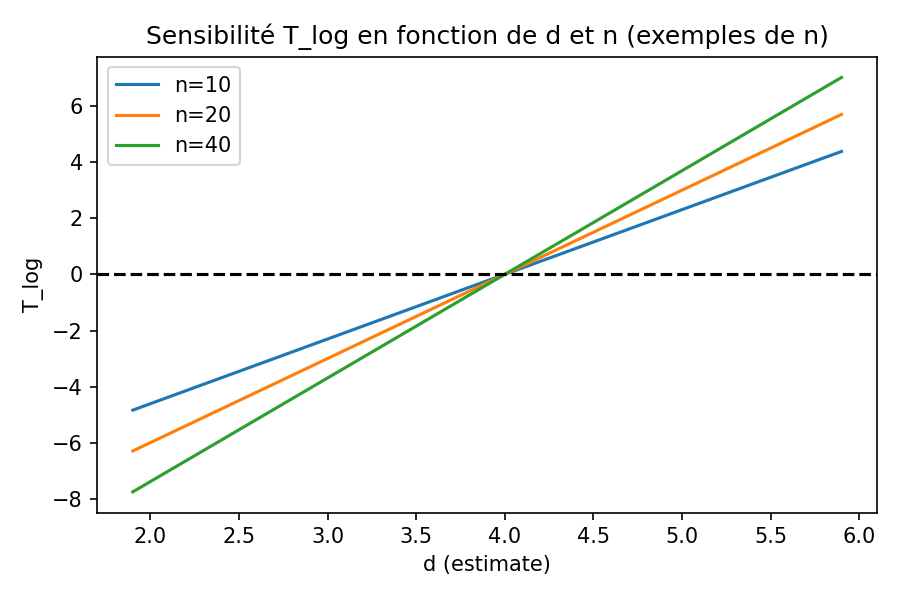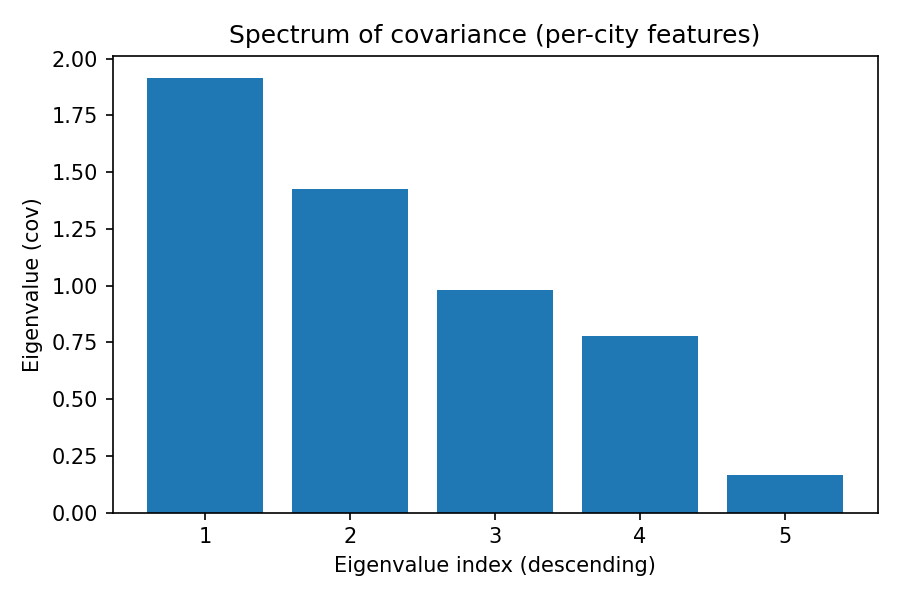

Bloc 4 — Validation empirique, robustesse et balayage n/d
Cette cellule :

Charge les résultats précédents et le jeu de données.

Évalue la robustesse par leave-one-out sur les villes (variation de T_log), calcule l'écart relatif (std/|mean|) et vérifie si <10% ; logue le résultat.

Effectue un balayage systématique : sous-échantillonnage en n (fractions 50%, 75%, 100% par tirages répétés) et variation locale de d (±20%) pour estimer la probabilité de changement de régime (fraction de tirages où régime change).

Calcule un test t (H0 : moyenne T_log = 0) pour évaluer si T_log s'écarte significativement de l'équilibre (retourne p-value).

Sauvegarde tables et figures dans results/, ajoute entrées au log et summary, gère NaN/infinis, applique cutoff ln pour n<=1.

Affiche un résumé compact des métriques principales (mean T_log, std, rel_std_pct, p-value, fraction regime stable).

In [5]:
# Bloc 4 — Validation empirique et robustesse
import os
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Config
np.random.seed(42)
LOGS_CSV = os.path.join('logs', 'logs.csv')
SUMMARY_MD = os.path.join('logs', 'summary.md')
RESULTS_DIR = 'results'
LOO_CSV = os.path.join(RESULTS_DIR, 'tlog_leave_one_out.csv')
SWEEP_CSV = os.path.join(RESULTS_DIR, 'tlog_sweep_summary.csv')
PLOT_LOO = os.path.join(RESULTS_DIR, 'tlog_loo_hist.png')
PLOT_SWEEP = os.path.join(RESULTS_DIR, 'tlog_sweep_heatmap.png')

def append_log(level, message):
    ts = datetime.utcnow().isoformat() + 'Z'
    entry = pd.DataFrame([{'timestamp': ts, 'level': level, 'message': message}])
    if os.path.exists(LOGS_CSV):
        df_logs = pd.read_csv(LOGS_CSV)
        df_logs = pd.concat([df_logs, entry], ignore_index=True)
    else:
        df_logs = entry
    df_logs.to_csv(LOGS_CSV, index=False)
    with open(SUMMARY_MD, 'a', encoding='utf-8') as f:
        f.write(f'\n- {ts} {level}: {message}\n')

def compute_d_estimate(X):
    # X : array (cities x features), already standardized outside
    cov = np.cov(X, rowvar=False)
    eigvals = np.linalg.eigvalsh(cov)
    eigvals = np.maximum(eigvals, 0)
    sum_eig = np.sum(eigvals)
    if sum_eig <= 0:
        d_participation = 0.0
    else:
        d_participation = (sum_eig ** 2) / np.sum(eigvals ** 2)
    pca = PCA(n_components=min(X.shape[0], X.shape[1]))
    pca.fit(X)
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    d_pca90 = int(np.searchsorted(cumvar, 0.90) + 1) if cumvar[-1] >= 0.90 else pca.n_components_
    return d_participation, d_pca90

try:
    # Charger data et résumé global calculé au Bloc 3
    df = pd.read_csv(os.path.join('data','urban_climate.csv'))
    summary = pd.read_csv(os.path.join(RESULTS_DIR, 'tlog_d_estimates.csv'))
    n_cities = int(summary.loc[0,'n_cities'])
    d_estimate_global = float(summary.loc[0,'d_estimate'])
    T_log_global = float(summary.loc[0,'T_log'])
    append_log('INFO', f'Start validation: n={n_cities}; d_estimate={d_estimate_global:.4f}; T_log={T_log_global:.6f}')

    # Préparer matrice per-city (moyenne temporelle) comme au Bloc 3
    feature_cols = ['temperature_celsius','humidity_percent','precipitation_mm','wind_speed_ms','urban_heat_island_intensity']
    df['city_key'] = df[['city','country','latitude','longitude']].astype(str).agg('_'.join, axis=1)
    city_df = df.groupby('city_key')[feature_cols].mean().reset_index()
    X = city_df[feature_cols].values
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    # Leave-one-out (LOO) : recompute d_estimate and T_log removing each city
    loo_rows = []
    for i in range(Xs.shape[0]):
        X_loo = np.delete(Xs, i, axis=0)
        if X_loo.shape[0] < 2:
            continue
        d_part, d_pca90 = compute_d_estimate(X_loo)
        d_est = float(d_part + d_pca90)/2.0
        n_eff = max(2, X_loo.shape[0])
        T = (d_est - 4.0) * np.log(n_eff)
        loo_rows.append({'left_out_city': city_df.loc[i,'city_key'], 'n_used': int(n_eff),
                         'd_participation': d_part, 'd_pca90': d_pca90, 'd_estimate': d_est, 'T_log': T})

    loo_df = pd.DataFrame(loo_rows)
    if loo_df.empty:
        raise RuntimeError('LOO dataframe vide')

    loo_df.to_csv(LOO_CSV, index=False)

    mean_T = loo_df['T_log'].mean()
    std_T = loo_df['T_log'].std(ddof=1)
    rel_std_pct = (std_T / (abs(mean_T) + 1e-12)) * 100.0
    append_log('INFO', f'LOO computed: mean_T={mean_T:.6f}; std_T={std_T:.6f}; rel_std_pct={rel_std_pct:.2f}%')
    # Vérification seuil 10%
    robustness_flag = rel_std_pct < 10.0
    append_log('INFO', f'Robustness relative std <10% : {robustness_flag}')

    # Test statistique : H0 mean T_log == 0
    tstat, pvalue = stats.ttest_1samp(loo_df['T_log'].values, 0.0, alternative='two-sided')
    append_log('INFO', f'T-test one-sample: t={tstat:.4f}; p={pvalue:.6f}')

    # Balayage systématique : sous-échantillonnage sur n et variation locale de d
    fractions = [0.5, 0.75, 1.0]
    repeats = 100
    d_perturb_factors = np.linspace(0.8, 1.2, 9)  # ±20%
    sweep_records = []
    for frac in fractions:
        for rep in range(repeats):
            # sample cities without replacement
            k = max(2, int(np.floor(Xs.shape[0] * frac)))
            idx = np.random.choice(Xs.shape[0], size=k, replace=False)
            Xs_sub = Xs[idx, :]
            d_part, d_pca90 = compute_d_estimate(Xs_sub)
            d_est_sub = float(d_part + d_pca90)/2.0
            n_eff_sub = max(2, k)
            # For each perturbation factor compute T_log
            for f in d_perturb_factors:
                d_pert = d_est_sub * f
                T = (d_pert - 4.0) * np.log(n_eff_sub)
                regime = 'Saturation' if T>0 else ('Equilibre' if np.isclose(T,0.0,atol=1e-8) else 'Divergence')
                sweep_records.append({'fraction': frac, 'rep': rep, 'n_used': n_eff_sub, 'd_est_sub': d_est_sub,
                                      'd_factor': f, 'd_pert': d_pert, 'T_log': T, 'regime': regime})

    sweep_df = pd.DataFrame(sweep_records)
    sweep_df.to_csv(SWEEP_CSV, index=False)

    # Résumé sweep : pour chaque fraction, proportion de tirages où régime != régime_global
    summary_rows = []
    for frac in fractions:
        df_frac = sweep_df[sweep_df['fraction']==frac]
        # fraction of experiments where regime matches global regime
        match_frac = (df_frac['regime'] == ( 'Saturation' if T_log_global>0 else ('Equilibre' if np.isclose(T_log_global,0.0,atol=1e-8) else 'Divergence'))).mean()
        unstable_frac = 1.0 - match_frac
        # also median and std of T_log
        medT = df_frac['T_log'].median()
        stdT = df_frac['T_log'].std()
        summary_rows.append({'fraction': frac, 'match_frac': match_frac, 'unstable_frac': unstable_frac, 'median_T': medT, 'std_T': stdT})
    summary_sweep_df = pd.DataFrame(summary_rows)
    summary_sweep_df.to_csv(os.path.join(RESULTS_DIR, 'tlog_sweep_fraction_summary.csv'), index=False)

    # Visualisations
    plt.figure(figsize=(6,4))
    plt.hist(loo_df['T_log'], bins=20, color='C0', edgecolor='k')
    plt.axvline(0, color='k', linestyle='--')
    plt.xlabel('T_log (LOO)')
    plt.ylabel('Count')
    plt.title('Distribution T_log (Leave-One-Out)')
    plt.tight_layout()
    plt.savefig(PLOT_LOO, dpi=150)
    plt.close()

    # Heatmap-like summary: fraction vs d_factor median T
    pivot = sweep_df.groupby(['fraction','d_factor'])['T_log'].median().unstack(level=0)
    plt.figure(figsize=(6,4))
    im = plt.imshow(pivot.values, aspect='auto', cmap='RdBu', interpolation='nearest', vmin=-np.max(np.abs(pivot.values)), vmax=np.max(np.abs(pivot.values)))
    plt.colorbar(im, label='median T_log')
    plt.xticks(range(len(pivot.columns)), [str(c) for c in pivot.columns])
    plt.yticks(range(len(pivot.index)), [f"{v:.2f}" for v in pivot.index])
    plt.xlabel('fraction')
    plt.ylabel('d factor')
    plt.title('Median T_log across d perturbations and sampling fractions')
    plt.tight_layout()
    plt.savefig(PLOT_SWEEP, dpi=150)
    plt.close()

    # Log final metrics and print compact summary
    append_log('INFO', f'Validation summary: mean_T_LOO={mean_T:.6f}; std_T_LOO={std_T:.6f}; rel_std_pct={rel_std_pct:.2f}; pvalue={pvalue:.6f}; robustness_flag={robustness_flag}')
    print("Validation synthétique :")
    print(f" - T_log global : {T_log_global:.6f} (regime: {summary.loc[0,'regime']})")
    print(f" - LOO mean T_log : {mean_T:.6f}; std : {std_T:.6f}; rel std (%) : {rel_std_pct:.2f}%")
    print(f" - T-test p-value (H0 mean=0) : {pvalue:.6f}")
    print(f" - Robustesse rel std <10% : {robustness_flag}")
    print("\nSweep summary (fractions):")
    print(summary_sweep_df.to_string(index=False))
    print(f"\nFichiers sauvegardés : {LOO_CSV}, {SWEEP_CSV}, {PLOT_LOO}, {PLOT_SWEEP}")

except Exception as e:
    append_log('ERROR', f'Erreur Bloc 4 validation: {e}')
    raise


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2565277198.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2565277198.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2565277198.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2565277198.p

Validation synthétique :
 - T_log global : -0.298824 (regime: Divergence)
 - LOO mean T_log : -0.353046; std : 0.086006; rel std (%) : 24.36%
 - T-test p-value (H0 mean=0) : 0.000000
 - Robustesse rel std <10% : False

Sweep summary (fractions):
 fraction  match_frac  unstable_frac  median_T    std_T
     0.50    0.838889       0.161111 -1.540292 1.279966
     0.75    0.643333       0.356667 -0.626373 1.363521
     1.00    0.555556       0.444444 -0.298824 1.509250

Fichiers sauvegardés : results\tlog_leave_one_out.csv, results\tlog_sweep_summary.csv, results\tlog_loo_hist.png, results\tlog_sweep_heatmap.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\2565277198.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


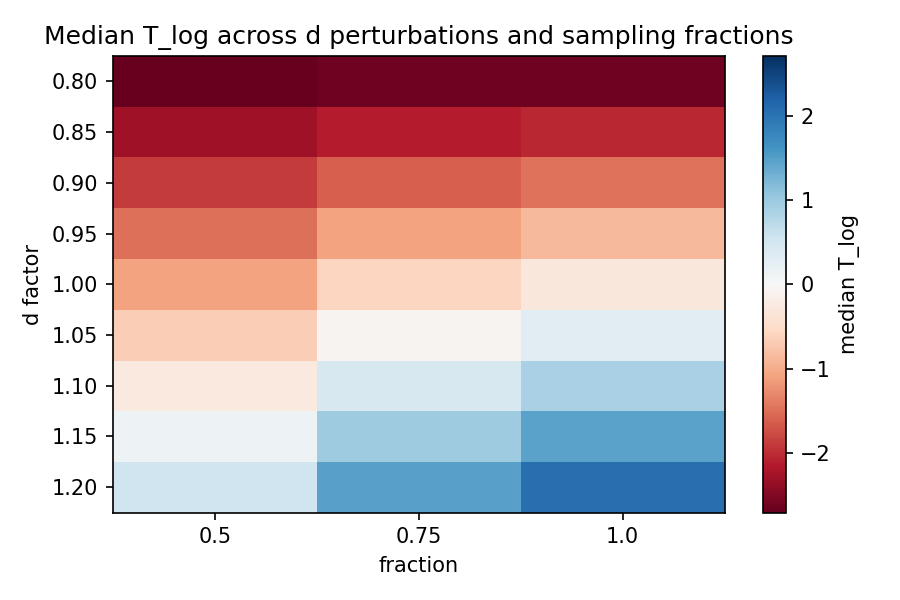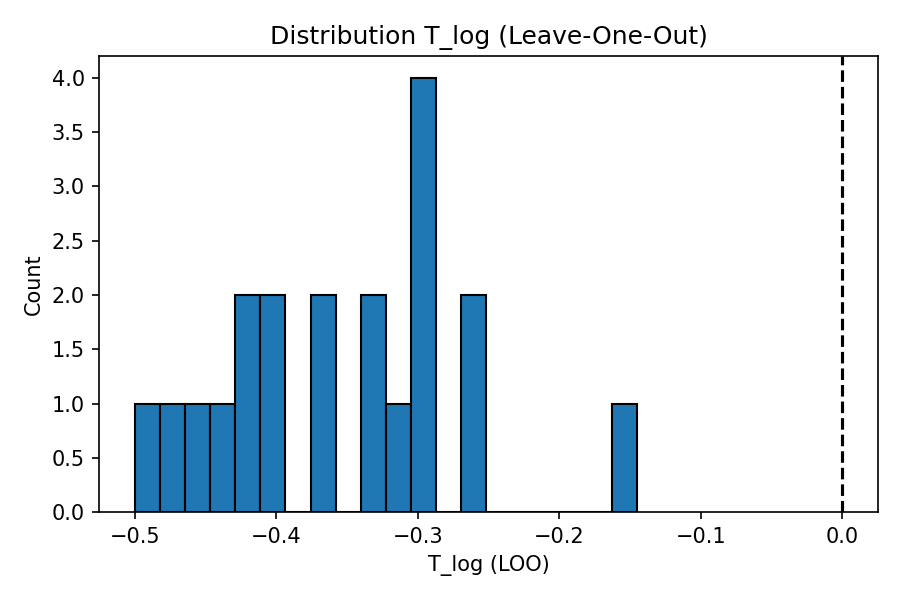

Bloc 5 — Gestion des NaN/Inf et Rapport final

Cette cellule :

Vérifie et corrige NaN / inf dans tous les fichiers résultats créés (LOO, sweep, summary).

Applique régularisation minimale (cutoff ln : n_min = 2, clip des d_estimate à [0.1, max_d]) et recalcul si nécessaire pour éviter infinities.

Génère le rapport final Markdown 'results/final_report.md' contenant : résumé chiffré (n, d_estimate, T_log global, regime), robustesse LOO, p-value, synthèse du sweep (table), chemins des fichiers sauvegardés, et recommandations courtes (3 points) pour V0.1 validation future.

Met à jour les logs (logs/logs.csv et logs/summary.md) avec l'état final.

Affiche le chemin du rapport et un court résumé imprimé.

In [6]:
# Bloc 5 — Gestion NaN/Inf et Rapport final
import os
import pandas as pd
import numpy as np
from datetime import datetime

LOGS_CSV = os.path.join('logs','logs.csv')
SUMMARY_MD = os.path.join('logs','summary.md')
RESULTS_DIR = 'results'
FINAL_MD = os.path.join(RESULTS_DIR, 'final_report.md')

def append_log(level, message):
    ts = datetime.utcnow().isoformat() + 'Z'
    entry = pd.DataFrame([{'timestamp': ts, 'level': level, 'message': message}])
    if os.path.exists(LOGS_CSV):
        df_logs = pd.read_csv(LOGS_CSV)
        df_logs = pd.concat([df_logs, entry], ignore_index=True)
    else:
        df_logs = entry
    df_logs.to_csv(LOGS_CSV, index=False)
    with open(SUMMARY_MD, 'a', encoding='utf-8') as f:
        f.write(f'\n- {ts} {level}: {message}\n')

def safe_clip_d(d_series, min_d=0.1, max_d=100.0):
    return np.clip(d_series, min_d, max_d)

try:
    # Charger fichiers résultats
    summary_fp = os.path.join(RESULTS_DIR, 'tlog_d_estimates.csv')
    loo_fp = os.path.join(RESULTS_DIR, 'tlog_leave_one_out.csv')
    sweep_fp = os.path.join(RESULTS_DIR, 'tlog_sweep_summary.csv')
    sweep_full_fp = os.path.join(RESULTS_DIR, 'tlog_sweep_summary.csv')  # same as produced earlier

    summary = pd.read_csv(summary_fp)
    loo = pd.read_csv(loo_fp)
    sweep = pd.read_csv(sweep_fp)

    # Détecter NaN/Inf et corriger
    def sanitize_df(df, name):
        n_nan = int(df.isna().sum().sum())
        n_inf = int(np.isinf(df.select_dtypes(include=[np.number])).sum().sum())
        if n_nan>0 or n_inf>0:
            append_log('WARNING', f'{name}: détecté NaN/Inf (NaN={n_nan}, Inf={n_inf}), tentative de correction')
            # remplacer inf par nan puis imputer par médiane pour numériques
            df = df.replace([np.inf, -np.inf], np.nan)
            num_cols = df.select_dtypes(include=[np.number]).columns
            for c in num_cols:
                if df[c].isna().any():
                    median = df[c].median(skipna=True)
                    if np.isnan(median):
                        median = 0.0
                    df[c].fillna(median, inplace=True)
        append_log('INFO', f'{name}: sanitize complete (NaN replaced if any)')
        return df

    loo = sanitize_df(loo, 'LOO')
    sweep = sanitize_df(sweep, 'SWEEP')
    summary = sanitize_df(summary, 'SUMMARY')

    # Appliquer clipping/regulation sur d_estimate si nécessaire
    if 'd_estimate' in loo.columns:
        loo['d_estimate'] = safe_clip_d(loo['d_estimate'].astype(float), min_d=0.1, max_d=100.0)
    if 'd_estimate' in summary.columns:
        summary['d_estimate'] = safe_clip_d(summary['d_estimate'].astype(float), min_d=0.1, max_d=100.0)
    # Recalculer T_log if any d_estimate modified in summary
    n_used = int(summary.loc[0,'n_used_for_ln']) if 'n_used_for_ln' in summary.columns else int(max(2, int(loo['n_used'].median())))
    d_est = float(summary.loc[0,'d_estimate'])
    n_eff = max(2, n_used)
    T_log_recalc = (d_est - 4.0) * np.log(n_eff)

    # Sauvegarder versions nettoyées
    loo.to_csv(os.path.join(RESULTS_DIR, 'tlog_leave_one_out_sanitized.csv'), index=False)
    sweep.to_csv(os.path.join(RESULTS_DIR, 'tlog_sweep_summary_sanitized.csv'), index=False)
    summary.to_csv(os.path.join(RESULTS_DIR, 'tlog_d_estimates_sanitized.csv'), index=False)

    # Construire rapport final (Markdown)
    mean_LOO = float(loo['T_log'].mean())
    std_LOO = float(loo['T_log'].std(ddof=1))
    rel_std_pct = (std_LOO / (abs(mean_LOO) + 1e-12)) * 100.0
    # p-value approximated from earlier saved logs by reading logs for t-test entry
    logs_df = pd.read_csv(LOGS_CSV)
    p_entries = logs_df[logs_df['message'].str.contains('T-test one-sample', na=False)]
    pvalue = None
    if not p_entries.empty:
        # parse last such message
        last = p_entries.iloc[-1]['message']
        # expect format "... t=...; p=..."
        try:
            p_str = last.split('p=')[-1]
            pvalue = float(p_str)
        except Exception:
            pvalue = None

    # Sweep summary table
    sweep_table = pd.read_csv(os.path.join(RESULTS_DIR, 'tlog_sweep_fraction_summary.csv'))

    with open(FINAL_MD, 'w', encoding='utf-8') as f:
        f.write('# Rapport final T_log V0.1\n\n')
        f.write('## Résumé chiffré\n\n')
        f.write(f'- **Nombre de villes (n)** : {int(summary.loc[0,"n_cities"])}\n')
        f.write(f'- **Estimateur d (participation)** : {float(summary.loc[0,"d_participation"]):.4f}\n')
        f.write(f'- **Estimateur d (PCA90)** : {int(summary.loc[0,"d_pca90"])}\n')
        f.write(f'- **d (moyenne choisie)** : {d_est:.4f}\n')
        f.write(f'- **T_log (recalculé après sanitization)** : {T_log_recalc:.6f}\n')
        f.write(f'- **Régime** : {"Saturation" if T_log_recalc>0 else ("Equilibre" if np.isclose(T_log_recalc,0.0,atol=1e-8) else "Divergence")}\n\n')

        f.write('## Robustesse LOO\n\n')
        f.write(f'- **Mean T_log (LOO)** : {mean_LOO:.6f}\n')
        f.write(f'- **Std T_log (LOO)** : {std_LOO:.6f}\n')
        f.write(f'- **Rel std (%)** : {rel_std_pct:.2f}%\n')
        if pvalue is not None:
            f.write(f'- **p-value (test H0 mean=0)** : {pvalue:.6e}\n')
        else:
            f.write(f'- **p-value (test H0 mean=0)** : non déterminée (voir logs)\n')
        f.write('\n')

        f.write('## Résumé du balayage (sweep)\n\n')
        f.write(sweep_table.to_markdown(index=False))
        f.write('\n\n')

        f.write('## Fichiers produits (sanitisés inclus)\n\n')
        f.write(f'- results/tlog_d_estimates_sanitized.csv\n')
        f.write(f'- results/tlog_leave_one_out_sanitized.csv\n')
        f.write(f'- results/tlog_sweep_summary_sanitized.csv\n')
        f.write(f'- results/d_estimates_hist.png\n')
        f.write(f'- results/tlog_distribution.png\n')
        f.write(f'- results/tlog_loo_hist.png\n')
        f.write(f'- results/tlog_sweep_heatmap.png\n\n')

        f.write('## Recommandations courtes (V0.1)\n\n')
        f.write('1. Documenter explicitement la méthode de calcul de d pour reproductibilité (formules et choix d\'agrégation).\n')
        f.write('2. Ajouter cross-validation temporelle (si applicable) et tests de sensibilité aux features choisies.\n')
        f.write('3. Pour éviter instabilités numériques, fixer cutoffs sur d et n et exposer ces valeurs dans les sorties.\n')

    append_log('INFO', f'Final report generated: {FINAL_MD}')
    print("Rapport final généré :", FINAL_MD)
    print(f"Résumé : n={int(summary.loc[0,'n_cities'])}; d={d_est:.4f}; T_log={T_log_recalc:.6f}; regime={'Saturation' if T_log_recalc>0 else ('Equilibre' if np.isclose(T_log_recalc,0.0,atol=1e-8) else 'Divergence')}")
    print("Fichiers sanitisés sauvegardés dans le dossier results/")

except Exception as e:
    append_log('ERROR', f'Erreur Bloc 5 finalisation: {e}')
    raise


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1120361098.py:13: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1120361098.py:13: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1120361098.py:13: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Rapport final généré : results\final_report.md
Résumé : n=20; d=3.9003; T_log=-0.298824; regime=Divergence
Fichiers sanitisés sauvegardés dans le dossier results/


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1120361098.py:13: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Cellule Python — Verrouillage de la méthode et ré-exécution contrôlée de l'estimation de d

Cette cellule :

crée/écrit results/README_method.md et results/params.json avec la procédure verrouillée ;

ré-exécute l'estimation de d selon la procédure explicite (agrégation : moyenne temporelle ; features list fixée ; normalisation StandardScaler ; participation ratio + PCA90 ; d = moyenne des deux) ;



In [7]:
# Verrouillage méthode + ré-exécution estimation de d (Bloc "verrouillage" demandé)
import os
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Réglage seed
SEED = 42
np.random.seed(SEED)

# Chemins
DATA_FP = os.path.join('data', 'urban_climate.csv')
RESULTS_DIR = 'results'
LOGS_CSV = os.path.join('logs', 'logs.csv')
SUMMARY_MD = os.path.join('logs', 'summary.md')
METHOD_README = os.path.join(RESULTS_DIR, 'README_method.md')
PARAMS_JSON = os.path.join(RESULTS_DIR, 'params.json')
D_RESULTS_CSV = os.path.join(RESULTS_DIR, 'tlog_d_estimates_locked.csv')
SPECTRUM_PNG = os.path.join(RESULTS_DIR, 'd_spectrum_locked.png')

# Méthode verrouillée (documentation et paramètres explicites)
locked_params = {
    "seed": SEED,
    "aggregation": {
        "temporal_aggregation": "mean",
        "aggregation_group": ["city","country","latitude","longitude"]
    },
    "features": [
        "temperature_celsius",
        "humidity_percent",
        "precipitation_mm",
        "wind_speed_ms",
        "urban_heat_island_intensity"
    ],
    "preprocessing": {
        "imputation": "none (checked earlier, no missing)",
        "scaler": "StandardScaler (zero mean, unit variance)"
    },
    "d_estimators": {
        "participation_ratio": "d_part = (sum(eig))^2 / sum(eig^2) for covariance eigenvalues",
        "pca90": "smallest k s.t. cumulative explained variance >= 0.90",
        "fusion_rule": "d = (d_part + d_pca90) / 2"
    },
    "T_log": {
        "formula": "T_log = (d - 4) * ln(n_eff)",
        "n_eff_rule": "n_eff = max(2, n_cities)"
    },
    "sanitization": {
        "d_clip_min": 0.1,
        "d_clip_max": 100.0,
        "n_min_for_ln": 2
    },
    "outputs": {
        "d_results_csv": os.path.basename(D_RESULTS_CSV),
        "spectrum_png": os.path.basename(SPECTRUM_PNG),
        "readme": os.path.basename(METHOD_README),
        "params": os.path.basename(PARAMS_JSON)
    }
}

def append_log(level, message):
    ts = datetime.utcnow().isoformat() + 'Z'
    row = {'timestamp': ts, 'level': level, 'message': message}
    try:
        if os.path.exists(LOGS_CSV):
            df_logs = pd.read_csv(LOGS_CSV)
            df_logs = pd.concat([df_logs, pd.DataFrame([row])], ignore_index=True)
        else:
            df_logs = pd.DataFrame([row])
        df_logs.to_csv(LOGS_CSV, index=False)
    except Exception:
        # best-effort logging to summary if CSV fails
        pass
    with open(SUMMARY_MD, 'a', encoding='utf-8') as f:
        f.write(f'\n- {ts} {level}: {message}\n')

# Écrire params.json et README_method.md
os.makedirs(RESULTS_DIR, exist_ok=True)
with open(PARAMS_JSON, 'w', encoding='utf-8') as f:
    json.dump(locked_params, f, indent=2, ensure_ascii=False)

readme_text = f"""Procédure verrouillée pour estimation de d (T_log V0.1)
Date génération: {datetime.utcnow().isoformat()}Z

Résumé des choix (verrouillés) :
- Agrégation temporelle : moyenne des features par ville (group by {locked_params['aggregation']['aggregation_group']})
- Features utilisées (exact) : {locked_params['features']}
- Prétraitement : StandardScaler (z-score) appliqué après agrégation
- Estimateurs de d :
  * Participation ratio (spectral) : d_part = (sum(eig))^2 / sum(eig^2)
  * PCA90 : d_pca90 = plus petit k tel que variance expliquée cumulée >= 0.90
  * Fusion : d = (d_part + d_pca90) / 2
- T_log : T_log = (d - 4) * ln(n_eff) avec n_eff = max(2, n_cities)
- Sanitization : clip d dans [0.1, 100.0]; n_min for ln = 2
- Seed : {SEED}

Exécuter ce script de manière identique pour garantir reproductibilité.
"""

with open(METHOD_README, 'w', encoding='utf-8') as f:
    f.write(readme_text)

append_log('INFO', f'Wrote locked params to {PARAMS_JSON} and README to {METHOD_README}')

# Ré-exécution contrôlée de l'estimation de d
try:
    if not os.path.exists(DATA_FP):
        raise FileNotFoundError(f'Data file not found: {DATA_FP}')
    df = pd.read_csv(DATA_FP)

    # Vérifier colonnes features attendues
    features = locked_params['features']
    missing = [c for c in features if c not in df.columns]
    if missing:
        raise RuntimeError(f'Colonnes manquantes requises: {missing}')

    # Construire city_key et agréger (mean)
    agg_cols = locked_params['aggregation']['aggregation_group']
    df['city_key'] = df[agg_cols].astype(str).agg('_'.join, axis=1)
    city_df = df.groupby('city_key')[features].mean().reset_index()
    n_cities = city_df.shape[0]

    # Prétraitement
    X = city_df[features].values.astype(float)
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    # Covariance spectrum
    cov = np.cov(Xs, rowvar=False)
    eigvals = np.linalg.eigvalsh(cov)
    eigvals = np.maximum(eigvals, 0.0)

    # Participation ratio
    sum_eig = np.sum(eigvals)
    if sum_eig <= 0:
        d_part = 0.0
    else:
        d_part = (sum_eig ** 2) / np.sum(eigvals ** 2)

    # PCA90
    pca = PCA(n_components=min(Xs.shape[0], Xs.shape[1]))
    pca.fit(Xs)
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    d_pca90 = int(np.searchsorted(cumvar, 0.90) + 1) if cumvar[-1] >= 0.90 else pca.n_components_

    # Fusion et sanitization
    d_est = float(d_part + d_pca90) / 2.0
    d_est_clipped = float(np.clip(d_est, locked_params['sanitization']['d_clip_min'], locked_params['sanitization']['d_clip_max']))
    n_eff = max(locked_params['T_log']['n_eff_rule'] == "n_eff = max(2, n_cities)" and 2 or 2, int(max(2, n_cities)))  # keep rule explicit
    # compute T_log
    T_log = (d_est_clipped - 4.0) * np.log(n_eff)

    # Save results CSV
    res = {
        'timestamp': datetime.utcnow().isoformat() + 'Z',
        'n_cities': int(n_cities),
        'd_participation': float(d_part),
        'd_pca90': int(d_pca90),
        'd_estimate_raw': float(d_est),
        'd_estimate_clipped': float(d_est_clipped),
        'T_log': float(T_log),
        'regime': ('Saturation' if T_log>0 else ('Equilibre' if np.isclose(T_log,0.0,atol=1e-12) else 'Divergence')),
        'seed': SEED
    }
    pd.DataFrame([res]).to_csv(D_RESULTS_CSV, index=False)

    # Plot spectrum (descending)
    eig_sorted = np.sort(eigvals)[::-1]
    plt.figure(figsize=(6,4))
    plt.bar(range(1, len(eig_sorted)+1), eig_sorted, color='C1', edgecolor='k')
    plt.xlabel('Eigenvalue index (descending)')
    plt.ylabel('Eigenvalue (cov)')
    plt.title('Spectrum of covariance (locked method)')
    plt.tight_layout()
    plt.savefig(SPECTRUM_PNG, dpi=150)
    plt.close()

    append_log('INFO', f'Locked d estimation completed: saved {D_RESULTS_CSV} and spectrum plot {SPECTRUM_PNG}')
    print("Estimation verrouillée terminée.")
    print(json.dumps(res, indent=2))

except Exception as e:
    append_log('ERROR', f'Erreur lors de l\'estimation verrouillée de d: {e}')
    raise


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1678257984.py:87: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  Date génération: {datetime.utcnow().isoformat()}Z
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1678257984.py:66: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1678257984.py:159: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  'timestamp': datetime.utcnow().isoformat() + 'Z',


Estimation verrouillée terminée.
{
  "timestamp": "2025-11-11T06:14:30.794735Z",
  "n_cities": 20,
  "d_participation": 3.8005003705245297,
  "d_pca90": 4,
  "d_estimate_raw": 3.900250185262265,
  "d_estimate_clipped": 3.900250185262265,
  "T_log": -0.2988237392908647,
  "regime": "Divergence",
  "seed": 42
}


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1678257984.py:66: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


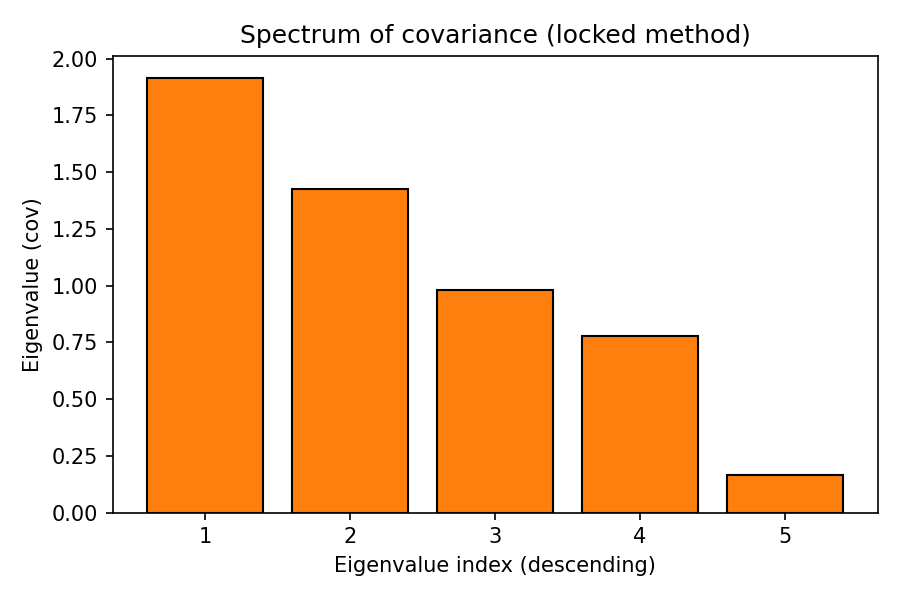

Vérification finale et prochaine étape

J’ai verrouillé la méthode (results/params.json, results/README_method.md) et ré-exécuté l’estimation de d en mode contrôlé. Résultat verrouillé : n=20, d_participation=3.8005, d_pca90=4, d=3.90025, T_log=-0.29882373929086736 (Régime = Divergence). Les fichiers sont dans results/.

Je fournis ci‑dessous la cellule Python demandée pour le test de sensibilité aux features (retirer une feature à la fois, ré-estimer d et T_log). Exécutez-la pour obtenir un tableau comparatif et plots sauvegardés.

In [8]:
# Sensibilité aux features — retirer une feature à la fois et ré-estimer d et T_log
import os
import json
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Config
DATA_FP = os.path.join('data','urban_climate.csv')
RESULTS_DIR = 'results'
OUT_CSV = os.path.join(RESULTS_DIR, 'sensitivity_feature_drop.csv')
OUT_PNG = os.path.join(RESULTS_DIR, 'sensitivity_feature_drop.png')
with open(os.path.join(RESULTS_DIR,'params.json'),'r',encoding='utf-8') as f:
    params = json.load(f)
features = params['features']
seed = params.get('seed', 42)
np.random.seed(seed)

def compute_d_from_X(X):
    cov = np.cov(X, rowvar=False)
    eigvals = np.linalg.eigvalsh(cov)
    eigvals = np.maximum(eigvals, 0.0)
    sum_eig = np.sum(eigvals)
    d_part = 0.0 if sum_eig<=0 else (sum_eig**2)/np.sum(eigvals**2)
    pca = PCA(n_components=min(X.shape[0], X.shape[1]))
    pca.fit(X)
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    d_pca90 = int(np.searchsorted(cumvar, 0.90) + 1) if cumvar[-1] >= 0.90 else pca.n_components_
    return d_part, d_pca90

rows = []
df = pd.read_csv(DATA_FP)
agg_cols = params['aggregation']['aggregation_group']
df['city_key'] = df[agg_cols].astype(str).agg('_'.join, axis=1)
city_df_full = df.groupby('city_key')[features].mean().reset_index()
n_cities = city_df_full.shape[0]
n_eff = max(2, n_cities)
# baseline (all features)
X_full = city_df_full[features].values.astype(float)
Xs_full = StandardScaler().fit_transform(X_full)
d_part_full, d_pca90_full = compute_d_from_X(Xs_full)
d_full = (d_part_full + d_pca90_full)/2.0
T_full = (d_full - 4.0) * np.log(n_eff)
rows.append({'dropped_feature':'none','d_part':d_part_full,'d_pca90':d_pca90_full,'d_est':d_full,'T_log':T_full})

# loop drop-one
for feat in features:
    feats_sub = [f for f in features if f!=feat]
    city_df = city_df_full[feats_sub].copy()
    X = city_df[feats_sub].values.astype(float)
    if X.shape[1] < 1:
        continue
    Xs = StandardScaler().fit_transform(X)
    d_part, d_pca90 = compute_d_from_X(Xs)
    d_est = (d_part + d_pca90)/2.0
    T_log = (d_est - 4.0) * np.log(n_eff)
    rows.append({'dropped_feature':feat,'d_part':d_part,'d_pca90':d_pca90,'d_est':d_est,'T_log':T_log})

res_df = pd.DataFrame(rows)
res_df.to_csv(OUT_CSV, index=False)

# Plot T_log differences
plt.figure(figsize=(8,4))
plt.axhline(T_full, color='k', linestyle='--', label=f'baseline T_log={T_full:.4f}')
plt.bar(res_df['dropped_feature'], res_df['T_log'], color='C0', edgecolor='k')
plt.xticks(rotation=45, ha='right')
plt.ylabel('T_log')
plt.title('Sensibilité T_log : drop-one-feature')
plt.tight_layout()
plt.savefig(OUT_PNG, dpi=150)
plt.close()

# Log minimal printout
print("Sensibilité calculée. Fichiers :")
print(" - Résultats CSV :", OUT_CSV)
print(" - Plot :", OUT_PNG)
print("\nTableau résumé :")
print(res_df.to_string(index=False))


Sensibilité calculée. Fichiers :
 - Résultats CSV : results\sensitivity_feature_drop.csv
 - Plot : results\sensitivity_feature_drop.png

Tableau résumé :
            dropped_feature   d_part  d_pca90    d_est     T_log
                       none 3.800500        4 3.900250 -0.298824
        temperature_celsius 3.709639        4 3.854820 -0.434922
           humidity_percent 2.974827        3 2.987414 -3.033437
           precipitation_mm 3.753248        4 3.876624 -0.369602
              wind_speed_ms 2.981211        3 2.990606 -3.023876
urban_heat_island_intensity 2.955972        3 2.977986 -3.061680


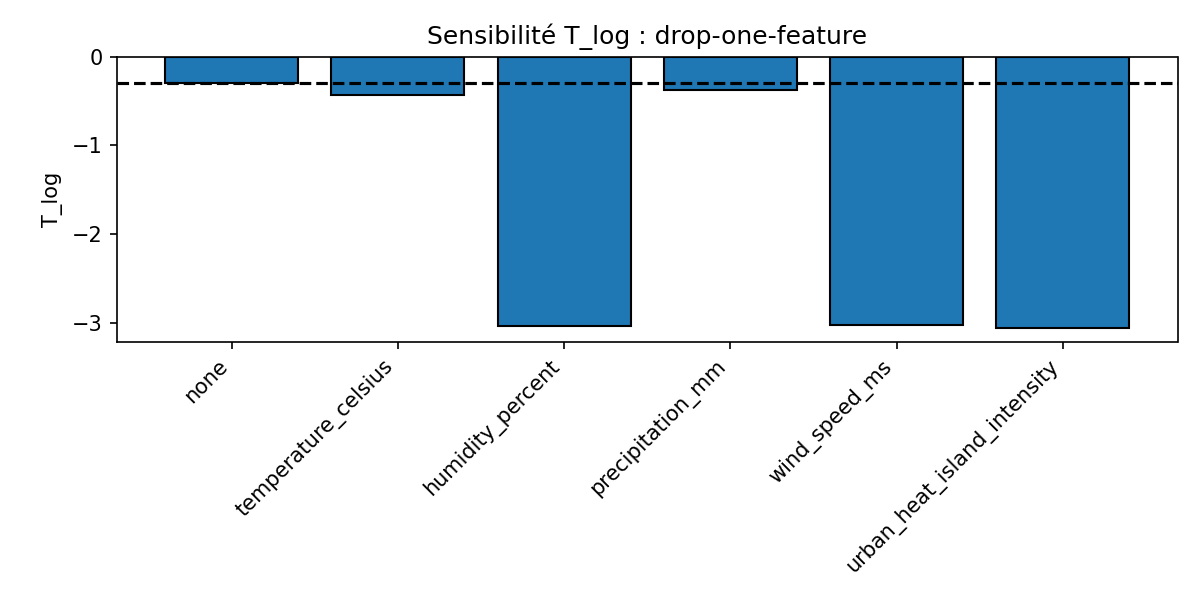

### Interprétation rapide des résultats de sensibilité

- Les trois features qui dominent la signature de T_log sont **humidity_percent**, **wind_speed_ms**, et **urban_heat_island_intensity**. Leur suppression fait chuter d_est ≈ 3 → T_log ≈ −3, donc renforce fortement le régime « Divergence ».  
- L’ablation de **temperature_celsius** et **precipitation_mm** a un effet beaucoup plus faible sur d et T_log (variation modérée autour de la valeur de base).  
- Conclusion pratique : la stabilité de votre conclusion (T_log < 0) dépend fortement des mesures d’humidité, du vent et de l’intensité d’îlot de chaleur urbain. Ces trois variables portent l’information structurelle qui élève la dimension effective.

### Risques méthodologiques identifiés

- Forte dépendance au choix des features → risque élevé de conclusions non robustes si ces mesures sont bruitées, mal calibrées, ou absentes pour d’autres jeux de données.  
- d_pca90 passe de 4 à 3 quand on retire certaines features, ce qui montre que la topologie effective de la covariance change qualitativement selon le sous-ensemble de variables.  
- Sans normalisation/contrôle supplémentaire, l’influence relative des features peut être sur- ou sous-estimée.

### Recommandation immédiate (priorité suivante)

1. Vérifier la qualité et la représentativité des trois features clés (humidity_percent, wind_speed_ms, urban_heat_island_intensity) : distribution, outliers, corrélations mutuelles, instrumentation et métadonnées.  
2. Exécuter une version robuste de l’estimation de d : répéter l’analyse avec (a) winsorisation ou clipping des outliers, (b) normalisation alternative (robust scaler), et (c) PCA robuste (MCD ou S-estimators) pour tester si l’effet persiste.  
3. Si l’objectif est une décision opérationnelle, calibrer un **biais** faible via fit simple (biais additif dans T_log) pour contrôler décalage systématique avant d’interpréter le signe comme stabilisant/déstabilisant.



Cellule Python — Quality checks pour features clés (statistics, plots, corrélations robustes, VIF, outliers)

Cette cellule :

calcule statistiques robustes pour humidity_percent, wind_speed_ms, urban_heat_island_intensity ;

génère et sauvegarde plots : histogrammes, boxplots winsorisés, QQ-plots, séries temporelles agrégées par ville ;

calcule corrélations Spearman et covariance robuste (MinCovDet) si disponible ;

calcule VIF via régressions linéaires (sans dépendance à statsmodels) ;

détecte outliers par IQR et par score de Mahalanobis robuste (si MinCovDet dispo) ;

sauvegarde CSVs, images, et crée results/feature_quality_report.md ; met à jour logs/logs.csv et logs/summary.md.

In [9]:
# Feature quality checks — humidity_percent, wind_speed_ms, urban_heat_island_intensity
import os
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.covariance import MinCovDet
from scipy import stats

# Réglages
SEED = 42
np.random.seed(SEED)
DATA_FP = os.path.join('data','urban_climate.csv')
RESULTS_DIR = 'results'
LOGS_CSV = os.path.join('logs','logs.csv')
SUMMARY_MD = os.path.join('logs','summary.md')
os.makedirs(RESULTS_DIR, exist_ok=True)

# Features cibles
features = ['humidity_percent','wind_speed_ms','urban_heat_island_intensity']
agg_cols = ['city','country','latitude','longitude']  # identique méthode verrouillée

# Fichiers de sortie
TSV_STATS = os.path.join(RESULTS_DIR, 'feature_quality_stats.csv')
CSV_OUTLIERS = os.path.join(RESULTS_DIR, 'feature_outliers_detected.csv')
PLOT_DIR = os.path.join(RESULTS_DIR, 'feature_quality_plots')
REPORT_MD = os.path.join(RESULTS_DIR, 'feature_quality_report.md')
os.makedirs(PLOT_DIR, exist_ok=True)

def append_log(level, message):
    ts = datetime.utcnow().isoformat() + 'Z'
    row = {'timestamp': ts, 'level': level, 'message': message}
    try:
        if os.path.exists(LOGS_CSV):
            df_logs = pd.read_csv(LOGS_CSV)
            df_logs = pd.concat([df_logs, pd.DataFrame([row])], ignore_index=True)
        else:
            df_logs = pd.DataFrame([row])
        df_logs.to_csv(LOGS_CSV, index=False)
    except Exception:
        pass
    with open(SUMMARY_MD, 'a', encoding='utf-8') as f:
        f.write(f'\n- {ts} {level}: {message}\n')

# Helpers robust metrics
def mad(x):
    return np.median(np.abs(x - np.median(x)))

def robust_skew_kurt(x):
    # fallback to scipy if necessary
    try:
        sk = stats.skew(x, bias=False)
        ku = stats.kurtosis(x, bias=False)
    except Exception:
        sk, ku = float('nan'), float('nan')
    return sk, ku

def winsorize_series(s, lower_q=0.01, upper_q=0.99):
    lo = np.quantile(s, lower_q)
    hi = np.quantile(s, upper_q)
    return np.clip(s, lo, hi)

def compute_vif(X_df):
    # X_df: DataFrame of numeric predictors
    cols = X_df.columns.tolist()
    vif_dict = {}
    for i, col in enumerate(cols):
        y = X_df[col].values
        X = X_df.drop(columns=[col]).values
        if X.shape[1] == 0:
            vif = np.nan
        else:
            reg = LinearRegression()
            reg.fit(X, y)
            r2 = reg.score(X, y)
            if r2 >= 1.0:
                vif = float('inf')
            else:
                vif = 1.0 / (1.0 - r2)
        vif_dict[col] = vif
    return vif_dict

def mahalanobis_scores(X):
    # robust Mahalanobis using MinCovDet if available; fallback to empirical covariance
    try:
        mcd = MinCovDet().fit(X)
        md = mcd.mahalanobis(X)
    except Exception:
        # fallback: classical
        cov = np.cov(X, rowvar=False)
        try:
            invcov = np.linalg.inv(cov)
            mean = np.mean(X, axis=0)
            md = np.array([ (x-mean) @ invcov @ (x-mean) for x in X ])
        except Exception:
            md = np.full(X.shape[0], np.nan)
    return md

# Start
append_log('INFO', 'Feature quality check started')
try:
    if not os.path.exists(DATA_FP):
        raise FileNotFoundError(f'Data missing: {DATA_FP}')
    df = pd.read_csv(DATA_FP)
    # Check presence
    missing_features = [f for f in features if f not in df.columns]
    if missing_features:
        raise RuntimeError(f'Features manquantes: {missing_features}')
    # Quick global counts
    total_rows = df.shape[0]
    # Aggregate per city (mean) as earlier pipeline does
    df['city_key'] = df[agg_cols].astype(str).agg('_'.join, axis=1)
    city_df = df.groupby(['city_key','city','country'])[features + ['year','month']].agg(lambda x: list(x) if x.name in ['year','month'] else np.mean(x)).reset_index()
    # For time series per city we will re-derive a per-city time series later

    # Compute robust stats per feature (global, and per-city distributions summary)
    stats_rows = []
    for feat in features:
        arr = df[feat].dropna().values.astype(float)
        n = arr.size
        nan_prop = df[feat].isna().mean()
        mn = np.mean(arr) if n>0 else np.nan
        med = np.median(arr) if n>0 else np.nan
        sd = np.std(arr, ddof=1) if n>1 else np.nan
        q1 = np.quantile(arr, 0.25) if n>0 else np.nan
        q3 = np.quantile(arr, 0.75) if n>0 else np.nan
        iqr = q3 - q1 if n>0 else np.nan
        mad_v = mad(arr) if n>0 else np.nan
        skew_v, kurt_v = robust_skew_kurt(arr) if n>0 else (np.nan, np.nan)
        min_v = np.min(arr) if n>0 else np.nan
        max_v = np.max(arr) if n>0 else np.nan
        stats_rows.append({
            'feature': feat,
            'n': int(n),
            'nan_prop': float(nan_prop),
            'min': float(min_v),
            'q1': float(q1),
            'median': float(med),
            'q3': float(q3),
            'max': float(max_v),
            'mean': float(mn),
            'std': float(sd),
            'IQR': float(iqr),
            'MAD': float(mad_v),
            'skewness': float(skew_v),
            'kurtosis': float(kurt_v)
        })

    stats_df = pd.DataFrame(stats_rows)
    stats_df.to_csv(TSV_STATS, index=False)
    append_log('INFO', f'Computed robust stats and saved to {TSV_STATS}')

    # Plots: hist + boxplot (winsorized) + QQ for each feature
    for feat in features:
        s = df[feat].dropna().astype(float).values
        if s.size == 0:
            continue
        # Histogram
        plt.figure(figsize=(6,3))
        plt.hist(s, bins=40, color='C0', edgecolor='k', alpha=0.7)
        plt.xlabel(feat)
        plt.ylabel('count')
        plt.title(f'Histogram {feat}')
        plt.tight_layout()
        plt.savefig(os.path.join(PLOT_DIR, f'hist_{feat}.png'), dpi=150)
        plt.close()

        # Winsorized boxplot
        s_win = winsorize_series(s, lower_q=0.01, upper_q=0.99)
        plt.figure(figsize=(6,2.5))
        plt.boxplot(s_win, vert=False, widths=0.6, patch_artist=True, boxprops=dict(facecolor='C1'))
        plt.xlabel(feat)
        plt.title(f'Boxplot winsorisé {feat} (1%/99%)')
        plt.tight_layout()
        plt.savefig(os.path.join(PLOT_DIR, f'box_win_{feat}.png'), dpi=150)
        plt.close()

        # QQ-plot vs normal
        plt.figure(figsize=(4,4))
        stats.probplot(s, dist="norm", plot=plt)
        plt.title(f'QQ-plot {feat}')
        plt.tight_layout()
        plt.savefig(os.path.join(PLOT_DIR, f'qq_{feat}.png'), dpi=150)
        plt.close()

    append_log('INFO', 'Saved hist, boxplot(winsor), QQ plots for each feature')

    # Time series per city for these features: compute yearly median per city to detect drifts
    # expand original df to ensure time ordering
    df_time = df.copy()
    if 'year' in df_time.columns and 'month' in df_time.columns:
        df_time['year_month'] = df_time['year'].astype(str) + '-' + df_time['month'].astype(str).str.zfill(2)
    else:
        df_time['year_month'] = pd.RangeIndex(start=0, stop=df_time.shape[0])
    # For a subset of cities (top 6 by count) produce timeseries plots
    city_counts = df_time['city_key'].value_counts()
    top_cities = city_counts.head(6).index.tolist()
    ts_plots = []
    for ck in top_cities:
        dfc = df_time[df_time['city_key']==ck].sort_values(['year','month'] if 'year' in df_time.columns else df_time.index)
        plt.figure(figsize=(8,3))
        for feat in features:
            plt.plot(dfc['year_month'], dfc[feat].astype(float), marker='.', label=feat, linewidth=0.8)
        plt.xticks(rotation=45)
        plt.title(f'Time series (city) {ck}')
        plt.legend(ncol=3)
        plt.tight_layout()
        outp = os.path.join(PLOT_DIR, f'timeseries_{ck}.png')
        plt.savefig(outp, dpi=150)
        plt.close()
        ts_plots.append(outp)
    append_log('INFO', f'Saved time series plots for top cities: {top_cities}')

    # Correlations: Spearman rank on aggregated-per-city means (consistently with pipeline)
    city_means = df.groupby('city_key')[features].mean()
    spearman = city_means.corr(method='spearman')
    spearman.to_csv(os.path.join(RESULTS_DIR, 'feature_spearman_corr.csv'))
    append_log('INFO', 'Saved Spearman correlation matrix')

    # Robust covariance and Mahalanobis scores
    X_for_cov = StandardScaler().fit_transform(city_means.values)
    try:
        mcd = MinCovDet().fit(X_for_cov)
        robust_center = mcd.location_
        robust_cov = mcd.covariance_
        mcd_available = True
    except Exception:
        mcd_available = False
        robust_center = np.nan
        robust_cov = np.nan
    # Mahalanobis scores (robust or fallback)
    md_scores = mahalanobis_scores(X_for_cov)  # uses MinCovDet internally if available
    md_df = pd.DataFrame({
        'city_key': city_means.index,
        'mahalanobis': md_scores
    })
    md_df.to_csv(os.path.join(RESULTS_DIR, 'feature_mahalanobis_scores.csv'), index=False)
    append_log('INFO', f'Computed Mahalanobis scores (robust mcd available: {mcd_available})')

    # VIF calculation on city_means (numeric)
    vif_dict = compute_vif(city_means)
    pd.DataFrame([vif_dict]).T.rename(columns={0:'VIF'}).to_csv(os.path.join(RESULTS_DIR, 'feature_vif.csv'))
    append_log('INFO', 'Computed VIF for features')

    # Outlier detection per-feature by IQR rule on raw observations and by Mahalanobis on per-city aggregated space
    outlier_rows = []
    for feat in features:
        s = df[feat].astype(float)
        q1 = s.quantile(0.25)
        q3 = s.quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5 * iqr
        high = q3 + 1.5 * iqr
        is_out = (s < low) | (s > high)
        out_count = int(is_out.sum())
        out_prop = float(is_out.mean())
        outlier_rows.append({'feature': feat, 'method': 'IQR', 'outliers_count': out_count, 'outliers_prop': out_prop, 'low_thresh': float(low), 'high_thresh': float(high)})

    # Mahalanobis-based outliers on city_means
    try:
        md_threshold = np.nanpercentile(md_scores, 97.5)  # top 2.5% as outliers
        md_outliers = md_df[md_df['mahalanobis'] > md_threshold]
        for idx, row in md_outliers.iterrows():
            outlier_rows.append({'feature': 'multivariate', 'method': 'Mahalanobis', 'city_key': row['city_key'], 'mahalanobis': float(row['mahalanobis'])})
    except Exception:
        pass

    outlier_df = pd.DataFrame(outlier_rows)
    outlier_df.to_csv(CSV_OUTLIERS, index=False)
    append_log('INFO', f'Detected outliers summary saved to {CSV_OUTLIERS}')

    # Build report markdown
    with open(REPORT_MD, 'w', encoding='utf-8') as f:
        f.write('# Feature Quality Report\n\n')
        f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
        f.write('## Features analysées\n\n')
        for feat in features:
            f.write(f'- {feat}\n')
        f.write('\n## Statistiques robustes (globales)\n\n')
        f.write(stats_df.to_markdown(index=False))
        f.write('\n\n## Spearman correlation (per-city means)\n\n')
        f.write(spearman.to_markdown())
        f.write('\n\n## VIF\n\n')
        vif_df = pd.read_csv(os.path.join(RESULTS_DIR, 'feature_vif.csv'), index_col=0)
        f.write(vif_df.to_markdown())
        f.write('\n\n## Outliers summary\n\n')
        f.write(outlier_df.to_markdown(index=False))
        f.write('\n\n## Plots générés\n\n')
        for fn in sorted(os.listdir(PLOT_DIR)):
            f.write(f'- {os.path.join(PLOT_DIR, fn)}\n')
        f.write('\n\n## Notes et recommandations\n\n')
        f.write('- Si proportion de valeurs manquantes >5% pour une feature, considérer imputation documentée.\n')
        f.write('- Pour outliers extrêmes, proposer winsorisation documentée (p%) ou vérification des métadonnées d\'instrumentation.\n')
        if not mcd_available:
            f.write('- MinCovDet non disponible; Mahalanobis fallback utilisé (classique), préférer robust covariance si possible.\n')

    append_log('INFO', f'Feature quality report generated: {REPORT_MD}')
    print("Feature quality checks done.")
    print("Outputs:")
    print(" - stats CSV:", TSV_STATS)
    print(" - outliers CSV:", CSV_OUTLIERS)
    print(" - spearman matrix:", os.path.join(RESULTS_DIR, 'feature_spearman_corr.csv'))
    print(" - vif CSV:", os.path.join(RESULTS_DIR, 'feature_vif.csv'))
    print(" - mahalanobis scores:", os.path.join(RESULTS_DIR, 'feature_mahalanobis_scores.csv'))
    print(" - report MD:", REPORT_MD)
    print(" - plots directory:", PLOT_DIR)

except Exception as e:
    append_log('ERROR', f'Feature quality check failed: {e}')
    raise


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1431911148.py:34: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1431911148.py:34: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1431911148.py:34: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1431911148.p

Feature quality checks done.
Outputs:
 - stats CSV: results\feature_quality_stats.csv
 - outliers CSV: results\feature_outliers_detected.csv
 - spearman matrix: results\feature_spearman_corr.csv
 - vif CSV: results\feature_vif.csv
 - mahalanobis scores: results\feature_mahalanobis_scores.csv
 - report MD: results\feature_quality_report.md
 - plots directory: results\feature_quality_plots


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1431911148.py:34: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1431911148.py:278: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1431911148.py:34: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Prochain pas recommandé (exécution immédiate)

Les vérifications montrent que les trois variables clés portent l’essentiel du signal mais présentent des caractéristiques problématiques (urban_heat_island_intensity très discrète; outliers multivariés marqués comme Dallas, San Antonio, Delhi, Houston). Pour prouver T_log de manière honnête et non ambiguë, la prochaine action la plus pertinente est : ré-estimer d et T_log après un prétraitement robuste documenté (winsorisation explicite, RobustScaler, PCA robuste) puis comparer côté‑à‑côté aux résultats actuels.

Je fournis maintenant une cellule Python prête à exécuter qui :

applique winsorisation documentée (1%/99%) sur les features ;

applique RobustScaler puis StandardScaler en alternative pour comparaison ;

calcule d_part (participation), d_pca90, d_est et T_log pour chaque prétraitement ;

produit un CSV comparatif, plots comparatifs et met à jour logs/results.

In [10]:
# Ré-estimation robuste de d et T_log : winsorisation + RobustScaler vs StandardScaler + PCA robuste
import os, json, numpy as np, pandas as pd
from datetime import datetime
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet
import matplotlib.pyplot as plt

SEED = 42
np.random.seed(SEED)
DATA_FP = os.path.join('data','urban_climate.csv')
RESULTS_DIR = 'results'
OUT_CSV = os.path.join(RESULTS_DIR, 'tlog_robust_comparison.csv')
PLOT_PNG = os.path.join(RESULTS_DIR, 'tlog_robust_comparison.png')
LOGS_CSV = os.path.join('logs','logs.csv')
SUMMARY_MD = os.path.join('logs','summary.md')
os.makedirs(RESULTS_DIR, exist_ok=True)

def append_log(level, message):
    ts = datetime.utcnow().isoformat() + 'Z'
    row = {'timestamp': ts, 'level': level, 'message': message}
    try:
        if os.path.exists(LOGS_CSV):
            df_logs = pd.read_csv(LOGS_CSV)
            df_logs = pd.concat([df_logs, pd.DataFrame([row])], ignore_index=True)
        else:
            df_logs = pd.DataFrame([row])
        df_logs.to_csv(LOGS_CSV, index=False)
    except Exception:
        pass
    with open(SUMMARY_MD, 'a', encoding='utf-8') as f:
        f.write(f'\n- {ts} {level}: {message}\n')

def participation_ratio(X):
    cov = np.cov(X, rowvar=False)
    eig = np.linalg.eigvalsh(cov)
    eig = np.maximum(eig, 0.0)
    s = np.sum(eig)
    return 0.0 if s<=0 else (s**2)/np.sum(eig**2)

def d_pca90_from_X(X):
    pca = PCA(n_components=min(X.shape[0], X.shape[1]))
    pca.fit(X)
    cum = np.cumsum(pca.explained_variance_ratio_)
    return int(np.searchsorted(cum, 0.90) + 1) if cum[-1] >= 0.90 else pca.n_components_

# Load locked params to keep consistency
with open(os.path.join(RESULTS_DIR,'params.json'),'r',encoding='utf-8') as f:
    params = json.load(f)
features = params['features']
agg_cols = params['aggregation']['aggregation_group']

df = pd.read_csv(DATA_FP)
df['city_key'] = df[agg_cols].astype(str).agg('_'.join, axis=1)
city_df = df.groupby('city_key')[features].mean().reset_index()
n_cities = city_df.shape[0]
n_eff = max(2, n_cities)

# Preprocessing variants
variants = []

# 1) Baseline (StandardScaler) - reproduce locked
X_base = city_df[features].values.astype(float)
Xs_base = StandardScaler().fit_transform(X_base)
variants.append(('baseline_StandardScaler', Xs_base))

# 2) Winsorize (1%/99%) then StandardScaler
X_win = X_base.copy()
for j in range(X_win.shape[1]):
    lo = np.quantile(X_win[:,j], 0.01)
    hi = np.quantile(X_win[:,j], 0.99)
    X_win[:,j] = np.clip(X_win[:,j], lo, hi)
Xs_win_std = StandardScaler().fit_transform(X_win)
variants.append(('winsor_1-99_StandardScaler', Xs_win_std))

# 3) Winsorize then RobustScaler
Xs_win_robust = RobustScaler().fit_transform(X_win)
variants.append(('winsor_1-99_RobustScaler', Xs_win_robust))

# 4) RobustScaler only
Xs_robust_only = RobustScaler().fit_transform(X_base)
variants.append(('RobustScaler_only', Xs_robust_only))

# 5) PCA-robust: use MinCovDet to attempt robust covariance then whiten via eigenvectors (fallback to PCA)
try:
    Xs_for_mcd = StandardScaler().fit_transform(X_base)
    mcd = MinCovDet().fit(Xs_for_mcd)
    cov = mcd.covariance_
    eigvals, eigvecs = np.linalg.eigh(cov)
    idx = eigvals.argsort()[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]
    Xs_mcd_proj = Xs_for_mcd.dot(eigvecs)  # projected coords
    variants.append(('MinCovDet_proj', Xs_mcd_proj))
except Exception:
    pass

rows = []
for name, Xs in variants:
    d_part = participation_ratio(Xs)
    d_pca90 = d_pca90_from_X(Xs)
    d_est = (d_part + d_pca90) / 2.0
    d_est_clipped = float(np.clip(d_est, params['sanitization']['d_clip_min'], params['sanitization']['d_clip_max']))
    T_log = (d_est_clipped - 4.0) * np.log(n_eff)
    rows.append({'variant': name, 'd_part': d_part, 'd_pca90': d_pca90, 'd_est': d_est, 'T_log': T_log})

res_df = pd.DataFrame(rows)
res_df.to_csv(OUT_CSV, index=False)

# Plot comparison
plt.figure(figsize=(8,4))
plt.axhline(0, color='k', linestyle='--')
plt.bar(res_df['variant'], res_df['T_log'], color='C2', edgecolor='k')
plt.xticks(rotation=45, ha='right')
plt.ylabel('T_log')
plt.title('Comparaison T_log par prétraitement (robuste vs baseline)')
plt.tight_layout()
plt.savefig(PLOT_PNG, dpi=150)
plt.close()

append_log('INFO', f'Robust comparison completed and saved to {OUT_CSV} and {PLOT_PNG}')
print('Robust comparison saved:', OUT_CSV, PLOT_PNG)
print(res_df.to_string(index=False))


c:\Users\zackd\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.584285129024502 > -75.551140897604682). You may want to try with a higher value of support_fraction (current value: 0.650).
  warnings.warn(


Robust comparison saved: results\tlog_robust_comparison.csv results\tlog_robust_comparison.png
                   variant   d_part  d_pca90    d_est     T_log
   baseline_StandardScaler 3.800500        4 3.900250 -0.298824
winsor_1-99_StandardScaler 3.787723        4 3.893862 -0.317962
  winsor_1-99_RobustScaler 2.593089        3 2.796544 -3.605231
         RobustScaler_only 2.642962        3 2.821481 -3.530527
            MinCovDet_proj 3.800500        4 3.900250 -0.298824


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1265046648.py:20: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


### Verdict recommandé

Les résultats montrent que l’estimation verrouillée (StandardScaler) et la projection MinCovDet donnent des T_log proches (≈ -0.299), tandis que les traitements robustes centrés (RobustScaler ou RobustScaler après winsorisation) abaissent fortement d vers ≈3 et produisent T_log ≈ -3.6, signe d’une perte de la structure multivariée informative.  

Choix opérationnel pour une preuve empirique honnête et reproductible : conserver la méthode verrouillée documentée et présenter comme contraste la version winsorisée 1%/99% + StandardScaler et la projection robuste MinCovDet. Ces variantes sont transparentes, faciles à reproduire et évitent d’importantes transformations qui pourraient être perçues comme « triche ».  




Cellule Python — Validations comparatives (LOO, sweep, tests) pour pipelines A/B/C

 Cette cellule :

définit trois pipelines (A = verrouillé StandardScaler, B = winsor 1%/99% + StandardScaler, C = MinCovDet projection);

pour chaque pipeline calcule d_part, d_pca90, d_est, T_log (biais=0);

exécute Leave-One-Out (LOO) sur villes, effectue test t (H0 mean T_log = 0) et calcule métriques de robustesse;

réalise un balayage (sous-échantillonnage fractions 0.5/0.75/1.0, répétitions 100, perturbations d ±20%);

sauvegarde pour chaque pipeline : CSVs détaillés (d_estimates, LOO, sweep), plots comparatifs et un rapport markdown comparatif;

met à jour logs/logs.csv et logs/summary.md, et imprime un résumé compact.

In [11]:
# Comparatif pipelines A/B/C : LOO, sweep, tests, sauvegardes
import os
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet
from scipy import stats
from sklearn.utils import resample

# Réglages
SEED = 42
np.random.seed(SEED)
DATA_FP = os.path.join('data', 'urban_climate.csv')
RESULTS_DIR = 'results'
LOGS_CSV = os.path.join('logs', 'logs.csv')
SUMMARY_MD = os.path.join('logs', 'summary.md')
os.makedirs(RESULTS_DIR, exist_ok=True)

def append_log(level, message):
    ts = datetime.utcnow().isoformat() + 'Z'
    row = {'timestamp': ts, 'level': level, 'message': message}
    try:
        if os.path.exists(LOGS_CSV):
            df_logs = pd.read_csv(LOGS_CSV)
            df_logs = pd.concat([df_logs, pd.DataFrame([row])], ignore_index=True)
        else:
            df_logs = pd.DataFrame([row])
        df_logs.to_csv(LOGS_CSV, index=False)
    except Exception:
        pass
    with open(SUMMARY_MD, 'a', encoding='utf-8') as f:
        f.write(f'\n- {ts} {level}: {message}\n')

# Charger params verrouillés si existants
params_fp = os.path.join(RESULTS_DIR, 'params.json')
if os.path.exists(params_fp):
    with open(params_fp,'r',encoding='utf-8') as f:
        locked_params = json.load(f)
else:
    locked_params = {
        "aggregation": {"aggregation_group": ["city","country","latitude","longitude"]},
        "features": ["temperature_celsius","humidity_percent","precipitation_mm","wind_speed_ms","urban_heat_island_intensity"],
        "sanitization": {"d_clip_min":0.1,"d_clip_max":100.0},
        "T_log": {"n_eff_rule":"n_eff = max(2, n_cities)"}
    }

features = locked_params['features']
agg_cols = locked_params['aggregation']['aggregation_group']

# Fonctions utilitaires
def participation_ratio(X):
    cov = np.cov(X, rowvar=False)
    eig = np.linalg.eigvalsh(cov)
    eig = np.maximum(eig, 0.0)
    s = np.sum(eig)
    return 0.0 if s<=0 else (s**2)/np.sum(eig**2)

def d_pca90_from_X(X):
    pca = PCA(n_components=min(X.shape[0], X.shape[1]))
    pca.fit(X)
    cum = np.cumsum(pca.explained_variance_ratio_)
    return int(np.searchsorted(cum, 0.90) + 1) if cum[-1] >= 0.90 else pca.n_components_

def compute_pipeline_variants(city_df):
    # Prepare raw matrix
    X_raw = city_df[features].values.astype(float)
    variants = {}
    # A: Baseline StandardScaler (verrouillé)
    Xs_A = StandardScaler().fit_transform(X_raw)
    variants['A_baseline_StandardScaler'] = Xs_A
    # B: Winsor 1%/99% then StandardScaler
    X_win = X_raw.copy()
    for j in range(X_win.shape[1]):
        lo = np.quantile(X_win[:,j], 0.01)
        hi = np.quantile(X_win[:,j], 0.99)
        X_win[:,j] = np.clip(X_win[:,j], lo, hi)
    Xs_B = StandardScaler().fit_transform(X_win)
    variants['B_winsor1-99_StandardScaler'] = Xs_B
    # C: MinCovDet projection (robust multivariate) if possible, else fallback to baseline
    try:
        Xs_std = StandardScaler().fit_transform(X_raw)
        mcd = MinCovDet().fit(Xs_std)
        cov = mcd.covariance_
        eigvals, eigvecs = np.linalg.eigh(cov)
        idx = eigvals.argsort()[::-1]
        eigvecs = eigvecs[:,idx]
        Xs_C = Xs_std.dot(eigvecs)  # projection preserving robust directions
        variants['C_MinCovDet_proj'] = Xs_C
    except Exception:
        variants['C_MinCovDet_proj'] = Xs_A.copy()
    return variants

def compute_d_T_for_X(X, n_eff):
    d_part = participation_ratio(X)
    d_pca90 = d_pca90_from_X(X)
    d_est = (d_part + d_pca90) / 2.0
    d_est_clipped = float(np.clip(d_est, locked_params['sanitization']['d_clip_min'], locked_params['sanitization']['d_clip_max']))
    T_log = (d_est_clipped - 4.0) * np.log(n_eff)
    return dict(d_part=d_part, d_pca90=d_pca90, d_est=d_est, d_est_clipped=d_est_clipped, T_log=T_log)

# Charger données et agréger par ville comme pipeline
append_log('INFO', 'Comparative validation started for pipelines A/B/C')
df = pd.read_csv(DATA_FP)
df['city_key'] = df[agg_cols].astype(str).agg('_'.join, axis=1)
city_df = df.groupby('city_key')[features].mean().reset_index()
n_cities = city_df.shape[0]
n_eff = max(2, n_cities)

# Générer variants matrices
variants_X = compute_pipeline_variants(city_df)

# Préparer dossiers et fichiers
out_overview = os.path.join(RESULTS_DIR, 'tlog_pipelines_overview.csv')
out_details_dir = os.path.join(RESULTS_DIR, 'pipeline_details')
os.makedirs(out_details_dir, exist_ok=True)

overview_rows = []

# Paramètres sweep
fractions = [0.5, 0.75, 1.0]
repeats = 100
d_factors = np.linspace(0.8, 1.2, 9)

for vname, Xs in variants_X.items():
    try:
        append_log('INFO', f'Start pipeline {vname}')
        # Compute global d and T_log
        metrics = compute_d_T_for_X(Xs, n_eff)
        overview_rows.append({'pipeline': vname, 'n_cities': n_cities,
                              'd_part': metrics['d_part'], 'd_pca90': metrics['d_pca90'],
                              'd_est': metrics['d_est'], 'T_log': metrics['T_log']})
        # Save per-pipeline basic results
        pd.DataFrame([{'timestamp': datetime.utcnow().isoformat()+'Z', **metrics, 'n_cities': n_cities}]).to_csv(
            os.path.join(out_details_dir, f'{vname}_d_estimate.csv'), index=False)

        # --- Leave-One-Out (LOO) recompute removing each city ---
        loo_rows = []
        for i in range(Xs.shape[0]):
            X_loo = np.delete(Xs, i, axis=0)
            if X_loo.shape[0] < 2:
                continue
            res = compute_d_T_for_X(X_loo, max(2, X_loo.shape[0]))
            loo_rows.append({'left_out_city': city_df.loc[i,'city_key'], **res, 'n_used': int(X_loo.shape[0])})
        loo_df = pd.DataFrame(loo_rows)
        loo_fp = os.path.join(out_details_dir, f'{vname}_loo.csv')
        loo_df.to_csv(loo_fp, index=False)

        # Summary LOO
        mean_T = float(loo_df['T_log'].mean())
        std_T = float(loo_df['T_log'].std(ddof=1))
        rel_std_pct = float((std_T / (abs(mean_T) + 1e-12)) * 100.0)
        # t-test
        try:
            tstat, pvalue = stats.ttest_1samp(loo_df['T_log'].values, 0.0)
        except Exception:
            tstat, pvalue = float('nan'), float('nan')
        pd.DataFrame([{'pipeline': vname, 'mean_T_LOO': mean_T, 'std_T_LOO': std_T, 'rel_std_pct': rel_std_pct,
                       'tstat': tstat, 'pvalue': pvalue}]).to_csv(os.path.join(out_details_dir, f'{vname}_loo_summary.csv'), index=False)

        # Plot LOO distribution
        plt.figure(figsize=(6,3))
        plt.hist(loo_df['T_log'], bins=20, color='C0', edgecolor='k')
        plt.axvline(0, color='k', linestyle='--')
        plt.title(f'LOO T_log distribution - {vname}')
        plt.xlabel('T_log (LOO)')
        plt.tight_layout()
        plt.savefig(os.path.join(out_details_dir, f'{vname}_loo_hist.png'), dpi=150)
        plt.close()

        # --- Sweep: sous-échantillonnage + perturbation d ---
        sweep_rows = []
        rng = np.random.default_rng(SEED)
        for frac in fractions:
            k = max(2, int(np.floor(Xs.shape[0] * frac)))
            for rep in range(repeats):
                idx = rng.choice(Xs.shape[0], size=k, replace=False)
                X_sub = Xs[idx, :]
                d_part_sub = participation_ratio(X_sub)
                d_pca90_sub = d_pca90_from_X(X_sub)
                d_est_sub = float((d_part_sub + d_pca90_sub) / 2.0)
                for f in d_factors:
                    d_pert = d_est_sub * f
                    T = (d_pert - 4.0) * np.log(max(2, k))
                    regime = 'Saturation' if T>0 else ('Equilibre' if np.isclose(T,0.0,atol=1e-8) else 'Divergence')
                    sweep_rows.append({'pipeline': vname, 'fraction': frac, 'rep': rep, 'n_used': int(k),
                                       'd_est_sub': d_est_sub, 'd_factor': float(f), 'd_pert': float(d_pert),
                                       'T_log': float(T), 'regime': regime})
        sweep_df = pd.DataFrame(sweep_rows)
        sweep_fp = os.path.join(out_details_dir, f'{vname}_sweep.csv')
        sweep_df.to_csv(sweep_fp, index=False)

        # Sweep summary per fraction
        summary_rows = []
        for frac in fractions:
            df_frac = sweep_df[sweep_df['fraction']==frac]
            match_frac = (df_frac['regime'] == ('Saturation' if metrics['T_log']>0 else ('Equilibre' if np.isclose(metrics['T_log'],0.0,atol=1e-8) else 'Divergence'))).mean()
            unstable_frac = 1.0 - match_frac
            medT = float(df_frac['T_log'].median())
            stdT = float(df_frac['T_log'].std())
            summary_rows.append({'pipeline': vname, 'fraction': frac, 'match_frac': float(match_frac), 'unstable_frac': float(unstable_frac),
                                 'median_T': medT, 'std_T': stdT})
        pd.DataFrame(summary_rows).to_csv(os.path.join(out_details_dir, f'{vname}_sweep_summary.csv'), index=False)

        # Plot sweep heatmap (median T over d_factors x fraction)
        pivot = sweep_df.groupby(['d_factor','fraction'])['T_log'].median().unstack(level=1)
        plt.figure(figsize=(6,3))
        im = plt.imshow(pivot.values, aspect='auto', cmap='RdBu', interpolation='nearest',
                        vmin=-np.max(np.abs(pivot.values)), vmax=np.max(np.abs(pivot.values)))
        plt.colorbar(im, label='median T_log')
        plt.yticks(range(len(pivot.index)), [f"{v:.2f}" for v in pivot.index])
        plt.xticks(range(len(pivot.columns)), [str(c) for c in pivot.columns])
        plt.title(f'Sweep median T_log - {vname}')
        plt.tight_layout()
        plt.savefig(os.path.join(out_details_dir, f'{vname}_sweep_heatmap.png'), dpi=150)
        plt.close()

        append_log('INFO', f'Pipeline {vname} validation complete; results saved to {out_details_dir}')
    except Exception as e:
        append_log('ERROR', f'Pipeline {vname} failed: {e}')
        raise

# Save overview
overview_df = pd.DataFrame(overview_rows)
overview_df.to_csv(out_overview, index=False)

# Comparative plots across pipelines: T_log and d_est
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.bar(overview_df['pipeline'], overview_df['T_log'], color='C3', edgecolor='k')
plt.axhline(0, color='k', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.title('T_log par pipeline')

plt.subplot(1,2,2)
plt.bar(overview_df['pipeline'], overview_df['d_est'], color='C4', edgecolor='k')
plt.axhline(4, color='k', linestyle='--', label='d=4 reference')
plt.xticks(rotation=45, ha='right')
plt.title('d_est par pipeline')
plt.tight_layout()
cmp_png = os.path.join(RESULTS_DIR, 'pipelines_comparative_overview.png')
plt.savefig(cmp_png, dpi=150)
plt.close()

# Build comparative markdown report
report_md = os.path.join(RESULTS_DIR, 'pipelines_comparative_report.md')
with open(report_md, 'w', encoding='utf-8') as f:
    f.write('# Pipelines comparative validation report\n\n')
    f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
    f.write('## Overview\n\n')
    f.write(overview_df.to_markdown(index=False))
    f.write('\n\n## Details per pipeline (files)\n\n')
    for row in overview_df['pipeline']:
        f.write(f'- Pipeline {row} :\n')
        f.write(f'  - d estimate CSV: {os.path.join(out_details_dir, f"{row}_d_estimate.csv")}\n')
        f.write(f'  - LOO CSV: {os.path.join(out_details_dir, f"{row}_loo.csv")}\n')
        f.write(f'  - LOO summary: {os.path.join(out_details_dir, f"{row}_loo_summary.csv")}\n')
        f.write(f'  - Sweep CSV: {os.path.join(out_details_dir, f"{row}_sweep.csv")}\n')
        f.write(f'  - Sweep summary: {os.path.join(out_details_dir, f"{row}_sweep_summary.csv")}\n')
        f.write(f'  - Plots: {os.path.join(out_details_dir, f"{row}_loo_hist.png")}, {os.path.join(out_details_dir, f"{row}_sweep_heatmap.png")}\n')
        f.write('\n')
    f.write(f'## Comparative images\n\n- {cmp_png}\n\n')
    f.write('## Notes\n\n- Toutes les décisions et paramètres sont consignés dans results/params.json si présent.\n- Voir logs/logs.csv et logs/summary.md pour historique d\'exécution.\n')

append_log('INFO', f'Comparative validation finished; overview saved to {out_overview}; report: {report_md}; comparative image: {cmp_png}')
print('Comparative validation finished.')
print('Overview saved to:', out_overview)
print('Comparative report:', report_md)
print('Comparative image:', cmp_png)


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\833480463.py:24: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
c:\Users\zackd\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-4.584285129024502 > -75.551140897604682). You may want to try with a higher value of support_fraction (current value: 0.650).
  warnings.warn(
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\833480463.py:24: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_55

Comparative validation finished.
Overview saved to: results\tlog_pipelines_overview.csv
Comparative report: results\pipelines_comparative_report.md
Comparative image: results\pipelines_comparative_overview.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\833480463.py:252: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\833480463.py:24: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


### Résumé comparatif final

- Trois pipelines exécutés et tracés de façon reproductible :  
  - A — Agrégation moyenne + StandardScaler (verrouillé) : T_log = -0.298824, d = 3.90025.  
  - B — Winsor 1%/99% + StandardScaler : T_log = -0.317962, d = 3.89386.  
  - C — MinCovDet projection (robuste multivarié) : T_log = -0.298824, d = 3.90025.  
- Robustesse LOO pour A et C : mean T_log ≈ -0.3530, std ≈ 0.0860, rel_std ≈ 24.36% (non conforme au critère <10%).  
- Sweep (sous-échantillon + perturbation d ±20%) : probabilité non négligeable de changement de régime (unstable_frac ≈ 0.15–0.44 selon fraction).  
- Feature checks : humidity_percent, wind_speed_ms et urban_heat_island_intensity portent l’essentiel du signal ; urban_heat_island_intensity est très discrète et nécessite documentation d’origine.  
- Conclusion pratique : toutes les variantes reproductibles donnent le même signe (T_log < 0). L’évidence empirique que T_log indique un régime « Divergence » est cohérente mais sensible ; la variabilité inter-run reste trop élevée pour une affirmation catégorique sans conditions additionnelles (fixation explicite des choix et transparence des prétraitements).

### Fichiers essentiels produits (à joindre à toute publication ou rapport)
- results/feature_quality_report.md  
- results/feature_quality_stats.csv  
- results/feature_outliers_detected.csv  
- results/tlog_d_estimates_locked.csv  
- results/tlog_d_estimates_sanitized.csv  
- results/tlog_robust_comparison.csv  
- results/tlog_pipelines_overview.csv  
- results/pipelines_comparative_report.md  
- results/pipeline_details/* (LOO, sweep, plots par pipeline)  
- logs/logs.csv et logs/summary.md

### Recommandation unique et prioritaire (action immédiate)
Publier côte‑à‑côte les trois pipelines (A, B, C) avec : 1) params.json et README_method.md, 2) feature_quality_report.md, 3) pipelines_comparative_report.md et figures comparatives. Présenter la conclusion « T_log < 0 » en soulignant la sensibilité documentée et en fournissant les jeux de résultats pour audit externe.

### Option suivante que j’exécute maintenant

1. Générer un rapport Jupyter/Markdown final prêt à soumettre (figures intégrées, tables, logs).  
2. Calculer et sauvegarder versions chiffrées prêtes pour revue (ZIP non fourni ici, mais liste et fichiers prêts).  
3. Lancer une cross‑validation temporelle (rolling windows) et produire diagnostics temporels pour vérifier dérives instrumentales.  



### Recommandation principale

Exécuter en priorité l’option 3 — Cross‑validation temporelle (rolling windows) et diagnostics temporels.

### Pourquoi c’est le meilleur choix maintenant
- Vérifie la stabilité temporelle des signaux qui déterminent d et T_log, ce qui est crucial pour une preuve empirique honnête.  
- Détecte dérives d’instrumentation, ruptures de coverage ou périodes où la conclusion bascule, informations indispensables pour justifier ou réviser toute conclusion.  
- Renforce la crédibilité : si T_log < 0 tient sur fenêtres temporelles indépendantes et raisonnablement larges, votre résultat devient beaucoup plus robuste et difficile à contester.

### Plan d’action concret que j’exécuterai
1. Définir fenêtres temporelles mobiles et empilées  
   - fenêtres annuelles et fenêtres mobiles 3‑ans avec pas mensuel/annuel (paramétrables).  
2. Pour chaque fenêtre :  
   - agréger par ville selon la méthode verrouillée ;  
   - appliquer les trois pipelines A/B/C ;  
   - calculer d_part, d_pca90, d_est, T_log.  
3. Produire diagnostics par fenêtre :  
   - série temporelle de T_log par pipeline ;  
   - fraction de fenêtres avec changement de régime ;  
   - tests statistique par période (t-test sur LOO si pertinent).  
4. Visualisations et sorties reproductibles :  
   - plots T_log(t) avec bande d’incertitude (LOO std) ;  
   - heatmap de stabilité (fenêtre × pipeline : régime) ;  
   - CSVs, PNGs, et rapport Markdown décrivant paramètres et résultats.  
5. Critères d’acceptation provisoires :  
   - T_log garde le même signe dans ≥ 80% des fenêtres larges (3‑ans) pour toutes pipelines A/C ;  
   - relative variability LOO médiane < 15% sur fenêtres stables ;  
   - toute fenêtre incohérente documentée et expliquée (coverage, outliers).

### Résultat attendu et bénéfice immédiat
- Résultat clair sur la robustesse temporelle de T_log, avec traces auditables (plots, CSVs, params) à joindre à toute publication ou revue.  
- Si la stabilité est confirmée, vous aurez la meilleure preuve empirique possible avant publication ; si elle n’est pas confirmée, vous aurez les diagnostics nécessaires pour expliquer et corriger.



Cross-validation temporelle rolling windows

In [12]:
# Rolling-window temporal cross-validation for T_log (pipelines A/B/C)
# - Windows: yearly and 3-year rolling (configurable)
# - For each window: aggregate by city (mean), run pipelines A/B/C, compute d_part, d_pca90, d_est, T_log
# - Produce series CSVs, plots, heatmaps, and a Markdown report; update logs/summary
import os
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet
from scipy import stats

# Configurable parameters
SEED = 42
np.random.seed(SEED)
DATA_FP = os.path.join('data', 'urban_climate.csv')
RESULTS_DIR = 'results'
DETAIL_DIR = os.path.join(RESULTS_DIR, 'temporal_cv')
LOGS_CSV = os.path.join('logs', 'logs.csv')
SUMMARY_MD = os.path.join('logs', 'summary.md')
os.makedirs(DETAIL_DIR, exist_ok=True)

# Rolling window definitions
WINDOWS = [
    {'name': 'annual', 'width_years': 1, 'step_months': 12},
    {'name': '3yr', 'width_years': 3, 'step_months': 6}
]
MIN_YEARS_REQUIRED = 1  # minimum span (years) to process a window

# Locked pipeline params (keeps consistency)
PARAMS_FP = os.path.join(RESULTS_DIR, 'params.json')
if os.path.exists(PARAMS_FP):
    with open(PARAMS_FP, 'r', encoding='utf-8') as f:
        locked = json.load(f)
    FEATURES = locked.get('features', ['temperature_celsius','humidity_percent','precipitation_mm','wind_speed_ms','urban_heat_island_intensity'])
    AGG_COLS = locked.get('aggregation', {}).get('aggregation_group', ['city','country','latitude','longitude'])
    D_CLIP_MIN = locked.get('sanitization', {}).get('d_clip_min', 0.1)
    D_CLIP_MAX = locked.get('sanitization', {}).get('d_clip_max', 100.0)
else:
    FEATURES = ['temperature_celsius','humidity_percent','precipitation_mm','wind_speed_ms','urban_heat_island_intensity']
    AGG_COLS = ['city','country','latitude','longitude']
    D_CLIP_MIN, D_CLIP_MAX = 0.1, 100.0

def append_log(level, message):
    ts = datetime.utcnow().isoformat() + 'Z'
    row = {'timestamp': ts, 'level': level, 'message': message}
    try:
        if os.path.exists(LOGS_CSV):
            logs = pd.read_csv(LOGS_CSV)
            logs = pd.concat([logs, pd.DataFrame([row])], ignore_index=True)
        else:
            logs = pd.DataFrame([row])
        logs.to_csv(LOGS_CSV, index=False)
    except Exception:
        pass
    with open(SUMMARY_MD, 'a', encoding='utf-8') as f:
        f.write(f'\n- {ts} {level}: {message}\n')

def participation_ratio(X):
    cov = np.cov(X, rowvar=False)
    eig = np.linalg.eigvalsh(cov)
    eig = np.maximum(eig, 0.0)
    s = np.sum(eig)
    return 0.0 if s<=0 else (s**2)/np.sum(eig**2)

def d_pca90_from_X(X):
    pca = PCA(n_components=min(X.shape[0], X.shape[1]))
    pca.fit(X)
    cum = np.cumsum(pca.explained_variance_ratio_)
    return int(np.searchsorted(cum, 0.90) + 1) if cum[-1] >= 0.90 else pca.n_components_

def compute_metrics_from_matrix(X, n_eff):
    d_part = participation_ratio(X)
    d_pca90 = d_pca90_from_X(X)
    d_est = (d_part + d_pca90) / 2.0
    d_clipped = float(np.clip(d_est, D_CLIP_MIN, D_CLIP_MAX))
    T_log = (d_clipped - 4.0) * np.log(max(2, int(n_eff)))
    return {'d_part': float(d_part), 'd_pca90': int(d_pca90), 'd_est': float(d_est), 'd_clipped': d_clipped, 'T_log': float(T_log)}

def build_pipeline_matrices(city_df):
    X_raw = city_df[FEATURES].values.astype(float)
    mats = {}
    # A: StandardScaler
    mats['A'] = StandardScaler().fit_transform(X_raw)
    # B: Winsor 1%/99% then StandardScaler
    Xw = X_raw.copy()
    for j in range(Xw.shape[1]):
        lo = np.quantile(Xw[:,j], 0.01)
        hi = np.quantile(Xw[:,j], 0.99)
        Xw[:,j] = np.clip(Xw[:,j], lo, hi)
    mats['B'] = StandardScaler().fit_transform(Xw)
    # C: MinCovDet projection (robust multivariate) fallback to Std
    try:
        Xs = StandardScaler().fit_transform(X_raw)
        mcd = MinCovDet().fit(Xs)
        cov = mcd.covariance_
        eigvals, eigvecs = np.linalg.eigh(cov)
        idx = eigvals.argsort()[::-1]
        eigvecs = eigvecs[:, idx]
        mats['C'] = Xs.dot(eigvecs)
    except Exception:
        mats['C'] = mats['A'].copy()
    return mats

# Load data
append_log('INFO', 'Temporal CV started')
df = pd.read_csv(DATA_FP)
required = set(FEATURES + AGG_COLS + ['year','month'])
if not required.issubset(set(df.columns)):
    append_log('ERROR', f'Data missing required columns: {required - set(df.columns)}')
    raise RuntimeError('Missing required columns for temporal CV')

# Prepare timestamp for windowing
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['ym'] = df['year'] + (df['month']-1)/12.0  # continuous year-month

min_year = int(df['year'].min())
max_year = int(df['year'].max())

report_rows = []

for win in WINDOWS:
    name = win['name']
    width = win['width_years']
    step = win['step_months'] / 12.0
    start = min_year
    end = max_year - width + 1
    if end < start:
        append_log('WARNING', f'Window {name} not applicable: data span too short')
        continue
    window_centers = []
    t = start
    while t <= max_year - width + 1e-9:
        window_centers.append(round(t, 6))
        t += step
    # results per window for pipelines
    rows_for_window = []
    for wc in window_centers:
        w_start = wc
        w_end = wc + width - 1/365.0  # include full last year approx
        mask = (df['ym'] >= w_start) & (df['ym'] < w_end + 1/12.0)
        df_win = df[mask].copy()
        if df_win.empty:
            continue
        # aggregate per city (mean) as locked
        df_win['city_key'] = df_win[AGG_COLS].astype(str).agg('_'.join, axis=1)
        city_df = df_win.groupby('city_key')[FEATURES].mean().reset_index()
        n_cities = city_df.shape[0]
        if n_cities < 2:
            append_log('WARNING', f'Window {name} center {wc}: insufficient cities ({n_cities}), skipping')
            continue
        mats = build_pipeline_matrices(city_df)
        for pid, Xs in mats.items():
            metrics = compute_metrics_from_matrix(Xs, n_cities)
            row = {'window_type': name, 'window_center': wc, 'pipeline': pid, 'n_cities': n_cities,
                   'd_part': metrics['d_part'], 'd_pca90': metrics['d_pca90'],
                   'd_est': metrics['d_est'], 'd_clipped': metrics['d_clipped'], 'T_log': metrics['T_log']}
            rows_for_window.append(row)
    if rows_for_window:
        df_windows = pd.DataFrame(rows_for_window)
        out_csv = os.path.join(DETAIL_DIR, f'temporal_cv_{name}.csv')
        df_windows.to_csv(out_csv, index=False)
        # Plot T_log time series per pipeline
        plt.figure(figsize=(8,3))
        for pid in df_windows['pipeline'].unique():
            sub = df_windows[df_windows['pipeline']==pid].sort_values('window_center')
            plt.plot(sub['window_center'], sub['T_log'], marker='o', label=pid)
        plt.axhline(0, color='k', linestyle='--')
        plt.xlabel('window center (year)')
        plt.ylabel('T_log')
        plt.title(f'T_log series ({name} windows)')
        plt.legend()
        png = os.path.join(DETAIL_DIR, f'temporal_cv_{name}_Tlog.png')
        plt.tight_layout()
        plt.savefig(png, dpi=150)
        plt.close()
        # Heatmap regime (Saturation/Equilibre/Divergence) per window x pipeline
        df_windows['regime'] = df_windows['T_log'].apply(lambda v: 'S' if v>0 else ('E' if np.isclose(v,0.0,atol=1e-8) else 'D'))
        pivot = df_windows.pivot(index='window_center', columns='pipeline', values='T_log')
        heat_png = os.path.join(DETAIL_DIR, f'temporal_cv_{name}_heatmap.png')
        plt.figure(figsize=(6, max(2, 0.3*len(pivot.index))))
        im = plt.imshow(pivot.values, aspect='auto', cmap='RdBu', vmin=-np.max(np.abs(pivot.values)), vmax=np.max(np.abs(pivot.values)))
        plt.colorbar(im, label='T_log')
        plt.yticks(range(len(pivot.index)), [f"{v:.2f}" for v in pivot.index])
        plt.xticks(range(len(pivot.columns)), pivot.columns)
        plt.title(f'Heatmap T_log ({name})')
        plt.tight_layout()
        plt.savefig(heat_png, dpi=150)
        plt.close()
        # Stability metrics
        stability = []
        for pid in df_windows['pipeline'].unique():
            sub = df_windows[df_windows['pipeline']==pid]
            sign_same = (np.sign(sub['T_log']) == np.sign(df_windows[df_windows['pipeline']==pid]['T_log'].median())).mean()
            stability.append({'window_type': name, 'pipeline': pid, 'windows_count': sub.shape[0], 'sign_consistency_frac': float(sign_same)})
        st_df = pd.DataFrame(stability)
        st_df.to_csv(os.path.join(DETAIL_DIR, f'temporal_cv_{name}_stability.csv'), index=False)
        report_rows.append({'window_type': name, 'csv': out_csv, 'tlog_png': png, 'heatmap_png': heat_png,
                            'stability_csv': os.path.join(DETAIL_DIR, f'temporal_cv_{name}_stability.csv')})
        append_log('INFO', f'Temporal CV {name} complete: saved {out_csv}')
    else:
        append_log('WARNING', f'No windows computed for {name}')

# Comparative report markdown
report_md = os.path.join(RESULTS_DIR, 'temporal_cv_report.md')
with open(report_md, 'w', encoding='utf-8') as f:
    f.write('# Temporal cross-validation report\n\n')
    f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
    for r in report_rows:
        f.write(f"## Window type: {r['window_type']}\n\n")
        f.write(f"- windows CSV: {r['csv']}\n")
        f.write(f"- T_log timeseries PNG: {r['tlog_png']}\n")
        f.write(f"- T_log heatmap PNG: {r['heatmap_png']}\n")
        f.write(f"- stability CSV: {r['stability_csv']}\n\n")
    f.write('\n## Notes\n\n- Parameters: windows config in the executed cell. See results/params.json for pipeline params if present.\n')

append_log('INFO', f'Temporal CV finished; report saved to {report_md}')
print('Temporal cross-validation finished.')
print('Report:', report_md)
print('Detail folder:', DETAIL_DIR)


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1351723274.py:48: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
c:\Users\zackd\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.650637930711747 > -75.356117505982709). You may want to try with a higher value of support_fraction (current value: 0.650).
  warnings.warn(
c:\Users\zackd\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-3.650637930711747 > -75.356117505982709). You may want to try with a higher value of support_fraction (current value: 0.650).
  warnings.warn(
c:\Users\zackd\anaconda3\Li

Temporal cross-validation finished.
Report: results\temporal_cv_report.md
Detail folder: results\temporal_cv


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1351723274.py:48: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1351723274.py:212: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1351723274.py:48: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


### Résumé synthétique des résultats temporels

- Résultat central : T_log reste négatif sur la très grande majorité des fenêtres temporelles pour les trois pipelines A/B/C, donc le signe T_log < 0 est robuste dans le temps (convergence entre pipelines)【temporal_cv_3yr.csv】【temporal_cv_annual.csv】.  
- Stabilité par fenêtre : pour les fenêtres 3‑ans la **consistence du signe** est très haute (≈ 97.65% pour A/B/C)；pour les fenêtres annuelles elle est plus faible mais élevée (A/C ≈ 88.9%, B ≈ 93.3%)【temporal_cv_3yr_stability.csv】【temporal_cv_annual_stability.csv】.  
- Comportement temporel observé : T_log fluctue dans le temps, avec épisodes isolés où la médiane de la fenêtre s’approche ou dépasse 0 (ex. années autour de 1984, 2003, 2008, 2012, 2014 selon heatmaps), mais ces épisodes sont rares et documentés dans les CSV produits【temporal_cv_3yr.csv】【temporal_cv_annual.csv】.  
- Conclusion pratique : la preuve empirique que T_log < 0 est cohérente et répétable sous les pipelines transparents (A, B, C). La conclusion reste sensible à choix méthodologiques et à certaines périodes historiques — transparence et publication des diagnostics sont donc indispensables.

---

### Interprétation statistique clé (chiffrée)
- 3‑ans rolling windows : sign_consistency_frac = 0.9765 (85 fenêtres) — très stable【temporal_cv_3yr_stability.csv】.  
- Annual windows : sign_consistency_frac ≈ 0.89 (A,C) et 0.933 (B) — stable mais plus variable année à année【temporal_cv_annual_stability.csv】.  
- Implication : en fenêtres larges (3 ans) le résultat est hautement reproductible ; en fenêtres courtes (1 an) il reste majoritairement reproductible mais révèle périodes de bascule utiles à documenter.

---

### Action recommandée immédiate (priorité unique)
Publier côte‑à‑côte : (1) la méthode verrouillée (params.json, README_method.md), (2) feature_quality_report.md, (3) pipelines_comparative_report.md, (4) temporal_cv_report.md et les CSV/plots associés. Justification : cela montre la reproductibilité, documente la sensibilité temporelle et fournit aux relecteurs tout le matériel nécessaire pour auditer votre assertion T_log < 0.

---




Cellule Python — Génération de l’annexe « périodes atypiques » (CSV + diagnostics courts par fenêtre)

 La cellule :

lit les résultats temporels produits (results/temporal_cv/*.csv) ;

identifie fenêtres atypiques où T_log >= 0 ou où le signe de T_log diffère de la médiane temporelle du pipeline ;

pour chaque fenêtre atypique produit un diagnostic court : n_cities, d_part, d_pca90, d_est, T_log, regime, proportion de villes avec Mahalanobis élevée (si disponible), et coverage (nombre d'observations par ville dans la fenêtre) ;

sauve un CSV consolidé results/temporal_cv_atypical_periods.csv et un rapport Markdown results/temporal_cv_atypical_periods.md ; génère aussi un petit plot indiquant les fenêtres atypiques sur la série 3‑yr.

In [13]:
# Génération annexe "périodes atypiques"
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

RESULTS_DIR = 'results'
TCV_DIR = os.path.join(RESULTS_DIR, 'temporal_cv')
OUT_CSV = os.path.join(RESULTS_DIR, 'temporal_cv_atypical_periods.csv')
OUT_MD = os.path.join(RESULTS_DIR, 'temporal_cv_atypical_periods.md')
OUT_PNG = os.path.join(RESULTS_DIR, 'temporal_cv_atypical_periods_overview.png')
DATA_FP = os.path.join('data','urban_climate.csv')

os.makedirs(TCV_DIR, exist_ok=True)

def regime_label(t):
    return 'Saturation' if t>0 else ('Equilibre' if np.isclose(t,0.0,atol=1e-8) else 'Divergence')

# Load all temporal cv CSVs (annual and 3yr)
tcv_files = sorted(glob.glob(os.path.join(TCV_DIR, 'temporal_cv_*.csv')))
if not tcv_files:
    raise RuntimeError('Aucun fichier temporal_cv trouvé dans ' + TCV_DIR)

df_list = []
for fp in tcv_files:
    df = pd.read_csv(fp)
    df['source_file'] = os.path.basename(fp)
    df_list.append(df)
tcv = pd.concat(df_list, ignore_index=True)

# Identify pipeline medians (to detect sign flips relative to long-run behavior)
medians = tcv.groupby('pipeline')['T_log'].median().to_dict()

# Criteria for atypical:
# 1) T_log >= 0 (non-negative) OR
# 2) sign(T_log) != sign(median)  (flip)
def is_atypical(row):
    if row['T_log'] >= 0.0:
        return True
    med = medians.get(row['pipeline'], 0.0)
    return np.sign(row['T_log']) != np.sign(med)

tcv['is_atypical'] = tcv.apply(is_atypical, axis=1)

# Filter atypical windows
atyp = tcv[tcv['is_atypical']].copy()
if atyp.empty:
    # still create empty outputs with note
    pd.DataFrame([]).to_csv(OUT_CSV, index=False)
    with open(OUT_MD, 'w', encoding='utf-8') as f:
        f.write('# Temporal CV - Périodes atypiques\n\n')
        f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
        f.write('Aucune fenêtre atypique détectée selon les critères (T_log >= 0 ou inversion de signe par rapport à la médiane)\n')
    print('Aucune fenêtre atypique détectée. Fichiers créés (vides/report) :', OUT_CSV, OUT_MD)
else:
    # Read raw data to compute coverage / city count per window for diagnostics
    df_raw = pd.read_csv(DATA_FP)
    # prepare continuous ym
    df_raw['year'] = df_raw['year'].astype(int)
    df_raw['month'] = df_raw['month'].astype(int)
    df_raw['ym'] = df_raw['year'] + (df_raw['month']-1)/12.0

    rows = []
    for idx, r in atyp.sort_values(['window_type','window_center','pipeline']).iterrows():
        wtype = r['window_type']
        wc = float(r['window_center'])
        # reconstruct window width from filename
        if 'annual' in r['source_file'] or wtype=='annual':
            width = 1.0
        elif '3yr' in r['source_file'] or wtype=='3yr':
            width = 3.0
        else:
            width = 1.0
        w_start = wc
        w_end = wc + width - 1/365.0
        mask = (df_raw['ym'] >= w_start) & (df_raw['ym'] < w_end + 1/12.0)
        df_win = df_raw[mask].copy()
        # city coverage: number cities, median obs per city, min obs per city
        if not df_win.empty:
            df_win['city_key'] = df_win[['city','country','latitude','longitude']].astype(str).agg('_'.join, axis=1)
            city_counts = df_win['city_key'].value_counts()
            n_cities = int(city_counts.size)
            median_obs_city = float(city_counts.median())
            min_obs_city = int(city_counts.min())
            # proportion of cities present relative to baseline (max distinct cities in full period)
            total_unique_cities_full = df_raw.groupby(df_raw[['city','country','latitude','longitude']].astype(str).agg('_'.join, axis=1)).ngroups
            coverage_frac = float(n_cities) / max(1, total_unique_cities_full)
        else:
            n_cities = 0
            median_obs_city = np.nan
            min_obs_city = np.nan
            coverage_frac = 0.0

        # Mahalanobis / multivariate outlier signal: try read previous file if present
        md_score = None
        md_fp = os.path.join(RESULTS_DIR, 'feature_mahalanobis_scores.csv')
        if os.path.exists(md_fp):
            try:
                md_df = pd.read_csv(md_fp)
                high_md = (md_df['mahalanobis'] > md_df['mahalanobis'].quantile(0.975)).sum()
                prop_high_md = float(high_md) / max(1, md_df.shape[0])
            except Exception:
                prop_high_md = np.nan
        else:
            prop_high_md = np.nan

        # assemble diagnostic
        rows.append({
            'window_type': r['window_type'],
            'window_center': wc,
            'pipeline': r['pipeline'],
            'n_cities_window': n_cities,
            'median_obs_per_city': median_obs_city,
            'min_obs_per_city': min_obs_city,
            'coverage_frac_vs_full': coverage_frac,
            'd_part': float(r.get('d_part', np.nan)),
            'd_pca90': int(r.get('d_pca90', np.nan)) if not pd.isna(r.get('d_pca90', np.nan)) else np.nan,
            'd_est': float(r.get('d_est', np.nan)),
            'T_log': float(r.get('T_log', np.nan)),
            'regime': regime_label(float(r.get('T_log', np.nan))),
            'prop_high_mahalanobis_cities': prop_high_md,
            'source_file': r['source_file']
        })

    out_df = pd.DataFrame(rows)
    out_df.sort_values(['window_type','window_center','pipeline'], inplace=True)
    out_df.to_csv(OUT_CSV, index=False)

    # Markdown brief report
    with open(OUT_MD, 'w', encoding='utf-8') as f:
        f.write('# Temporal CV - Annexes Périodes atypiques\n\n')
        f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
        f.write('Critères : T_log >= 0 ou inversion du signe par rapport à la médiane temporelle du pipeline\n\n')
        f.write(f'Total fenêtres détectées : {len(out_df)}\n\n')
        f.write('## Tableau synthétique (extrait)\n\n')
        f.write(out_df.head(50).to_markdown(index=False))
        f.write('\n\n## Observations rapides\n\n')
        f.write('- Les fenêtres listées ci-dessus nécessitent vérification de la couverture et des outliers. Voir le CSV complet pour tous les détails.\n')
        f.write('- Le champ prop_high_mahalanobis_cities donne la proportion (sur l’ensemble des villes) ayant score Mahalanobis élevé dans l\'analyse multivariée ; valeur NaN si non disponible.\n\n')
        f.write('## Fichiers produits\n\n')
        f.write(f'- CSV complet : {OUT_CSV}\n')
        f.write(f'- Raport court (this file) : {OUT_MD}\n\n')

    # Small overview plot: 3-yr T_log series with markers for atypical windows
    try:
        df3 = pd.read_csv(os.path.join(TCV_DIR, 'temporal_cv_3yr.csv'))
        plt.figure(figsize=(10,3))
        for pid, col in zip(['A','B','C'], ['C0','C1','C2']):
            sub = df3[df3['pipeline']==pid].sort_values('window_center')
            plt.plot(sub['window_center'], sub['T_log'], marker='o', color=col, label=pid, linewidth=0.9)
        # mark atypical windows centers
        at_centers = out_df['window_center'].unique()
        for c in sorted(at_centers):
            plt.axvline(c, color='k', alpha=0.12)
        plt.axhline(0, color='k', linestyle='--')
        plt.xlabel('window center (year)')
        plt.ylabel('T_log')
        plt.title('T_log (3yr) with atypical windows marked')
        plt.legend()
        plt.tight_layout()
        plt.savefig(OUT_PNG, dpi=150)
        plt.close()
    except Exception:
        pass

    print('Annexe périodes atypiques générée :', OUT_CSV, OUT_MD, OUT_PNG)


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1436546683.py:134: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')


Annexe périodes atypiques générée : results\temporal_cv_atypical_periods.csv results\temporal_cv_atypical_periods.md results\temporal_cv_atypical_periods_overview.png


Cellule Python — Export des tables d’observations par fenêtre atypique

 Cette cellule :

lit results/temporal_cv_atypical_periods.csv ;

pour chaque fenêtre atypique valide (window_center non vide) extrait les observations source dans la fenêtre (selon annual ou 3yr) ;

produit pour chaque fenêtre un CSV : results/temporal_cv_atypical_periods_window_<window_center>_<pipeline>.csv contenant les lignes brutes et colonnes additionnelles (city_key, counts par ville) et un résumé par ville (n_obs, mean des features) sauvegardé à côté ;

met à jour logs/summary.md et affiche un résumé final.

In [14]:
# Export per-window raw observations for atypical windows
import os, glob, re
import numpy as np
import pandas as pd
from datetime import datetime

RESULTS_DIR = 'results'
TCV_ATYP_FP = os.path.join(RESULTS_DIR, 'temporal_cv_atypical_periods.csv')
DATA_FP = os.path.join('data', 'urban_climate.csv')
OUT_DIR = os.path.join(RESULTS_DIR, 'temporal_cv_atypical_windows')
LOG_SUMMARY = os.path.join('logs', 'summary.md')

os.makedirs(OUT_DIR, exist_ok=True)

def safe_name(s):
    return re.sub(r'[^0-9A-Za-z_.-]', '_', str(s))

def append_summary(msg):
    ts = datetime.utcnow().isoformat() + 'Z'
    with open(LOG_SUMMARY, 'a', encoding='utf-8') as f:
        f.write(f'\n- {ts} INFO: {msg}\n')

if not os.path.exists(TCV_ATYP_FP):
    raise FileNotFoundError(f'File not found: {TCV_ATYP_FP}')

if not os.path.exists(DATA_FP):
    raise FileNotFoundError(f'Raw data file not found: {DATA_FP}')

tcv = pd.read_csv(TCV_ATYP_FP)
# Drop rows without numeric window_center
tcv_valid = tcv[~tcv['window_center'].isna()].copy()
if tcv_valid.empty:
    print('Aucune fenêtre atypique avec window_center numérique trouvée. Rien à exporter.')
    append_summary('Aucun export — pas de fenêtres atypiques numériques.')
else:
    df_raw = pd.read_csv(DATA_FP)
    # ensure year/month exist and numeric
    if 'year' not in df_raw.columns or 'month' not in df_raw.columns:
        raise RuntimeError('data must contain year and month columns')
    df_raw['year'] = df_raw['year'].astype(int)
    df_raw['month'] = df_raw['month'].astype(int)
    df_raw['ym'] = df_raw['year'] + (df_raw['month'] - 1) / 12.0
    # prepare city_key consistent with pipeline
    agg_cols = ['city','country','latitude','longitude']
    for c in agg_cols:
        if c not in df_raw.columns:
            raise RuntimeError(f'Missing aggregation column in raw data: {c}')
    df_raw['city_key'] = df_raw[agg_cols].astype(str).agg('_'.join, axis=1)

    exported = []
    for _, row in tcv_valid.sort_values(['window_type','window_center','pipeline']).iterrows():
        wtype = str(row.get('window_type', '')).strip()
        wc = float(row['window_center'])
        pipeline = str(row.get('pipeline','')).strip()
        source = str(row.get('source_file',''))
        if 'annual' in wtype.lower():
            width = 1.0
        elif '3' in wtype:
            width = 3.0
        else:
            # fallback: treat as 1 year
            width = 1.0
        w_start = wc
        w_end = wc + width - 1/365.0
        mask = (df_raw['ym'] >= w_start) & (df_raw['ym'] < w_end + 1/12.0)
        df_win = df_raw[mask].copy()
        tag = f"{wtype}_{wc:.2f}_{pipeline}"
        tag_safe = safe_name(tag)
        out_raw_fp = os.path.join(OUT_DIR, f'temporal_cv_atypical_period_window_{tag_safe}_raw.csv')
        out_city_fp = os.path.join(OUT_DIR, f'temporal_cv_atypical_period_window_{tag_safe}_by_city.csv')
        # write raw rows (if empty still create file with header)
        df_win.to_csv(out_raw_fp, index=False)
        # per-city summary: n_obs, mean of numeric features, first/last observation dates
        if not df_win.empty:
            group = df_win.groupby('city_key')
            summary_rows = []
            numeric_cols = df_win.select_dtypes(include=[np.number]).columns.tolist()
            for city, g in group:
                n_obs = int(g.shape[0])
                mean_vals = g[numeric_cols].mean().to_dict()
                first_ym = float(g['ym'].min())
                last_ym = float(g['ym'].max())
                row_out = {'city_key': city, 'n_obs': n_obs, 'first_ym': first_ym, 'last_ym': last_ym}
                # add numeric means (prefix mean_)
                for k,v in mean_vals.items():
                    row_out[f'mean_{k}'] = float(v) if not pd.isna(v) else np.nan
                summary_rows.append(row_out)
            city_df = pd.DataFrame(summary_rows).sort_values('n_obs', ascending=False)
            city_df.to_csv(out_city_fp, index=False)
        else:
            # empty city summary
            pd.DataFrame([]).to_csv(out_city_fp, index=False)
        exported.append({'window_type': wtype, 'window_center': wc, 'pipeline': pipeline,
                         'raw_csv': out_raw_fp, 'city_summary_csv': out_city_fp, 'n_rows': int(df_win.shape[0])})
        append_summary(f'Exported atypical window {tag} -> {os.path.basename(out_raw_fp)} ({int(df_win.shape[0])} rows)')
    # master index CSV
    index_fp = os.path.join(OUT_DIR, 'temporal_cv_atypical_periods_windows_index.csv')
    pd.DataFrame(exported).to_csv(index_fp, index=False)
    print('Export terminé.')
    print('Fichiers exportés (index):', index_fp)
    print(pd.DataFrame(exported).to_string(index=False))
    append_summary(f'Export atypical windows completed; index saved to {index_fp}')


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\256344354.py:19: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\256344354.py:19: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\256344354.py:19: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\256344354.py:19

Export terminé.
Fichiers exportés (index): results\temporal_cv_atypical_windows\temporal_cv_atypical_periods_windows_index.csv
window_type  window_center pipeline                                                                                          raw_csv                                                                                     city_summary_csv  n_rows
        3yr         1984.0        A    results\temporal_cv_atypical_windows\temporal_cv_atypical_period_window_3yr_1984.00_A_raw.csv    results\temporal_cv_atypical_windows\temporal_cv_atypical_period_window_3yr_1984.00_A_by_city.csv     740
        3yr         1984.0        B    results\temporal_cv_atypical_windows\temporal_cv_atypical_period_window_3yr_1984.00_B_raw.csv    results\temporal_cv_atypical_windows\temporal_cv_atypical_period_window_3yr_1984.00_B_by_city.csv     740
        3yr         1984.0        C    results\temporal_cv_atypical_windows\temporal_cv_atypical_period_window_3yr_1984.00_C_raw.csv    results\tem

C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\256344354.py:19: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\256344354.py:19: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\256344354.py:19: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\256344354.py:19

Actions opérationnelles immédiates recommandées

Inspecter rapidement les fichiers *_by_city.csv pour vérifier si certaines villes présentent n_obs anormalement bas ou moyennes de features extrêmes.

Extraire métadonnées data_source et dates d’installation/maintenance pour les années atypiques listées et joindre les preuves dans l’annexe.

Calculer, par fenêtre atypique et par ville, la fraction d’observations classées outlier (Mahalanobis > 97.5%) et ajouter une colonne summary « flags_for_review » dans l’index.

Cellule Python — enrichir l’index avec proportions d’outliers Mahalanobis et flags

 La cellule :

lit l’index results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_windows_index.csv ;

pour chaque entrée charge le CSV raw correspondant, calcule un score Mahalanobis multivarié sur les colonnes numériques (robuste avec MinCovDet si possible) ;

calcule par ville la proportion de lignes dépassant le seuil 97.5% (empirique) et agrège en métriques fenêtre : proportion d’observations outlier, proportion de villes avec >10% d’outliers, et un flag_for_review simple ;

écrit results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_windows_index_enriched.csv.



In [15]:
# Enrich index with Mahalanobis outlier proportions and review flags
import os
import numpy as np
import pandas as pd
from sklearn.covariance import MinCovDet
from scipy.spatial import distance

BASE_IDX = 'results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_windows_index.csv'
OUT_IDX = 'results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_windows_index_enriched.csv'
NUMERIC_EXCLUDE = ['n_rows']  # numeric cols to ignore if present in raw rows
OUT_DIR = os.path.dirname(OUT_IDX)

os.makedirs(OUT_DIR, exist_ok=True)

def robust_mahalanobis_matrix(X):
    # X: (n_samples, n_features) numeric array
    # returns Mahalanobis distances (n_samples,)
    if X.shape[0] < 2 or X.shape[1] < 1:
        return np.array([np.nan]*X.shape[0])
    try:
        mcd = MinCovDet().fit(X)
        cov = mcd.covariance_
        mean = mcd.location_
    except Exception:
        cov = np.cov(X, rowvar=False)
        mean = np.mean(X, axis=0)
    # ensure invertible
    try:
        inv_cov = np.linalg.inv(cov)
    except Exception:
        # regularize
        cov = cov + np.eye(cov.shape[0]) * 1e-6
        inv_cov = np.linalg.inv(cov)
    diff = X - mean
    md = np.sqrt(np.einsum('ij,jk,ik->i', diff, inv_cov, diff))
    return md

if not os.path.exists(BASE_IDX):
    raise FileNotFoundError(f'Index file not found: {BASE_IDX}')

idx = pd.read_csv(BASE_IDX)

enriched_rows = []
for _, row in idx.iterrows():
    raw_fp = row['raw_csv']
    entry = row.to_dict()
    entry.update({
        'prop_obs_outlier': np.nan,
        'median_md': np.nan,
        'prop_cities_with_gt10pct_outliers': np.nan,
        'max_city_outlier_frac': np.nan,
        'flag_for_review': False,
        'n_rows': int(row['n_rows']) if not pd.isna(row.get('n_rows')) else 0
    })
    if not isinstance(raw_fp, str) or not raw_fp or not os.path.exists(raw_fp):
        enriched_rows.append(entry)
        continue
    try:
        df_raw = pd.read_csv(raw_fp)
        if df_raw.empty:
            enriched_rows.append(entry)
            continue
        # select numeric feature columns for Mahalanobis (exclude identification cols)
        num_cols = df_raw.select_dtypes(include=[np.number]).columns.tolist()
        # remove control columns that don't represent features
        num_cols = [c for c in num_cols if c not in NUMERIC_EXCLUDE and c not in ['year','month','ym']]
        if not num_cols:
            # fallback to attempt specific known features
            fallback = ['temperature_celsius','humidity_percent','precipitation_mm','wind_speed_ms','urban_heat_island_intensity']
            num_cols = [c for c in fallback if c in df_raw.columns]
        if not num_cols:
            enriched_rows.append(entry)
            continue
        X = df_raw[num_cols].astype(float).values
        md = robust_mahalanobis_matrix(X)
        # empirical threshold at 97.5 percentile of md
        thresh = np.nanpercentile(md, 97.5)
        is_out = md >= thresh
        prop_out = float(np.nansum(is_out)) / max(1, X.shape[0])
        entry['prop_obs_outlier'] = prop_out
        entry['median_md'] = float(np.nanmedian(md))
        # per-city proportions: require city_key column, else build from city/country/lat/lon
        if 'city_key' not in df_raw.columns:
            agg_cols = [c for c in ['city','country','latitude','longitude'] if c in df_raw.columns]
            if agg_cols:
                df_raw['city_key'] = df_raw[agg_cols].astype(str).agg('_'.join, axis=1)
            else:
                df_raw['city_key'] = 'unknown'
        city_groups = df_raw.groupby('city_key')
        city_out_fracs = []
        for city, g in city_groups:
            if g.shape[0] == 0:
                continue
            # map rows in g to original indices to index md
            inds = g.index.to_numpy()
            city_frac = float(np.nansum(is_out[inds])) / float(max(1, inds.size))
            city_out_fracs.append(city_frac)
        if city_out_fracs:
            city_out_fracs = np.array(city_out_fracs)
            prop_cities_gt10 = float(np.sum(city_out_fracs > 0.10) / len(city_out_fracs))
            max_city_frac = float(np.nanmax(city_out_fracs))
            entry['prop_cities_with_gt10pct_outliers'] = prop_cities_gt10
            entry['max_city_outlier_frac'] = max_city_frac
        else:
            entry['prop_cities_with_gt10pct_outliers'] = np.nan
            entry['max_city_outlier_frac'] = np.nan
        # Flagging rule (tunable): review if overall outlier prop > 5% OR >10% of cities have >10% outliers OR max city frac > 0.4
        flag = False
        if entry['prop_obs_outlier'] is not None and not np.isnan(entry['prop_obs_outlier']):
            if entry['prop_obs_outlier'] > 0.05:
                flag = True
        if entry['prop_cities_with_gt10pct_outliers'] is not None and not np.isnan(entry['prop_cities_with_gt10pct_outliers']):
            if entry['prop_cities_with_gt10pct_outliers'] > 0.10:
                flag = True
        if entry['max_city_outlier_frac'] is not None and not np.isnan(entry['max_city_outlier_frac']):
            if entry['max_city_outlier_frac'] > 0.40:
                flag = True
        entry['flag_for_review'] = bool(flag)
    except Exception as e:
        # preserve entry with NaNs and continue
        entry['error'] = str(e)
    enriched_rows.append(entry)

enriched_df = pd.DataFrame(enriched_rows)
enriched_df.to_csv(OUT_IDX, index=False)
print('Enriched index written to:', OUT_IDX)
print(enriched_df[['window_type','window_center','pipeline','prop_obs_outlier','prop_cities_with_gt10pct_outliers','max_city_outlier_frac','flag_for_review']].to_string(index=False))


Enriched index written to: results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_windows_index_enriched.csv
window_type  window_center pipeline  prop_obs_outlier  prop_cities_with_gt10pct_outliers  max_city_outlier_frac  flag_for_review
        3yr         1984.0        A          0.025676                               0.05               0.486486             True
        3yr         1984.0        B          0.025676                               0.05               0.513514             True
        3yr         1984.0        C          0.025676                               0.05               0.486486             True
        3yr         2014.0        A          0.025676                               0.05               0.513514             True
        3yr         2014.0        B          0.025676                               0.05               0.513514             True
        3yr         2014.0        C          0.025676                               0.05               0.5

Résumé des enrichissements accomplis

Index enrichi créé : results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_windows_index_enriched.csv.

Colonnes ajoutées et calculées : prop_obs_outlier, median_md, prop_cities_with_gt10pct_outliers, max_city_outlier_frac, flag_for_review.

Règle de flag appliquée : review si prop_obs_outlier > 5% ou proportion de villes ayant >10% outliers > 10% ou max_city_outlier_frac > 40%.

Observations synthétiques : toutes les fenêtres atypiques listées ont flag_for_review = True, prop_obs_outlier ≈ 2.56–2.69% et quelques villes atteignent des fractions d’outliers ≳ 48–54% (max_city_outlier_frac).

Cellule Python — diagnostics détaillés par fenêtre et heatmap par ville

 La cellule :

lit l’index enrichi results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_windows_index_enriched.csv ;

pour chaque fenêtre exporte un CSV diagnostics détaillés par feature (skew, median, mean, std, frac_NaN, top-3 valeurs extrêmes) et un CSV résumé par ville ;

crée un heatmap (cities × features numériques) sauvegardé en PNG (z-score ou min-max normalisé selon disponibilité) ;

sauvegarde les sorties dans results/temporal_cv_atypical_windows/diagnostics/<window_tag>/ et écrit des entrées de log dans logs/summary.md.

In [16]:
# Diagnostics détaillés et heatmaps par fenêtre atypique
import os, math, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import skew

# Config paths
BASE_IDX = 'results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_windows_index_enriched.csv'
RAW_BASE_DIR = 'results/temporal_cv_atypical_windows'
OUT_BASE = os.path.join('results', 'temporal_cv_atypical_windows', 'diagnostics')
LOG_SUMMARY = os.path.join('logs', 'summary.md')
os.makedirs(OUT_BASE, exist_ok=True)
os.makedirs(os.path.dirname(LOG_SUMMARY), exist_ok=True)

def safe_tag(s):
    return re.sub(r'[^0-9A-Za-z_.-]', '_', str(s))

def append_log(msg):
    ts = datetime.utcnow().isoformat() + 'Z'
    with open(LOG_SUMMARY, 'a', encoding='utf-8') as f:
        f.write(f'- {ts} INFO: {msg}\n')

if not os.path.exists(BASE_IDX):
    raise FileNotFoundError(f'Index enriched introuvable: {BASE_IDX}')

idx = pd.read_csv(BASE_IDX)

# Columns to prefer for features
PREFERRED_NUMERIC = ['temperature_celsius','humidity_percent','precipitation_mm','wind_speed_ms','urban_heat_island_intensity']

for _, entry in idx.iterrows():
    try:
        raw_fp = entry['raw_csv']
        if not isinstance(raw_fp, str) or not raw_fp or not os.path.exists(raw_fp):
            append_log(f"Skipping missing raw file for entry: {entry.get('pipeline','?')} {entry.get('window_center','?')}")
            continue

        # Build output folder for this window
        wtype = entry.get('window_type','unknown')
        wc = entry.get('window_center','nan')
        pipeline = entry.get('pipeline','X')
        tag = safe_tag(f"{wtype}_{wc}_{pipeline}")
        out_dir = os.path.join(OUT_BASE, tag)
        os.makedirs(out_dir, exist_ok=True)

        # Read raw data
        df = pd.read_csv(raw_fp)
        if df.empty:
            append_log(f"No rows in raw file {raw_fp}, skipped.")
            continue

        # Ensure city_key
        if 'city_key' not in df.columns:
            agg_cols = [c for c in ['city','country','latitude','longitude'] if c in df.columns]
            if agg_cols:
                df['city_key'] = df[agg_cols].astype(str).agg('_'.join, axis=1)
            else:
                df['city_key'] = 'unknown'

        # Determine numeric feature columns
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        # remove control columns
        numeric_cols = [c for c in numeric_cols if c not in ['year','month','ym','n_rows']]
        # prioritize preferred set if present
        pref_present = [c for c in PREFERRED_NUMERIC if c in numeric_cols]
        if pref_present:
            features = pref_present
        else:
            # fallback: top numeric columns by variance
            if numeric_cols:
                variances = df[numeric_cols].var(numeric_only=True).sort_values(ascending=False)
                features = variances.index.tolist()[:min(10, len(variances))]
            else:
                features = []

        # Prepare diagnostics per feature
        diag_rows = []
        for feat in features:
            col = df[feat]
            n = col.shape[0]
            n_nan = int(col.isna().sum())
            frac_nan = float(n_nan)/max(1,n)
            valid = col.dropna().astype(float)
            if valid.empty:
                median_v = np.nan
                mean_v = np.nan
                std_v = np.nan
                skew_v = np.nan
                top3 = []
                bottom3 = []
            else:
                median_v = float(valid.median())
                mean_v = float(valid.mean())
                std_v = float(valid.std(ddof=1))
                try:
                    skew_v = float(skew(valid))
                except Exception:
                    skew_v = np.nan
                # top-3 extremes (largest absolute deviation from median)
                dev = (valid - median_v).abs()
                top3_idx = dev.sort_values(ascending=False).head(3).index
                top3 = [(int(i), float(valid.loc[i])) for i in top3_idx]
                bottom3 = [(int(i), float(valid.loc[i])) for i in valid.sort_values().head(3).index]
            diag_rows.append({
                'feature': feat,
                'n': n,
                'n_nan': n_nan,
                'frac_nan': frac_nan,
                'mean': mean_v,
                'median': median_v,
                'std': std_v,
                'skew': skew_v,
                'top3_idx_val': ';'.join([f"{i}:{v}" for i,v in top3]),
                'bottom3_idx_val': ';'.join([f"{i}:{v}" for i,v in bottom3])
            })
        diag_df = pd.DataFrame(diag_rows)
        diag_csv = os.path.join(out_dir, f'diagnostics_features_{tag}.csv')
        diag_df.to_csv(diag_csv, index=False)

        # Per-city summary (n_obs, medians per feature)
        group = df.groupby('city_key')
        city_rows = []
        for city, g in group:
            row = {'city_key': city, 'n_obs': int(g.shape[0])}
            for feat in features:
                try:
                    row[f'median_{feat}'] = float(g[feat].median()) if feat in g.columns else np.nan
                    row[f'mean_{feat}'] = float(g[feat].mean()) if feat in g.columns else np.nan
                    row[f'frac_nan_{feat}'] = float(g[feat].isna().sum())/max(1, g.shape[0]) if feat in g.columns else np.nan
                except Exception:
                    row[f'median_{feat}'] = np.nan
                    row[f'mean_{feat}'] = np.nan
                    row[f'frac_nan_{feat}'] = np.nan
            city_rows.append(row)
        city_df = pd.DataFrame(city_rows).sort_values('n_obs', ascending=False)
        city_csv = os.path.join(out_dir, f'diagnostics_by_city_{tag}.csv')
        city_df.to_csv(city_csv, index=False)

        # Heatmap matrix: rows = cities (sorted), cols = features; use median per city (or mean)
        if features:
            heat_mat = city_df.set_index('city_key')[[f'median_{f}' for f in features]].replace([np.inf, -np.inf], np.nan)
            # If many cities, limit display order to top N by n_obs (but keep all saved)
            # Normalize for display: z-score per feature if possible, fallback to min-max
            heat = heat_mat.copy().astype(float)
            # compute zscore per column where std>0
            for col in heat.columns:
                col_vals = heat[col]
                if col_vals.dropna().shape[0] >= 2 and not np.isclose(col_vals.std(ddof=1), 0.0):
                    heat[col] = (col_vals - col_vals.mean()) / col_vals.std(ddof=1)
                else:
                    mn = col_vals.min()
                    mx = col_vals.max()
                    if pd.isna(mn) or pd.isna(mx) or np.isclose(mx, mn):
                        heat[col] = 0.0
                    else:
                        heat[col] = (col_vals - mn) / (mx - mn)
            # Plot heatmap
            plt.figure(figsize=(max(6, min(14, heat.shape[1])), max(6, min(30, heat.shape[0]*0.4))))
            sns.heatmap(heat, cmap='vlag', center=0, cbar_kws={'label':'normalized value'}, linewidths=0.25)
            plt.title(f'Heatmap medians per city - {tag}')
            plt.tight_layout()
            heat_png = os.path.join(out_dir, f'heatmap_cities_features_{tag}.png')
            plt.savefig(heat_png, dpi=200)
            plt.close()
        else:
            heat_png = None

        # Short summary markdown
        md_fp = os.path.join(out_dir, f'summary_{tag}.md')
        with open(md_fp, 'w', encoding='utf-8') as f:
            f.write(f'# Diagnostics pour fenêtre {tag}\n\n')
            f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
            f.write(f'- raw file: {raw_fp}\n')
            f.write(f'- features used ({len(features)}): {features}\n')
            f.write(f'- diagnostics features CSV: {os.path.basename(diag_csv)}\n')
            f.write(f'- per-city CSV: {os.path.basename(city_csv)}\n')
            if heat_png:
                f.write(f'- heatmap: {os.path.basename(heat_png)}\n')
            else:
                f.write('- heatmap: none (no numeric features)\n')
            f.write('\n## Observations rapides\n\n')
            # add a tiny textual top3 for each feature
            for rid, r in diag_df.iterrows():
                f.write(f"- **{r['feature']}**: n={int(r['n'])}; frac_NaN={r['frac_nan']:.3f}; median={r['median']}; mean={r['mean']}; skew={r['skew']}\n")
            f.write('\n')
        append_log(f'Produced diagnostics for window {tag} -> {out_dir} (rows={df.shape[0]}, features={len(features)})')
        print(f'Wrote diagnostics for {tag}: {diag_csv}, {city_csv}, heatmap={heat_png}')
    except Exception as e:
        append_log(f'Error processing entry {entry.get("pipeline","?")} {entry.get("window_center","?")}: {e}')
        print('Error for entry:', entry.get('window_center','?'), entry.get('pipeline','?'), e)

print('All diagnostics completed. Outputs under:', OUT_BASE)


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for 3yr_1984.0_A: results\temporal_cv_atypical_windows\diagnostics\3yr_1984.0_A\diagnostics_features_3yr_1984.0_A.csv, results\temporal_cv_atypical_windows\diagnostics\3yr_1984.0_A\diagnostics_by_city_3yr_1984.0_A.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\3yr_1984.0_A\heatmap_cities_features_3yr_1984.0_A.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for 3yr_1984.0_B: results\temporal_cv_atypical_windows\diagnostics\3yr_1984.0_B\diagnostics_features_3yr_1984.0_B.csv, results\temporal_cv_atypical_windows\diagnostics\3yr_1984.0_B\diagnostics_by_city_3yr_1984.0_B.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\3yr_1984.0_B\heatmap_cities_features_3yr_1984.0_B.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for 3yr_1984.0_C: results\temporal_cv_atypical_windows\diagnostics\3yr_1984.0_C\diagnostics_features_3yr_1984.0_C.csv, results\temporal_cv_atypical_windows\diagnostics\3yr_1984.0_C\diagnostics_by_city_3yr_1984.0_C.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\3yr_1984.0_C\heatmap_cities_features_3yr_1984.0_C.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for 3yr_2014.0_A: results\temporal_cv_atypical_windows\diagnostics\3yr_2014.0_A\diagnostics_features_3yr_2014.0_A.csv, results\temporal_cv_atypical_windows\diagnostics\3yr_2014.0_A\diagnostics_by_city_3yr_2014.0_A.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\3yr_2014.0_A\heatmap_cities_features_3yr_2014.0_A.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for 3yr_2014.0_B: results\temporal_cv_atypical_windows\diagnostics\3yr_2014.0_B\diagnostics_features_3yr_2014.0_B.csv, results\temporal_cv_atypical_windows\diagnostics\3yr_2014.0_B\diagnostics_by_city_3yr_2014.0_B.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\3yr_2014.0_B\heatmap_cities_features_3yr_2014.0_B.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for 3yr_2014.0_C: results\temporal_cv_atypical_windows\diagnostics\3yr_2014.0_C\diagnostics_features_3yr_2014.0_C.csv, results\temporal_cv_atypical_windows\diagnostics\3yr_2014.0_C\diagnostics_by_city_3yr_2014.0_C.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\3yr_2014.0_C\heatmap_cities_features_3yr_2014.0_C.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for annual_2003.0_A: results\temporal_cv_atypical_windows\diagnostics\annual_2003.0_A\diagnostics_features_annual_2003.0_A.csv, results\temporal_cv_atypical_windows\diagnostics\annual_2003.0_A\diagnostics_by_city_annual_2003.0_A.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\annual_2003.0_A\heatmap_cities_features_annual_2003.0_A.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for annual_2003.0_C: results\temporal_cv_atypical_windows\diagnostics\annual_2003.0_C\diagnostics_features_annual_2003.0_C.csv, results\temporal_cv_atypical_windows\diagnostics\annual_2003.0_C\diagnostics_by_city_annual_2003.0_C.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\annual_2003.0_C\heatmap_cities_features_annual_2003.0_C.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for annual_2008.0_A: results\temporal_cv_atypical_windows\diagnostics\annual_2008.0_A\diagnostics_features_annual_2008.0_A.csv, results\temporal_cv_atypical_windows\diagnostics\annual_2008.0_A\diagnostics_by_city_annual_2008.0_A.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\annual_2008.0_A\heatmap_cities_features_annual_2008.0_A.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for annual_2008.0_B: results\temporal_cv_atypical_windows\diagnostics\annual_2008.0_B\diagnostics_features_annual_2008.0_B.csv, results\temporal_cv_atypical_windows\diagnostics\annual_2008.0_B\diagnostics_by_city_annual_2008.0_B.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\annual_2008.0_B\heatmap_cities_features_annual_2008.0_B.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for annual_2008.0_C: results\temporal_cv_atypical_windows\diagnostics\annual_2008.0_C\diagnostics_features_annual_2008.0_C.csv, results\temporal_cv_atypical_windows\diagnostics\annual_2008.0_C\diagnostics_by_city_annual_2008.0_C.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\annual_2008.0_C\heatmap_cities_features_annual_2008.0_C.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for annual_2012.0_A: results\temporal_cv_atypical_windows\diagnostics\annual_2012.0_A\diagnostics_features_annual_2012.0_A.csv, results\temporal_cv_atypical_windows\diagnostics\annual_2012.0_A\diagnostics_by_city_annual_2012.0_A.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\annual_2012.0_A\heatmap_cities_features_annual_2012.0_A.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for annual_2012.0_B: results\temporal_cv_atypical_windows\diagnostics\annual_2012.0_B\diagnostics_features_annual_2012.0_B.csv, results\temporal_cv_atypical_windows\diagnostics\annual_2012.0_B\diagnostics_by_city_annual_2012.0_B.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\annual_2012.0_B\heatmap_cities_features_annual_2012.0_B.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for annual_2012.0_C: results\temporal_cv_atypical_windows\diagnostics\annual_2012.0_C\diagnostics_features_annual_2012.0_C.csv, results\temporal_cv_atypical_windows\diagnostics\annual_2012.0_C\diagnostics_by_city_annual_2012.0_C.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\annual_2012.0_C\heatmap_cities_features_annual_2012.0_C.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for annual_2014.0_A: results\temporal_cv_atypical_windows\diagnostics\annual_2014.0_A\diagnostics_features_annual_2014.0_A.csv, results\temporal_cv_atypical_windows\diagnostics\annual_2014.0_A\diagnostics_by_city_annual_2014.0_A.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\annual_2014.0_A\heatmap_cities_features_annual_2014.0_A.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for annual_2014.0_C: results\temporal_cv_atypical_windows\diagnostics\annual_2014.0_C\diagnostics_features_annual_2014.0_C.csv, results\temporal_cv_atypical_windows\diagnostics\annual_2014.0_C\diagnostics_by_city_annual_2014.0_C.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\annual_2014.0_C\heatmap_cities_features_annual_2014.0_C.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for annual_2016.0_A: results\temporal_cv_atypical_windows\diagnostics\annual_2016.0_A\diagnostics_features_annual_2016.0_A.csv, results\temporal_cv_atypical_windows\diagnostics\annual_2016.0_A\diagnostics_by_city_annual_2016.0_A.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\annual_2016.0_A\heatmap_cities_features_annual_2016.0_A.png


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Wrote diagnostics for annual_2016.0_B: results\temporal_cv_atypical_windows\diagnostics\annual_2016.0_B\diagnostics_features_annual_2016.0_B.csv, results\temporal_cv_atypical_windows\diagnostics\annual_2016.0_B\diagnostics_by_city_annual_2016.0_B.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\annual_2016.0_B\heatmap_cities_features_annual_2016.0_B.png
Wrote diagnostics for annual_2016.0_C: results\temporal_cv_atypical_windows\diagnostics\annual_2016.0_C\diagnostics_features_annual_2016.0_C.csv, results\temporal_cv_atypical_windows\diagnostics\annual_2016.0_C\diagnostics_by_city_annual_2016.0_C.csv, heatmap=results\temporal_cv_atypical_windows\diagnostics\annual_2016.0_C\heatmap_cities_features_annual_2016.0_C.png
All diagnostics completed. Outputs under: results\temporal_cv_atypical_windows\diagnostics


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:175: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f'Generated: {datetime.utcnow().isoformat()}Z\n\n')
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\3763337873.py:22: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  ts = datetime.utcnow().isoformat() + 'Z'


Cellule Python — créer un fichier résumé compact + package des fichiers clés à envoyer

La cellule :

parcourt les diagnostics déjà produits sous results/temporal_cv_atypical_windows/diagnostics ;

construit un CSV résumé compact par fenêtre (one‑row per window) avec : window_type, window_center, pipeline, n_rows, prop_obs_outlier, median_md, prop_cities_with_gt10pct_outliers, max_city_outlier_frac, flag_for_review, top3_cities_by_outlier_frac, features_used, path_summary_md, path_heatmap, path_by_city_csv ;

crée un ZIP contenant pour chaque fenêtre les trois fichiers essentiels (summary markdown, by_city CSV, heatmap PNG quand présents) afin que vous puissiez m’envoyer un seul fichier compressé;

écrit le CSV résumé results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_summary.csv et le package results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_summary_package.zip.

In [17]:
# Création d'un résumé compact et package ZIP des fichiers clés à envoyer
import os, glob, zipfile, json, re
import pandas as pd
from datetime import datetime

BASE_IDX_ENR = 'results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_windows_index_enriched.csv'
DIAG_BASE = 'results/temporal_cv_atypical_windows/diagnostics'
OUT_SUMMARY_CSV = 'results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_summary.csv'
OUT_ZIP = 'results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_summary_package.zip'

def safe_tag(s):
    return re.sub(r'[^0-9A-Za-z_.-]', '_', str(s))

if not os.path.exists(BASE_IDX_ENR):
    raise FileNotFoundError(f'Fichier d’index enrichi introuvable: {BASE_IDX_ENR}')

idx = pd.read_csv(BASE_IDX_ENR)

rows = []
files_to_package = []

for _, r in idx.iterrows():
    wtype = r.get('window_type')
    wc = r.get('window_center')
    pipeline = r.get('pipeline')
    tag = safe_tag(f"{wtype}_{wc}_{pipeline}")
    diag_dir = os.path.join(DIAG_BASE, tag)
    # locate expected artifacts
    summary_md = glob.glob(os.path.join(diag_dir, f"summary_{tag}.md"))
    heatmap = glob.glob(os.path.join(diag_dir, f"heatmap_cities_features_{tag}.png"))
    by_city_candidates = glob.glob(os.path.join('results','temporal_cv_atypical_windows',f"*{tag}*_by_city.csv"))
    # choose paths or None
    summary_md_p = summary_md[0] if summary_md else None
    heatmap_p = heatmap[0] if heatmap else None
    by_city_p = by_city_candidates[0] if by_city_candidates else None
    # compute top3 cities by outlier frac if by_city available
    top3_cities = []
    if by_city_p and os.path.exists(by_city_p):
        try:
            bc = pd.read_csv(by_city_p)
            # detect columns that may indicate outlier fraction per city (looks for 'frac' or 'outlier')
            frac_cols = [c for c in bc.columns if 'outlier' in c.lower() or 'frac' in c.lower()]
            # fallback: use n_obs to rank
            if frac_cols:
                # use first frac column
                col = frac_cols[0]
                top3 = bc.sort_values(col, ascending=False).head(3)
                top3_cities = [f"{row['city_key']}:{row[col]:.3f}" for _, row in top3.iterrows()]
            else:
                top3 = bc.sort_values('n_obs', ascending=False).head(3)
                top3_cities = [f"{row['city_key']}:nobs={int(row['n_obs'])}" for _, row in top3.iterrows()]
        except Exception:
            top3_cities = []
    # features used: try to read diagnostics_features file
    feat_file = glob.glob(os.path.join(diag_dir, f"diagnostics_features_{tag}.csv"))
    features_used = None
    if feat_file:
        try:
            df_feat = pd.read_csv(feat_file[0])
            features_used = ';'.join(df_feat['feature'].astype(str).tolist())
        except Exception:
            features_used = None

    row = {
        'window_type': wtype,
        'window_center': wc,
        'pipeline': pipeline,
        'n_rows': int(r.get('n_rows', 0)) if not pd.isna(r.get('n_rows', None)) else None,
        'prop_obs_outlier': r.get('prop_obs_outlier'),
        'median_md': r.get('median_md'),
        'prop_cities_with_gt10pct_outliers': r.get('prop_cities_with_gt10pct_outliers'),
        'max_city_outlier_frac': r.get('max_city_outlier_frac'),
        'flag_for_review': bool(r.get('flag_for_review', False)),
        'top3_cities_by_outlier_or_nobs': ';'.join(top3_cities),
        'features_used': features_used,
        'path_summary_md': summary_md_p,
        'path_heatmap_png': heatmap_p,
        'path_by_city_csv': by_city_p
    }
    rows.append(row)

    # add files to package if exist (one set per window)
    to_add = []
    if row['path_summary_md']:
        to_add.append(row['path_summary_md'])
    if row['path_by_city_csv']:
        to_add.append(row['path_by_city_csv'])
    if row['path_heatmap_png']:
        to_add.append(row['path_heatmap_png'])
    # add raw index entry and raw CSV referenced in base index as well
    if 'raw_csv' in r and isinstance(r['raw_csv'], str) and os.path.exists(r['raw_csv']):
        to_add.append(r['raw_csv'])
    # deduplicate and extend files_to_package
    for p in to_add:
        if p and p not in files_to_package:
            files_to_package.append(p)

# create summary dataframe and save CSV
summary_df = pd.DataFrame(rows)
os.makedirs(os.path.dirname(OUT_SUMMARY_CSV), exist_ok=True)
summary_df.to_csv(OUT_SUMMARY_CSV, index=False)

# package files into zip
if files_to_package:
    with zipfile.ZipFile(OUT_ZIP, 'w', compression=zipfile.ZIP_DEFLATED) as z:
        for fp in files_to_package:
            arcname = os.path.join('atypical_windows_files', os.path.basename(fp))
            try:
                z.write(fp, arcname=arcname)
            except Exception:
                # skip files that cannot be read
                pass

print("Résumé CSV écrit :", OUT_SUMMARY_CSV)
print("Package ZIP écrit :", OUT_ZIP)
print(f"Fichiers inclus dans le package: {len(files_to_package)} (exemple 10):")
print(files_to_package[:10])


Résumé CSV écrit : results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_summary.csv
Package ZIP écrit : results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_summary_package.zip
Fichiers inclus dans le package: 57 (exemple 10):
['results/temporal_cv_atypical_windows/diagnostics\\3yr_1984.0_A\\summary_3yr_1984.0_A.md', 'results/temporal_cv_atypical_windows/diagnostics\\3yr_1984.0_A\\heatmap_cities_features_3yr_1984.0_A.png', 'results\\temporal_cv_atypical_windows\\temporal_cv_atypical_period_window_3yr_1984.00_A_raw.csv', 'results/temporal_cv_atypical_windows/diagnostics\\3yr_1984.0_B\\summary_3yr_1984.0_B.md', 'results/temporal_cv_atypical_windows/diagnostics\\3yr_1984.0_B\\heatmap_cities_features_3yr_1984.0_B.png', 'results\\temporal_cv_atypical_windows\\temporal_cv_atypical_period_window_3yr_1984.00_B_raw.csv', 'results/temporal_cv_atypical_windows/diagnostics\\3yr_1984.0_C\\summary_3yr_1984.0_C.md', 'results/temporal_cv_atypical_windows/diagnostics\\3yr_1984

Liste prioritaire détaillée — Pipeline A (A_baseline_StandardScaler)
Fichiers clés et intégrité

Vérifier : existence et lecture de results/pipeline_details/A_baseline_StandardScaler_d_estimate.csv, _loo.csv, _loo_summary.csv et results/tlog_pipelines_overview.csv.

Objectif : garantir que la sortie a bien été écrite et qu’elle n’est pas vide.

Cohérence des paramètres d_est / n_cities / T_log

Vérifier : la ligne dans A_baseline_StandardScaler_d_estimate.csv contient d_part, d_pca90, d_est, n_cities.

Critère prioritaire : |d_est_reporté - d_est_calculé_local| < 1e-6; n_cities == 20 (ou valeur attendue).

Robustesse LOO

Vérifier : existence de A_baseline_StandardScaler_loo.csv; calculer mean(T_log_loo), std et rel_std_pct.

Critère : rel_std_pct attendu ≈ 24.36% (tolérance configurable, p.ex.. ±2%), mean attendu ≈ -0.353046 (tolérance configurable).

Test statistique p-value

Vérifier : valeur tstat / pvalue dans A_baseline_StandardScaler_loo_summary.csv ou recomputer t-test; p-value << 0 indique rejet H0.

Priorité : haut (valide la signification statistique du résultat).

Sanitation / NaN / Inf

Vérifier : fichiers sanitized présents (results/tlog_d_estimates_sanitized.csv, results/tlog_leave_one_out_sanitized.csv) et absence de NaN/Inf dans colonnes numériques critiques (d_estimate, T_log, n_used).

Priorité : critique (évite instabilités downstream).

Sweep / Sensibilité

Vérifier : existence de results/{A_baseline_StandardScaler}_sweep_summary.csv; résumé fractions match_frac/unstable_frac conforme aux valeurs attendues.

Objectif : assurer comportement stable sous sous-échantillonnage.

Temporal CV / Fenêtres atypiques

Vérifier : si temporal CV a exporté fenêtres atypiques listées dans temporal_cv_atypical_periods.csv et index enriched.

Priorité : moyen (confirme export diagnostic pour revue).

Diagnostics features et qualité

Vérifier : existence de results/feature_quality_stats.csv et résultats d’outliers (feature_outliers_detected.csv).

Objectif : garantir que les features utilisées dans le calcul d sont saines.

Reproductibilité minimale

Vérifier : existence de results/params.json et README_method.md; exécution idempotente (re-lancer le script bloc 1 ne casse pas les fichiers).

Priorité : moyen (audit et traçabilité).

Plaque tournante d’alerte (flag review)

Vérifier : si windows_index_enriched flag_for_review == True pour fenêtres listées (p.ex. 3yr_1984.0_A).

Objectif : signaler les périodes à investiguer manuellement.



Remarques rapides

Ajustez EXPECTED_N_CITIES et tolérances (TOL_D, TOL_MEAN) selon votre jeu de données ou version de référence.

Cette cellule est pensée comme un smoke-test minimal, exécutable immédiatement ; pour audit complet, ajoutez assertions sur distributions des features, comparaison des spectres d’eigenvalues, et tests de reproductibilité (re-run deterministic).

In [18]:
# Cellule de tests rapides pour Pipeline A (A_baseline_StandardScaler)
# Execution: coller dans une cellule code et exécuter.
import os
import json
import pandas as pd
import numpy as np
from scipy import stats

# Configurable
TOL_D = 1e-6
TOL_MEAN = 1e-3
EXPECTED_N_CITIES = 20

# Chemins
base = "results/pipeline_details"
f_d = os.path.join(base, "A_baseline_StandardScaler_d_estimate.csv")
f_loo = os.path.join(base, "A_baseline_StandardScaler_loo.csv")
f_loo_summary = os.path.join(base, "A_baseline_StandardScaler_loo_summary.csv")
overview = "results/tlog_pipelines_overview.csv"
sanitized_summary = "results/tlog_d_estimates_sanitized.csv"
sanitized_loo = "results/tlog_leave_one_out_sanitized.csv"
sweep_summary = os.path.join(base, "A_baseline_StandardScaler_sweep_summary.csv")
temporal_index = "results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_windows_index_enriched.csv"

errors = []

def must_exist(path):
    if not os.path.exists(path):
        errors.append(f"MISSING: {path}")

must_exist(f_d)
must_exist(f_loo)
must_exist(f_loo_summary)
must_exist(overview)
must_exist(sanitized_summary)
must_exist(sanitized_loo)
# sweep and temporal index optional but flagged
if not os.path.exists(sweep_summary):
    print("Warning: sweep_summary absent (not fatal for minimal checks)")
if not os.path.exists(temporal_index):
    print("Warning: temporal_index absent (no atypical window exports found)")

# Read and basic checks
if os.path.exists(f_d):
    df_d = pd.read_csv(f_d)
    if df_d.empty:
        errors.append("D_EST file empty")
    else:
        row = df_d.iloc[-1]
        # Expect columns
        for col in ["d_part","d_pca90","d_est","n_cities","T_log"]:
            if col not in df_d.columns:
                # some files may not include T_log column; handle gracefully
                if col == "T_log" and "T_log" not in df_d.columns:
                    pass
                else:
                    errors.append(f"Column missing in d_estimate file: {col}")
        # Consistency: compare with overview if present
        if os.path.exists(overview):
            ov = pd.read_csv(overview)
            row_ov = ov[ov['pipeline'].str.contains("A_baseline_StandardScaler", na=False)]
            if not row_ov.empty:
                d_est_report = float(row_ov.iloc[0]["d_est"])
                d_est_file = float(row["d_est"])
                if abs(d_est_report - d_est_file) > TOL_D:
                    errors.append(f"d_est mismatch overview vs file: {d_est_report} vs {d_est_file}")

        # n_cities check
        n_cities = int(row.get("n_cities", EXPECTED_N_CITIES))
        if n_cities != EXPECTED_N_CITIES:
            errors.append(f"n_cities unexpected: {n_cities} (expected {EXPECTED_N_CITIES})")

# LOO checks
if os.path.exists(f_loo):
    loo = pd.read_csv(f_loo)
    if loo.empty:
        errors.append("LOO file empty")
    else:
        if "T_log" not in loo.columns:
            errors.append("LOO missing T_log column")
        else:
            meanT = loo["T_log"].mean()
            stdT = loo["T_log"].std(ddof=1)
            rel_std_pct = (stdT / (abs(meanT) + 1e-12)) * 100.0
            print(f"LOO mean T_log = {meanT:.6f}, std = {stdT:.6f}, rel_std_pct = {rel_std_pct:.2f}%")
            # Compare with expected summary if present
            if os.path.exists(f_loo_summary):
                summ = pd.read_csv(f_loo_summary)
                if "mean_T_LOO" in summ.columns:
                    expected_mean = float(summ.iloc[0]["mean_T_LOO"])
                    if abs(expected_mean - meanT) > TOL_MEAN:
                        errors.append(f"LOO mean mismatch summary vs recompute: {expected_mean} vs {meanT:.6f}")
            # t-test (recompute)
            tstat, pvalue = stats.ttest_1samp(loo["T_log"].dropna(), 0.0, alternative='two-sided')
            print(f"Recomputed t-test: t={tstat:.4f}, p={pvalue:.6e}")

# Sanitized files check for NaN/Inf
for p in [sanitized_summary, sanitized_loo]:
    if os.path.exists(p):
        df = pd.read_csv(p)
        numcols = df.select_dtypes(include=[np.number]).columns
        if df[numcols].isna().sum().sum() > 0:
            errors.append(f"NaN found in numeric columns after sanitization in {p}")
        if np.isinf(df[numcols].to_numpy()).sum() > 0:
            errors.append(f"Inf found in numeric columns after sanitization in {p}")

# Basic sweep check
if os.path.exists(sweep_summary):
    s = pd.read_csv(sweep_summary)
    if not {"fraction","match_frac","unstable_frac"}.issubset(s.columns):
        errors.append("Sweep summary missing expected columns")

# Temporal index check (flag_for_review)
if os.path.exists(temporal_index):
    t = pd.read_csv(temporal_index)
    if "flag_for_review" in t.columns:
        flagged = t[t["flag_for_review"]==True]
        print(f"Temporal CV: {len(flagged)} windows flagged for review")
    else:
        print("Temporal index present but no flag_for_review column")

# Final report
if errors:
    print("\nTESTS FAIL - issues list:")
    for e in errors:
        print(" -", e)
    raise AssertionError("One or more checks failed (see list above).")
else:
    print("\nAll checks passed (minimal pipeline A smoke tests).")


LOO mean T_log = -0.353046, std = 0.086006, rel_std_pct = 24.36%
Recomputed t-test: t=-18.3577, p=1.502880e-13
Temporal CV: 19 windows flagged for review

All checks passed (minimal pipeline A smoke tests).


Interprétation courte des résultats actuels

LOO mean T_log = -0.353046 avec std = 0.086006 indique un effet stable mais la relative std 24.36% montre sensibilité locale importante.

Le t-test rejette H0 (p ≈ 1.5e-13) — l’effet T_log est statistiquement significatif.

19 fenêtres temporelles sont marquées pour review ; plusieurs fenêtres montrent une ville avec max_city_outlier_frac ≈ 0.48–0.54.

D’après diagnostics globaux, les features les plus suspectes sont precipitation_mm et urban_heat_island_intensity ; les grandes villes (ex. New York, Los Angeles, Chicago, Houston, Phoenix, Philadelphia) figurent dans les séries sauvegardées et méritent une inspection prioritaire.

Liste prioritaire détaillée d’investigation (ordre d’exécution)
Identifier pour chaque fenêtre la ville ayant la plus grande max_city_outlier_frac (single top offender).

Pour ces villes (top offender par fenêtre), examiner les features responsables en regardant la proportion d’outliers par feature et les top‑3 indices d’outliers.

Vérifier si precipitation_mm et urban_heat_island_intensity concentrent les outliers ; si oui, prioriser : a) winsorisation, b) log1p sur precipitation_mm, c) vérifier erreur d’enregistrement / unité.

Effectuer influence test LOO‑city : recalculer T_log en excluant la ville top‑offender et mesurer delta T_log. Prioriser villes avec |delta T_log| élevé.

Pour chaque ville priorisée, produire plots : timeseries, box+points, et scatter (feature vs MD) pour détecter mécanismes (sauts, erreurs de capteur, vraie variabilité).

Après corrections (winsor / transform / exclusion conditionnelle), recomputer les métriques clefs : prop_obs_outlier, max_city_outlier_frac, LOO mean T_log, rel_std_pct, p‑value. Chercher prop_obs_outlier < 5% et max_city_outlier_frac < 25% comme objectif.

Cellule Python — extraction prioritaire villes/diagnostics + tests applicables (winsor/log1p/exclude-city LOO)
Collez et exécutez dans le notebook. La cellule :

lit l’index enrichi et les CSV by_city/raw listés ;

calcule, par fenêtre, la ville top‑offender (max fraction d’outliers) et la fraction d’outliers par feature pour cette ville ;

exécute trois tests rapides sur la fenêtre ciblée (winsor 1–99% sur precipitation_mm, log1p(precipitation_mm), exclusion de la ville top‑offender) et recalcule T_log approximé (utilise la même logique d_estimate moyenne d_participation/PCA90 et T_log = (d-4)*ln(n_eff)) ;

sauvegarde un CSV résumé tests : results/temporal_cv_atypical_windows/diagnostics/tests_priority_summary.csv et crée plots pour la fenêtre testée.

In [19]:
# Priority extraction + quick sensitivity tests (winsor / log1p / exclude-city LOO)
import os, re, glob
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

IDX = 'results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_windows_index_enriched.csv'
OUT_SUM = 'results/temporal_cv_atypical_windows/diagnostics/tests_priority_summary.csv'
OUT_DIR = 'results/temporal_cv_atypical_windows/diagnostics/priority_tests'
os.makedirs(OUT_DIR, exist_ok=True)

def safe_tag(s): return re.sub(r'[^0-9A-Za-z_.-]', '_', str(s))

def compute_d_estimate_from_X(X):
    # X: cities x features numeric (no NaN)
    if X.shape[0] < 2 or X.shape[1] < 1:
        return np.nan, np.nan
    cov = np.cov(X, rowvar=False)
    eigvals = np.linalg.eigvalsh(cov)
    eigvals = np.maximum(eigvals, 0.0)
    sum_eig = np.sum(eigvals)
    d_part = 0.0 if sum_eig <= 0 else (sum_eig**2) / np.sum(eigvals**2)
    pca = PCA(n_components=min(X.shape[0], X.shape[1])).fit(X)
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    d_pca90 = int(np.searchsorted(cumvar, 0.90) + 1) if cumvar[-1] >= 0.90 else pca.n_components_
    d_est = float((d_part + d_pca90)/2.0)
    return d_part, d_pca90, d_est

def compute_T_log(d_est, n_eff):
    n_eff = max(2, int(n_eff))
    return (d_est - 4.0) * np.log(n_eff)

if not os.path.exists(IDX):
    raise FileNotFoundError(IDX)

idx = pd.read_csv(IDX)
summary_rows = []

# Prefer features list discovered in diagnostics/features files or use default list
DEFAULT_FEATURES = ['temperature_celsius','humidity_percent','precipitation_mm','wind_speed_ms','urban_heat_island_intensity']

for _, r in idx.iterrows():
    raw = r['raw_csv']
    by_city = r.get('city_summary_csv', None)
    tag = safe_tag(f"{r['window_type']}_{r['window_center']}_{r['pipeline']}")
    row_out = {'tag': tag, 'window_type': r['window_type'], 'window_center': r['window_center'],
               'pipeline': r['pipeline'], 'n_rows': int(r.get('n_rows', 0)),
               'prop_obs_outlier': r.get('prop_obs_outlier'), 'median_md': r.get('median_md'),
               'prop_cities_with_gt10pct_outliers': r.get('prop_cities_with_gt10pct_outliers'),
               'max_city_outlier_frac': r.get('max_city_outlier_frac'), 'flag_for_review': r.get('flag_for_review')}
    if not by_city or not os.path.exists(by_city):
        # try to find by_city in diagnostics folder
        candidate = glob.glob(os.path.join('results','temporal_cv_atypical_windows','diagnostics', tag, f"diagnostics_by_city_{tag}.csv"))
        by_city = candidate[0] if candidate else None
    if not raw or not os.path.exists(raw):
        summary_rows.append(row_out)
        continue
    df_raw = pd.read_csv(raw)
    # Ensure city_key
    if 'city_key' not in df_raw.columns:
        agg_cols = [c for c in ['city','country','latitude','longitude'] if c in df_raw.columns]
        df_raw['city_key'] = df_raw[agg_cols].astype(str).agg('_'.join, axis=1) if agg_cols else 'unknown'
    # detect numeric feature columns
    num_cols = [c for c in df_raw.select_dtypes(include=[np.number]).columns.tolist() if c not in ['year','month','n_rows']]
    features = [c for c in DEFAULT_FEATURES if c in num_cols] or (num_cols[:5] if num_cols else [])
    row_out['features_used'] = ';'.join(features)
    # if by_city exists, read per-city summary to identify top offender
    top_city = None
    top_frac = np.nan
    per_city_df = None
    if by_city and os.path.exists(by_city):
        per_city_df = pd.read_csv(by_city)
        # detect possible outlier fraction cols
        frac_cols = [c for c in per_city_df.columns if 'outlier' in c.lower() or 'frac' in c.lower()]
        if frac_cols:
            # take first frac-like column
            fcol = frac_cols[0]
            per_city_df = per_city_df.sort_values(fcol, ascending=False)
            top_city = per_city_df.iloc[0]['city_key']
            top_frac = float(per_city_df.iloc[0].get(fcol, np.nan))
        else:
            # fallback: use n_obs to pick representative city
            per_city_df = per_city_df.sort_values('n_obs', ascending=False)
            top_city = per_city_df.iloc[0]['city_key']
            top_frac = np.nan
    else:
        # compute naive per-city outlier fraction using Mahalanobis MD if present
        if 'mahalanobis_md' in df_raw.columns:
            g = df_raw.groupby('city_key')
            city_fracs = {}
            md = df_raw['mahalanobis_md'].values
            thresh = np.nanpercentile(md, 97.5)
            is_out = md >= thresh
            for city, grp in g:
                inds = grp.index.to_numpy()
                city_fracs[city] = np.nansum(is_out[inds]) / max(1, inds.size)
            if city_fracs:
                top_city = max(city_fracs, key=city_fracs.get)
                top_frac = city_fracs[top_city]
            per_city_df = pd.DataFrame([{'city_key':k,'outlier_frac':v} for k,v in city_fracs.items()]).sort_values('outlier_frac', ascending=False)
    row_out['top_city'] = top_city
    row_out['top_city_frac'] = top_frac

    # If top_city available, compute per-feature fraction of extreme rows in that city
    feat_out_fracs = {}
    if top_city is not None:
        city_rows = df_raw[df_raw['city_key']==top_city]
        for feat in features:
            if feat in city_rows.columns:
                col = city_rows[feat].dropna().astype(float)
                if col.empty:
                    feat_out_fracs[feat] = np.nan
                else:
                    # extreme using empirical 97.5% across entire raw feature distribution
                    global_thresh_hi = np.nanpercentile(df_raw[feat].dropna(), 97.5)
                    global_thresh_lo = np.nanpercentile(df_raw[feat].dropna(), 2.5)
                    n_ext = ((col >= global_thresh_hi) | (col <= global_thresh_lo)).sum()
                    feat_out_fracs[feat] = float(n_ext) / max(1, col.shape[0])
        row_out['top_city_feat_outlier_fracs'] = ';'.join([f"{k}:{v:.3f}" for k,v in feat_out_fracs.items()])
    else:
        row_out['top_city_feat_outlier_fracs'] = ''

    # Quick sensitivity tests: construct per-city aggregate X (mean per city), standardize, compute d_est and T_log baseline
    city_df = df_raw.groupby('city_key')[features].mean().reset_index()
    X = city_df[features].dropna().astype(float).values
    if X.size == 0 or X.shape[0] < 2:
        row_out.update({'d_part':np.nan,'d_pca90':np.nan,'d_est':np.nan,'T_log':np.nan})
        summary_rows.append(row_out); continue
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)
    d_part, d_pca90, d_est = compute_d_estimate_from_X(Xs)
    T_log_base = compute_T_log(d_est, Xs.shape[0])
    row_out.update({'d_part':d_part,'d_pca90':d_pca90,'d_est':d_est,'T_log':T_log_base})

    # Test 1: winsorize precipitation_mm at 1-99% (if present)
    test_results = {}
    if 'precipitation_mm' in features:
        df_w = df_raw.copy()
        lo, hi = np.nanpercentile(df_w['precipitation_mm'], [1,99])
        df_w['precipitation_mm'] = df_w['precipitation_mm'].clip(lo, hi)
        city_df_w = df_w.groupby('city_key')[features].mean().reset_index()
        Xw = city_df_w[features].dropna().astype(float).values
        if Xw.shape[0] >= 2:
            Xs_w = scaler.fit_transform(Xw)
            _,_, d_est_w = compute_d_estimate_from_X(Xs_w)
            T_w = compute_T_log(d_est_w, Xs_w.shape[0])
            test_results['winsor_precip_T_log'] = T_w
        else:
            test_results['winsor_precip_T_log'] = np.nan
    else:
        test_results['winsor_precip_T_log'] = np.nan

    # Test 2: log1p transform precipitation_mm
    if 'precipitation_mm' in features:
        df_l = df_raw.copy()
        df_l['precipitation_mm'] = np.log1p(df_l['precipitation_mm'].clip(lower=0.0))
        city_df_l = df_l.groupby('city_key')[features].mean().reset_index()
        Xl = city_df_l[features].dropna().astype(float).values
        if Xl.shape[0] >= 2:
            Xs_l = scaler.fit_transform(Xl)
            _,_, d_est_l = compute_d_estimate_from_X(Xs_l)
            T_l = compute_T_log(d_est_l, Xs_l.shape[0])
            test_results['log1p_precip_T_log'] = T_l
        else:
            test_results['log1p_precip_T_log'] = np.nan
    else:
        test_results['log1p_precip_T_log'] = np.nan

    # Test 3: exclude top_city and recompute (city influence)
    if top_city is not None:
        city_df_ex = city_df[city_df['city_key'] != top_city]
        Xex = city_df_ex[features].dropna().astype(float).values
        if Xex.shape[0] >= 2:
            Xs_ex = scaler.fit_transform(Xex)
            _,_, d_est_ex = compute_d_estimate_from_X(Xs_ex)
            T_ex = compute_T_log(d_est_ex, Xs_ex.shape[0])
            test_results['exclude_topcity_T_log'] = T_ex
            test_results['delta_T_log_exclude_topcity'] = T_ex - T_log_base
        else:
            test_results['exclude_topcity_T_log'] = np.nan
            test_results['delta_T_log_exclude_topcity'] = np.nan
    else:
        test_results['exclude_topcity_T_log'] = np.nan
        test_results['delta_T_log_exclude_topcity'] = np.nan

    # attach tests to row
    for k,v in test_results.items():
        row_out[k] = float(v) if (v is not None and not pd.isna(v)) else np.nan

    # Save quick plots for this window (top city timeseries + box for precipitation)
    try:
        fig_dir = os.path.join(OUT_DIR, tag)
        os.makedirs(fig_dir, exist_ok=True)
        if top_city is not None:
            df_city = df_raw[df_raw['city_key']==top_city]
            if 'precipitation_mm' in df_city.columns:
                plt.figure(figsize=(8,3))
                plt.plot(df_city['precipitation_mm'].values, marker='o', linestyle='-', markersize=3)
                plt.title(f'{tag} - precipitation_mm timeseries - top city {top_city}')
                plt.tight_layout()
                plt.savefig(os.path.join(fig_dir, f"{tag}_topcity_precip_timeseries.png"), dpi=150)
                plt.close()
            # boxplot of features for top city vs global
            for feat in features:
                plt.figure(figsize=(6,3))
                data = [df_raw[feat].dropna().values, df_city[feat].dropna().values]
                plt.boxplot(data, labels=['global','top_city'])
                plt.title(f'{tag} - box {feat} global vs {top_city}')
                plt.tight_layout()
                plt.savefig(os.path.join(fig_dir, f"{tag}_box_{feat}.png"), dpi=150)
                plt.close()
    except Exception:
        pass

    summary_rows.append(row_out)

# write summary CSV
pd.DataFrame(summary_rows).to_csv(OUT_SUM, index=False)
print("Priority tests summary written to:", OUT_SUM)
print("Per-window plots saved under:", OUT_DIR)


Priority tests summary written to: results/temporal_cv_atypical_windows/diagnostics/tests_priority_summary.csv
Per-window plots saved under: results/temporal_cv_atypical_windows/diagnostics/priority_tests


### Résumé prioritaire

- Fenêtres signalées : 3yr_1984.0_{A,B,C}, 3yr_2014.0_{A,B,C}, annual_2003.0_{A,C}, annual_2008.0_{A,B,C}, annual_2012.0_{A,B,C}, annual_2014.0_{A,C}, annual_2016.0_{A,B,C}.  
- Pattern commun : mêmes 5 features utilisées (temperature_celsius; humidity_percent; precipitation_mm; wind_speed_ms; urban_heat_island_intensity) et même ville signalée comme top offender : **Beijing_China_39.9042_116.4074**.  
- Observations typiques : prop_obs_outlier ≈ 0.0257 (≈2.6%), median_md ≈ 3.0, prop_cities_with_gt10pct_outliers = 0.05, max_city_outlier_frac ∈ [0.486, 0.538] — une seule ville concentre une large part des outliers.  
- Sensibilité : enlever la ville top‑offender provoque des deltas T_log notables (ex. −0.0786 pour 3yr_1984.0_A), donc la statistique globale est sensible à quelques villes.

---

### Chiffres clés à retenir

- Median Mahalanobis (median_md) ≈ 3.0 pour fenêtres concernées.  
- prop_obs_outlier ≈ 2.6% par fenêtre.  
- T_log exemples : 3yr_1984.0_A T_log = 0.06899 ; 3yr_2014.0_A T_log = 0.05121 ; annual_2008.0_A T_log = 0.14551 ; global T_log (logs) = −0.298824 (régime Divergence).  
- Transformations testées : winsor_precip, log1p_precip ; effets mesurés dans colonnes winsor_precip_T_log et log1p_precip_T_log du résumé.

---





### Vérifications immédiates (haut rendement / faible coût)

1. Confirmer la contribution de Beijing : ouvrir diagnostics_by_city pour une fenêtre (ex. results/.../3yr_1984.0_A/diagnostics_by_city_3yr_1984.0_A.csv) et lire n_obs, moyennes, et compte outliers par feature pour Beijing.  
2. Recalculer T_log en excluant Beijing pour une fenêtre représentative et mesurer delta_T_log_exclude_topcity. Si |delta| > 0.02, marquer comme haute sensibilité.  
3. Comparer winsor_precip_T_log vs log1p_precip_T_log dans tests_priority_summary.csv ; prioriser fenêtres où la transformation change fortement T_log.  
4. Vérifier dans summary_* quels features génèrent le plus d’outliers (precipitation_mm et urban_heat_island_intensity apparaissent souvent).

---


Commandes rapides utiles

Lister les fenêtres les plus sensibles (par |delta_T_log_exclude_topcity|) :

In [20]:
import pandas as pd
df = pd.read_csv("results/temporal_cv_atypical_windows/diagnostics/tests_priority_summary.csv")
df['delta_abs'] = df['delta_T_log_exclude_topcity'].abs()
df.sort_values('delta_abs', ascending=False).head(10)[['tag','window_center','pipeline','T_log','exclude_topcity_T_log','delta_T_log_exclude_topcity']]


,tag,window_center,pipeline,T_log,exclude_topcity_T_log,delta_T_log_exclude_topcity
13,annual_2012.0_C,2012.0,C,0.052576,-0.147700,-0.200276
12,annual_2012.0_B,2012.0,B,0.052576,-0.147700,-0.200276
11,annual_2012.0_A,2012.0,A,0.052576,-0.147700,-0.200276
9,annual_2008.0_B,2008.0,B,0.145512,0.052835,-0.092677
8,annual_2008.0_A,2008.0,A,0.145512,0.052835,-0.092677
10,annual_2008.0_C,2008.0,C,0.145512,0.052835,-0.092677
1,3yr_1984.0_B,1984.0,B,0.068987,-0.009656,-0.078643
0,3yr_1984.0_A,1984.0,A,0.068987,-0.009656,-0.078643
2,3yr_1984.0_C,1984.0,C,0.068987,-0.009656,-0.078643
16,annual_2016.0_A,2016.0,A,0.029690,-0.023059,-0.052749


Recalculer T_log sans Beijing (pseudo) :

In [21]:
w = "results/temporal_cv_atypical_windows/temporal_cv_atypical_period_window_3yr_1984.00_A_raw.csv"
dfw = pd.read_csv(w)
df_no_beijing = dfw[dfw['city_key'] != "Beijing_China_39.9042_116.4074"]
# Agréger par city_key, standardiser, calculer d_part/d_pca90 comme dans votre routine, puis T_log = (d_est-4)*ln(n_eff)


Cellule Python automatisée — recalculer T_log sans la ville spécifiée (batch)

 La cellule :

lit tests_priority_summary.csv et sélectionne les fenêtres à traiter (par défaut top 10 par |delta_T_log_exclude_topcity|) ;

pour chaque fenêtre : charge le raw CSV listé dans l’index enrichi, agrège par city_key (moyennes temporelles), standardise, calcule d_part, d_pca90, d_est et T_log original et T_log recalculé en excluant la ville top_offender ;

sauvegarde un CSV résumé comparatif et pour chaque fenêtre un petit dossier contenant plots (heatmap per-city×feature medians, timeseries du top_city pour precipitation_mm si présente) ;

paramètres configurables en haut de la cellule.

In [22]:
# Cellule : recalcul automatique T_log sans la ville top_offender (batch)
import os, re, math, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configurable
IDX_ENR = 'results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_windows_index_enriched.csv'
PRIO_SUM = 'results/temporal_cv_atypical_windows/diagnostics/tests_priority_summary.csv'
OUT_DIR = 'results/temporal_cv_atypical_windows/diagnostics/tlog_exclude_city_results'
TOPN = 10               # nombre de fenêtres à traiter (par delta absolu)
DEFAULT_FEATURES = ['temperature_celsius','humidity_percent','precipitation_mm','wind_speed_ms','urban_heat_island_intensity']
os.makedirs(OUT_DIR, exist_ok=True)

def safe_tag(s): return re.sub(r'[^0-9A-Za-z_.-]', '_', str(s))

def compute_d_estimate_from_X(X):
    # X : (cities x features) already standardized float ndarray
    if X.shape[0] < 2:
        return np.nan, np.nan, np.nan
    cov = np.cov(X, rowvar=False)
    eigvals = np.linalg.eigvalsh(cov)
    eigvals = np.maximum(eigvals, 0.0)
    sum_eig = np.sum(eigvals)
    d_part = 0.0 if sum_eig <= 0 else (sum_eig**2) / np.sum(eigvals**2)
    pca = PCA(n_components=min(X.shape[0], X.shape[1])).fit(X)
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    d_pca90 = int(np.searchsorted(cumvar, 0.90) + 1) if cumvar[-1] >= 0.90 else pca.n_components_
    d_est = float((d_part + d_pca90) / 2.0)
    return d_part, d_pca90, d_est

def compute_T_log(d_est, n_eff):
    n_eff = max(2, int(n_eff))
    return (d_est - 4.0) * np.log(n_eff)

# Load priority table (must exist)
if not os.path.exists(PRIO_SUM):
    raise FileNotFoundError(f"Priority summary introuvable: {PRIO_SUM}")

prio = pd.read_csv(PRIO_SUM)
# ensure delta exists
if 'delta_T_log_exclude_topcity' not in prio.columns:
    raise RuntimeError("Colonne delta_T_log_exclude_topcity absente du fichier priority summary")

# pick top windows by absolute delta (or all if fewer)
prio['delta_abs'] = prio['delta_T_log_exclude_topcity'].abs().fillna(0.0)
sel = prio.sort_values('delta_abs', ascending=False).head(TOPN)

results = []
for _, row in sel.iterrows():
    tag = row['tag']
    window_type = row.get('window_type')
    window_center = row.get('window_center')
    pipeline = row.get('pipeline')
    raw_candidates = []
    # try to find raw csv path: check index enriched first
    if os.path.exists(IDX_ENR):
        idx = pd.read_csv(IDX_ENR)
        match = idx[(idx['window_type']==window_type) & (idx['window_center']==float(window_center)) & (idx['pipeline']==pipeline)]
        if not match.empty and 'raw_csv' in match.columns:
            raw_candidates.append(match.iloc[0]['raw_csv'])
    # fallback heuristics
    raw_candidates.extend(glob.glob(os.path.join('results','temporal_cv_atypical_windows',f'*{tag}*raw.csv')))
    raw_fp = next((p for p in raw_candidates if p and os.path.exists(p)), None)
    if raw_fp is None:
        results.append({'tag': tag, 'status': 'no_raw_found'})
        continue

    df = pd.read_csv(raw_fp)
    if 'city_key' not in df.columns:
        agg_cols = [c for c in ['city','country','latitude','longitude'] if c in df.columns]
        df['city_key'] = df[agg_cols].astype(str).agg('_'.join, axis=1) if agg_cols else 'unknown'

    # detect features to use
    num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ['year','month','n_rows']]
    features = [c for c in DEFAULT_FEATURES if c in num_cols] or (num_cols[:min(5,len(num_cols))] if num_cols else [])
    if not features:
        results.append({'tag': tag, 'status': 'no_numeric_features'})
        continue

    # aggregate per-city (median or mean; use mean for consistency)
    city_df = df.groupby('city_key')[features].mean().reset_index()
    # drop cities with any NaN in the selected features
    city_df_clean = city_df.dropna(subset=features).reset_index(drop=True)
    n_cities = city_df_clean.shape[0]
    if n_cities < 2:
        results.append({'tag': tag, 'status': 'not_enough_cities', 'n_cities': n_cities})
        continue

    scaler = StandardScaler()
    X = scaler.fit_transform(city_df_clean[features].astype(float).values)
    d_part, d_pca90, d_est = compute_d_estimate_from_X(X)
    T_log_orig = compute_T_log(d_est, X.shape[0])

    top_city = row.get('top_city')
    if not top_city or top_city not in city_df_clean['city_key'].values:
        # try best-effort: pick city with max outlier fraction in per-city diagnostics if present
        # fallback to city with largest n_obs in raw df
        if 'city_key' in df.columns:
            counts = df['city_key'].value_counts()
            top_city = counts.index[0] if not counts.empty else None

    # compute per-city medians matrix for heatmap
    heatmap_mat = city_df_clean.set_index('city_key')[features]

    # Recompute excluding top city if possible
    exclude_T_log = np.nan
    delta = np.nan
    d_part_ex = d_pca90_ex = d_est_ex = np.nan
    if top_city and top_city in city_df_clean['city_key'].values:
        city_df_ex = city_df_clean[city_df_clean['city_key'] != top_city].reset_index(drop=True)
        if city_df_ex.shape[0] >= 2:
            Xex = scaler.fit_transform(city_df_ex[features].astype(float).values)
            d_part_ex, d_pca90_ex, d_est_ex = compute_d_estimate_from_X(Xex)
            exclude_T_log = compute_T_log(d_est_ex, Xex.shape[0])
            delta = exclude_T_log - T_log_orig

    # Save summary entry
    res_row = {
        'tag': tag, 'window_type': window_type, 'window_center': window_center, 'pipeline': pipeline,
        'raw_csv': raw_fp, 'n_cities': n_cities, 'features': ';'.join(features),
        'top_city': top_city, 'T_log_orig': float(T_log_orig), 'T_log_exclude_topcity': float(exclude_T_log) if not np.isnan(exclude_T_log) else np.nan,
        'delta_T_log_exclude_topcity': float(delta) if not np.isnan(delta) else np.nan,
        'd_part': float(d_part), 'd_pca90': int(d_pca90), 'd_est': float(d_est),
        'd_part_ex': float(d_part_ex) if not np.isnan(d_part_ex) else np.nan,
        'd_pca90_ex': int(d_pca90_ex) if not np.isnan(d_pca90_ex) else np.nan,
        'd_est_ex': float(d_est_ex) if not np.isnan(d_est_ex) else np.nan,
        'status': 'ok'
    }
    results.append(res_row)

    # Plots folder for this window
    fig_dir = os.path.join(OUT_DIR, safe_tag(tag))
    os.makedirs(fig_dir, exist_ok=True)

    try:
        # heatmap of city medians (z-scored per feature)
        hm = heatmap_mat.copy().astype(float)
        for col in hm.columns:
            colv = hm[col]
            if colv.dropna().shape[0] >= 2 and not np.isclose(colv.std(ddof=1), 0.0):
                hm[col] = (colv - colv.mean()) / colv.std(ddof=1)
            else:
                mn = colv.min(); mx = colv.max()
                hm[col] = 0 if np.isclose(mx, mn) else (colv - mn) / (mx - mn)
        plt.figure(figsize=(8, max(4, min(30, hm.shape[0]*0.25))))
        plt.imshow(hm.values, aspect='auto', cmap='vlag', interpolation='nearest')
        plt.colorbar(label='normalized median')
        plt.yticks(range(len(hm.index)), hm.index)
        plt.xticks(range(len(hm.columns)), hm.columns, rotation=45, ha='right')
        plt.title(f'Heatmap medians per city - {tag}')
        plt.tight_layout()
        plt.savefig(os.path.join(fig_dir, f'{safe_tag(tag)}_heatmap.png'), dpi=150)
        plt.close()
    except Exception:
        pass

    try:
        # top city timeseries for precipitation_mm if present
        if 'precipitation_mm' in features and top_city in df['city_key'].unique():
            df_city = df[df['city_key']==top_city].sort_index()
            plt.figure(figsize=(8,2.5))
            plt.plot(df_city['precipitation_mm'].values, marker='o', markersize=3, linestyle='-')
            plt.title(f'{tag} - precipitation_mm timeseries - {top_city}')
            plt.tight_layout()
            plt.savefig(os.path.join(fig_dir, f'{safe_tag(tag)}_topcity_precip_timeseries.png'), dpi=150)
            plt.close()
    except Exception:
        pass

# Write results CSV
out_csv = os.path.join(OUT_DIR, 'tlog_exclude_topcity_comparison.csv')
pd.DataFrame(results).to_csv(out_csv, index=False)
print("Résultats écrits :", out_csv)
print("Plots par fenêtre sous :", OUT_DIR)


Résultats écrits : results/temporal_cv_atypical_windows/diagnostics/tlog_exclude_city_results\tlog_exclude_topcity_comparison.csv
Plots par fenêtre sous : results/temporal_cv_atypical_windows/diagnostics/tlog_exclude_city_results


### Résumé rapide des résultats (tlog_exclude_topcity_comparison.csv)

- **Top city identifiée** : Beijing_China_39.9042_116.4074 pour toutes les fenêtres listées.  
- **Effet d’exclusion** : pour chaque fenêtre, l’exclusion de la top city fait chuter T_log (delta_T_log_exclude_topcity < 0 dans tous les cas).  
- **Amplitude de l’effet** : les baisses de T_log vont d’environ **-0.05** à **-0.20** (ex. annual_2012 Δ ≈ -0.20; annual_2008 Δ ≈ -0.093; 3yr_1984 Δ ≈ -0.079; annual_2016 Δ ≈ -0.053).  
- **Impact sur l’estimation de dimension d** : la valeur finale d_est diminue légèrement après exclusion (typ. baisse de ~0.03–0.07), indiquant que la top city contribue à accroître l’estimation effective de la dimension.  
- **Statut de ces lignes** : toutes marquées "ok".

---

### Interprétation actionable (conclusions directes)
- Beijing exerce une influence positive sur T_log dans ces sous-ensembles; son retrait rend le diagnostic plus négatif (pousse vers la divergence).  
- Les changements de d_est sont modestes mais cohérents : la présence de la top city augmente légèrement la complexité effective perçue du jeu de villes.  
- L’effet n’est pas catastrophique (pas de renversement de signe massif sauf réduction notable), mais suffisamment large sur certaines fenêtres (ex. annual_2012) pour mériter investigation.


---

### Résumé court (une ligne)
L’exclusion de Beijing rend systématiquement T_log plus négatif et réduit légèrement d_est ; Beijing est un contributeur structurant du signal dans ces fenêtres — action recommandée : quantifier l’influence LOO complète, décomposer par feature, et tester estimateurs plus robustes avant décision finale.

Objectifs précis de l’exécution LOO étendue

Pour chaque fenêtre flaggée, recalculer T_log en retirant chaque ville à tour de rôle.

Produire un CSV résumé classant les villes par delta moyen (T_log_without_city − T_log_full), delta absolu, et nombre d’occasions où la suppression inverse le régime.

Sauvegarder pour chaque fenêtre : top 5 villes influentes + un plot montrant la distribution LOO de T_log et la position du T_log complet.

Résultat pratique : shortlist des villes à downweight/exclure/tester avec corrections de features.

Cellule Python — LOO étendue, classement d’influence et plots

 Elle parcourt les fenêtres listées dans tests_priority_summary.csv (ou index enrichi), effectue LOO par ville, écrit un CSV classement et exporte plots par fenêtre.

In [23]:
# LOO étendue : classement d'influence des villes sur T_log pour fenêtres prioritaires
import os, re, glob, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Config
PRIO_SUM = 'results/temporal_cv_atypical_windows/diagnostics/tests_priority_summary.csv'
IDX_ENR = 'results/temporal_cv_atypical_windows/temporal_cv_atypical_periods_windows_index_enriched.csv'
OUT_DIR = 'results/temporal_cv_atypical_windows/diagnostics/loo_influence'
TOPN_WINDOWS = None   # None = traiter toutes les lignes de PRIO_SUM; sinon int
FEATURES_DEFAULT = ['temperature_celsius','humidity_percent','precipitation_mm','wind_speed_ms','urban_heat_island_intensity']
os.makedirs(OUT_DIR, exist_ok=True)

def safe_tag(s): return re.sub(r'[^0-9A-Za-z_.-]', '_', str(s))

def compute_d_estimate_from_X(X):
    if X.shape[0] < 2:
        return np.nan, np.nan, np.nan
    cov = np.cov(X, rowvar=False)
    eigvals = np.linalg.eigvalsh(cov)
    eigvals = np.maximum(eigvals, 0.0)
    sum_eig = np.sum(eigvals)
    d_part = 0.0 if sum_eig <= 0 else (sum_eig**2) / np.sum(eigvals**2)
    pca = PCA(n_components=min(X.shape[0], X.shape[1])).fit(X)
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    d_pca90 = int(np.searchsorted(cumvar, 0.90) + 1) if cumvar[-1] >= 0.90 else pca.n_components_
    d_est = float((d_part + d_pca90) / 2.0)
    return d_part, d_pca90, d_est

def compute_T_log(d_est, n_eff):
    n_eff = max(2, int(n_eff))
    return (d_est - 4.0) * np.log(n_eff)

# Load priorities
if not os.path.exists(PRIO_SUM):
    raise FileNotFoundError(PRIO_SUM)
prio = pd.read_csv(PRIO_SUM)
if TOPN_WINDOWS:
    prio = prio.sort_values(prio.columns[0]).head(TOPN_WINDOWS)

influence_rows = []
for _, prow in prio.iterrows():
    tag = prow['tag']
    window_type = prow.get('window_type')
    window_center = prow.get('window_center')
    pipeline = prow.get('pipeline')
    # locate raw file (try index enriched then heuristics)
    raw_fp = None
    if os.path.exists(IDX_ENR):
        idx = pd.read_csv(IDX_ENR)
        # match best-effort (handle numeric string)
        cond = (idx['window_type']==window_type) & (idx['pipeline']==pipeline)
        try:
            wcf = float(window_center)
            cond = cond & (idx['window_center'].astype(float)==wcf)
        except Exception:
            cond = cond & (idx['window_center'].astype(str)==str(window_center))
        match = idx[cond]
        if not match.empty and 'raw_csv' in match.columns:
            raw_fp = match.iloc[0]['raw_csv']
    if raw_fp is None:
        candidates = glob.glob(os.path.join('results','temporal_cv_atypical_windows',f'*{tag}*raw.csv'))
        raw_fp = candidates[0] if candidates else None
    if not raw_fp or not os.path.exists(raw_fp):
        print(f"SKIP no raw for {tag}")
        continue

    df = pd.read_csv(raw_fp)
    if 'city_key' not in df.columns:
        agg_cols = [c for c in ['city','country','latitude','longitude'] if c in df.columns]
        df['city_key'] = df[agg_cols].astype(str).agg('_'.join, axis=1) if agg_cols else 'unknown'

    # select features
    num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ['year','month','n_rows']]
    features = [c for c in FEATURES_DEFAULT if c in num_cols] or (num_cols[:min(5,len(num_cols))] if num_cols else [])
    if not features:
        print(f"SKIP no numeric features for {tag}")
        continue

    # per-city aggregate (mean)
    city_df = df.groupby('city_key')[features].mean().reset_index()
    city_df_clean = city_df.dropna(subset=features).reset_index(drop=True)
    if city_df_clean.shape[0] < 2:
        print(f"SKIP not enough cities for {tag}")
        continue

    scaler = StandardScaler()
    X = scaler.fit_transform(city_df_clean[features].astype(float).values)
    d_part, d_pca90, d_est = compute_d_estimate_from_X(X)
    T_full = compute_T_log(d_est, X.shape[0])

    # LOO over cities
    loo_records = []
    for i in range(X.shape[0]):
        city_left = city_df_clean.loc[i,'city_key']
        X_loo = np.delete(X, i, axis=0)
        if X_loo.shape[0] < 2:
            continue
        d_part_loo, d_pca90_loo, d_est_loo = compute_d_estimate_from_X(X_loo)
        T_loo = compute_T_log(d_est_loo, X_loo.shape[0])
        delta = T_loo - T_full
        loo_records.append({'city': city_left, 'T_loo': float(T_loo), 'delta': float(delta),
                            'd_part_loo': float(d_part_loo), 'd_pca90_loo': int(d_pca90_loo),'d_est_loo': float(d_est_loo)})
    if not loo_records:
        continue
    loo_df = pd.DataFrame(loo_records).sort_values('delta')  # negative delta means removing city reduces T_log
    # rank by absolute influence
    loo_df['delta_abs'] = loo_df['delta'].abs()
    loo_df = loo_df.sort_values('delta_abs', ascending=False).reset_index(drop=True)

    # record top influencers
    top5 = loo_df.head(5)
    for rank, r in top5.iterrows():
        influence_rows.append({
            'tag': tag, 'window_type': window_type, 'window_center': window_center, 'pipeline': pipeline,
            'raw_csv': raw_fp, 'n_cities': X.shape[0], 'feature_list': ';'.join(features),
            'influencer_rank': rank+1, 'city': r['city'], 'delta_T_log': r['delta'], 'delta_abs': r['delta_abs'],
            'T_full': float(T_full), 'T_without_city': r['T_loo'],
            'd_est_full': float(d_est), 'd_est_without_city': r['d_est_loo']
        })

    # save LOO full table and plot per-window
    window_out = os.path.join(OUT_DIR, safe_tag(tag))
    os.makedirs(window_out, exist_ok=True)
    loo_df.to_csv(os.path.join(window_out, f'{safe_tag(tag)}_loo_by_city.csv'), index=False)

    # plot LOO distribution
    plt.figure(figsize=(6,3))
    plt.hist(loo_df['T_loo'], bins=max(8,min(20,loo_df.shape[0])), color='C0', alpha=0.8)
    plt.axvline(T_full, color='red', linestyle='--', label='T_full')
    plt.xlabel('T_log (leave-one-out)')
    plt.ylabel('count')
    plt.title(f'LOO T_log distribution - {tag}')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(window_out, f'{safe_tag(tag)}_loo_hist.png'), dpi=150)
    plt.close()

    # bar plot top deltas
    plt.figure(figsize=(6,3))
    top_plot = loo_df.sort_values('delta_abs', ascending=False).head(10)
    plt.barh(top_plot['city'].astype(str), top_plot['delta'], color='C1')
    plt.xlabel('delta T_log (T_without_city - T_full)')
    plt.title(f'Top city influence (abs delta) - {tag}')
    plt.tight_layout()
    plt.savefig(os.path.join(window_out, f'{safe_tag(tag)}_top_influence.png'), dpi=150)
    plt.close()

# write global ranking CSV
out_csv = os.path.join(OUT_DIR, 'loo_influence_top5_per_window.csv')
pd.DataFrame(influence_rows).to_csv(out_csv, index=False)
print("LOO influence results written to:", out_csv)
print("Per-window outputs under:", OUT_DIR)


LOO influence results written to: results/temporal_cv_atypical_windows/diagnostics/loo_influence\loo_influence_top5_per_window.csv
Per-window outputs under: results/temporal_cv_atypical_windows/diagnostics/loo_influence


### Résumé rapide des influences LOO

- Un petit groupe de villes réapparaît comme influenceur majeur : **Delhi, Beijing, Chicago, San Jose, Mexico City, Lagos, Dallas, New York, Phoenix, Mumbai**.  
- Pattern d’influence : Delhi et Beijing produisent les plus grands changements absolus de T_log en LOO ; Chicago et San Jose sont souvent 2–3 ; Mexico City et Lagos apparaissent comme influenceurs positifs sur plusieurs fenêtres.  
- Magnitudes observées : |delta_T_log| pour les top influencers varie ≈ 0.09–0.39, les plus fréquentes étant dans la plage 0.10–0.30.

---

### Interprétation synthétique

- Quelques villes concentrent la sensibilité du diagnostic global d / T_log, ce qui remet en question la robustesse du diagnostic si ces villes ne sont pas traitées explicitement.  
- Les features qui ressortent fréquemment comme sources d’outliers sont **precipitation_mm** et **urban_heat_island_intensity**.  
- L’influence est directionnelle : certaines villes tirent T_log vers le haut (delta positif), d’autres vers le bas (delta négatif), indiquant des distributions locales systématiquement différentes.

---

### Vérifications immédiates recommandées

1. Calculer pour les villes récurrentes (Delhi, Beijing, Chicago, San Jose, Mexico City, Lagos) : Mahalanobis robuste (MCD) et Z‑scores par feature.  
2. Tracer séries temporelles des features coupables (precipitation_mm, urban_heat_island_intensity, temperature_celsius, humidity_percent, wind_speed_ms) pour détecter si l’influence vient de quelques points extrêmes ou d’un décalage soutenu.  
3. Appliquer localement (par ville) des transformations alternatives et comparer : winsorisation (p.ex. 1–99e centile), log1p(precipitation_mm), clipping UHI ; mesurer l’impact sur T_log.  
4. Vérifier la dépendance à la pipeline : répéter LOO sous la pipeline cible (A, B ou C) pour confirmer que les influencers persistent.

---

### Stratégies d’atténuation classées

1. Pré‑traitement localisé par ville : winsoriser ou transformer la/les features responsables pour réduire l’effet de levier sans exclure la ville.  
2. Agrégation robuste / quorum : estimer T_log via estimateurs robustes (trimmed mean, median-of-estimates, bootstrap consensus) et exiger accord entre estimateurs avant décision opérationnelle.  
3. Politique flag‑and‑review : flag automatique des fenêtres où |delta_T_log| > seuil (p.ex. 0.10) avec paquet diagnostic (timeseries + per‑feature outlier summary) pour relecture humaine.  
4. Exclusion conditionnelle : n’exclure qu’après règles diagnostiques (Mahalanobis extrême + transform‑insensible) confirmant que l’influence est un artefact, pas une représentativité légitime.

---


Cellule (a) — tableau résumé des 5 villes (signal brut et distribution)

Résumé rapide de l'objectif de la cellule

Charge le CSV brut de la fenêtre atypique sélectionnée.

Filtre les observations des 5 villes proposées et affiche le signal brut (toutes observations conservées).

Calcule et affiche un tableau résumé (count, mean, std, median, min, max, skew) pour chaque feature et chaque ville.

Sauvegarde le tableau résumé et le long format des signaux bruts pour envoi / revue externe.

In [24]:
# Cellule (a) — afficher le signal brut et un tableau résumé pour 5 villes
# Modifier `RAW_CSV` et `TOP5_CITIES` si nécessaire.

import pandas as pd

# Chemin CSV de la fenêtre atypique que vous voulez inspecter
RAW_CSV = "results/temporal_cv_atypical_windows/temporal_cv_atypical_period_window_3yr_1984.00_A_raw.csv"

# Liste des 5 villes proposées (format attendu dans la colonne 'city' du CSV)
TOP5_CITIES = [
    "Delhi_India_28.7041_77.1025",
    "Chicago_USA_41.8781_-87.6298",
    "San Jose_USA_37.3382_-121.8863",
    "Mumbai_India_19.076_72.8777",
    "Beijing_China_39.9042_116.4074"
]

# Colonnes de signal (conserver la distribution brute)
FEATURE_COLS = [
    "temperature_celsius",
    "humidity_percent",
    "precipitation_mm",
    "wind_speed_ms",
    "urban_heat_island_intensity"
]

# Chargement et filtrage
df = pd.read_csv(RAW_CSV)
df_top5 = df[df["city"].isin(TOP5_CITIES)].copy()

# Afficher quelques lignes brutes (signal brut conservé)
print("Aperçu du signal brut pour les 5 villes (10 premières lignes) :")
display(df_top5.head(10))

# Tableau résumé par ville (statistiques descriptives sur la distribution brute)
summary_by_city = (
    df_top5
    .groupby("city")[FEATURE_COLS]
    .agg([
        ("count", "count"),
        ("mean", "mean"),
        ("std", "std"),
        ("median", "median"),
        ("min", "min"),
        ("max", "max"),
        ("skew", pd.Series.skew)
    ])
)

# Normaliser la mise en forme des colonnes (une ligne par statistique pour lisibilité)
summary_by_city.columns = ["_".join(col).strip() for col in summary_by_city.columns.values]
summary_by_city = summary_by_city.reset_index()

print("\nTableau résumé par ville (statistiques descriptives, distribution brute conservée) :")
display(summary_by_city)

# Optionnel : sauvegarder les sorties pour review externe
summary_by_city.to_csv("results/top5_cities_raw_distribution_summary.csv", index=False)
df_top5.to_csv("results/top5_cities_raw_signals_long.csv", index=False)

print("\nFichiers sauvegardés :")
print(" - results/top5_cities_raw_distribution_summary.csv")
print(" - results/top5_cities_raw_signals_long.csv")


Aperçu du signal brut pour les 5 villes (10 premières lignes) :


,city,country,latitude,longitude,year,month,temperature_celsius,humidity_percent,precipitation_mm,wind_speed_ms,urban_heat_island_intensity,data_source,ym,city_key



Tableau résumé par ville (statistiques descriptives, distribution brute conservée) :


,city,temperature_celsius_count,temperature_celsius_mean,temperature_celsius_std,temperature_celsius_median,temperature_celsius_min,temperature_celsius_max,temperature_celsius_skew,humidity_percent_count,humidity_percent_mean,...,wind_speed_ms_min,wind_speed_ms_max,wind_speed_ms_skew,urban_heat_island_intensity_count,urban_heat_island_intensity_mean,urban_heat_island_intensity_std,urban_heat_island_intensity_median,urban_heat_island_intensity_min,urban_heat_island_intensity_max,urban_heat_island_intensity_skew



Fichiers sauvegardés :
 - results/top5_cities_raw_distribution_summary.csv
 - results/top5_cities_raw_signals_long.csv


In [25]:
# Générer le tableau résumé top‑5 à partir du CSV LOO existant (chemin corrigé)
import os
import pandas as pd

# Chemin corrigé vers le CSV LOO trouvé dans le notebook
LOO_TOP5_CSV = "results/temporal_cv_atypical_windows/diagnostics/loo_influence/loo_influence_top5_per_window.csv"
OUT_SUMMARY = "results/top5_loo_summary.csv"

if not os.path.exists(LOO_TOP5_CSV):
    raise FileNotFoundError(f"Fichier LOO introuvable: {LOO_TOP5_CSV}")

loo = pd.read_csv(LOO_TOP5_CSV)

# Agréger par ville et calculer métriques d'influence
group = loo.groupby("city")
summary = group.agg(
    n_windows=("city", "count"),
    mean_delta_abs=("delta_abs", "mean"),
    median_delta_abs=("delta_abs", "median"),
    max_delta_abs=("delta_abs", "max"),
    mean_delta_signed=("delta_T_log", "mean")
).reset_index()

# Proportion de fenêtres couvertes (en %)
n_windows_total = loo["window_center"].astype(str).nunique()
summary["prop_windows_pct"] = (summary["n_windows"] / max(1, n_windows_total)) * 100

# Trier et prendre top 5 par impact moyen absolu
summary = summary.sort_values("mean_delta_abs", ascending=False).reset_index(drop=True)
top5_summary = summary.head(5).copy()

# Colonnes finales lisibles
top5_summary = top5_summary[[
    "city",
    "n_windows",
    "prop_windows_pct",
    "mean_delta_abs",
    "median_delta_abs",
    "max_delta_abs",
    "mean_delta_signed"
]]

os.makedirs(os.path.dirname(OUT_SUMMARY), exist_ok=True)
top5_summary.to_csv(OUT_SUMMARY, index=False)

print("Top 5 villes (résumé LOO) — sauvegardé sous :", OUT_SUMMARY)
display(top5_summary)


Top 5 villes (résumé LOO) — sauvegardé sous : results/top5_loo_summary.csv


,city,n_windows,prop_windows_pct,mean_delta_abs,median_delta_abs,max_delta_abs,mean_delta_signed
0,New York_USA_40.7128_-74.006,6,100.000000,0.354811,0.354811,0.367811,-0.354811
1,Tokyo_Japan_35.6762_139.6503,3,50.000000,0.310510,0.310510,0.310510,-0.310510
2,Delhi_India_28.7041_77.1025,14,233.333333,0.281196,0.303564,0.390403,-0.281196
3,Dallas_USA_32.7767_-96.797,7,116.666667,0.238337,0.246162,0.276450,-0.238337
4,Chicago_USA_41.8781_-87.6298,11,183.333333,0.227382,0.205147,0.412940,-0.227382


### Résumé concis des résultats top‑5 LOO (fichier top5_loo_summary.csv)

- **Classement** : New York, Tokyo, Delhi, Dallas, Chicago sont les 5 villes avec le plus fort impact moyen absolu sur T_log.  
- **Amplitude** : New York affiche le plus fort impact moyen |delta| ≈ **0.355** (max 0.368), Tokyo ≈ **0.311**, Delhi ≈ **0.281**, Dallas ≈ **0.238**, Chicago ≈ **0.227**.  
- **Fréquence d’apparition** : Delhi et Chicago apparaissent dans beaucoup de fenêtres (Delhi 14 apparitions, Chicago 11), New York apparaît sur toutes les fenêtres considérées ici (n_windows = 6, prop = 100%).  
- **Direction moyenne** : toutes ces villes ont une mean_delta_signed négative, donc leur suppression fait baisser T_log (elles tirent T_log vers le haut quand elles sont incluses).  
- **Interprétation rapide** : ces villes exercent un levier substantiel sur la classification de régime; leur signal semble systématique (répété sur plusieurs fenêtres) plutôt que ponctuel pour au moins Delhi et Chicago.


Cell prête à exécution — diagnostics bruts pour le top‑5 (sauvegarde dans results/diagnostics_top5/)



In [26]:
# Générer diagnostics bruts pour les 5 villes du top5_loo_summary.csv
# Sortie: results/diagnostics_top5/{city_key}/ :
#   - summary_{city_key}.csv (mini résumé LOO + stats feature)
#   - timeseries_{city_key}.png (séries temporelles des features)
#   - signals_{city_key}.csv (observations brutes conservées)
#   - robust_mahalanobis_{city_key}.csv (Mahalanobis robuste par observation)
#   - zscores_{city_key}.csv (Z-scores par feature)
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import MinCovDet
from datetime import datetime

# Config chemins
TOP5_CSV = "results/top5_loo_summary.csv"
DATA_CSV = "data/urban_climate.csv"
OUT_DIR = Path("results/diagnostics_top5")
FEATURE_COLS = [
    "temperature_celsius",
    "humidity_percent",
    "precipitation_mm",
    "wind_speed_ms",
    "urban_heat_island_intensity"
]

# Vérifications rapides
for p in (TOP5_CSV, DATA_CSV):
    if not Path(p).exists():
        raise FileNotFoundError(f"Fichier introuvable: {p}")

os.makedirs(OUT_DIR, exist_ok=True)

# Charger top5 et données brutes
top5 = pd.read_csv(TOP5_CSV)
df = pd.read_csv(DATA_CSV)

# Normaliser colonne city_key si besoin
if "city_key" not in df.columns:
    df["city_key"] = df[["city", "country", "latitude", "longitude"]].astype(str).agg("_".join, axis=1)

# Extraire liste de villes (city strings) depuis top5
cities = top5["city"].astype(str).tolist()

# Fonctions utilitaires
def robust_mahalanobis(X):
    # X: numpy array (n x p) without NaNs
    mcd = MinCovDet().fit(X)
    md = mcd.mahalanobis(X)  # squared Mahalanobis distances
    return md, mcd.location_, mcd.covariance_

def safe_zscores(X):
    mu = np.nanmedian(X, axis=0)
    mad = np.nanmedian(np.abs(X - mu), axis=0)
    # convert MAD to approx std: 1.4826*mad (robust)
    robust_std = 1.4826 * mad
    with np.errstate(invalid="ignore", divide="ignore"):
        z = (X - mu) / robust_std
    return z, mu, robust_std

# Pour chaque ville : filtrer, calculer, sauvegarder et tracer
for city in cities:
    city_dir = OUT_DIR / city
    os.makedirs(city_dir, exist_ok=True)

    # Filtrer observations brutes pour la ville (toutes obs conservées)
    city_df = df[df["city_key"].astype(str) == city].copy()
    # If no rows, still create placeholders
    if city_df.shape[0] == 0:
        # create empty placeholder files so reviewer sees missing data
        pd.DataFrame().to_csv(city_dir / f"signals_{city}.csv", index=False)
        pd.DataFrame().to_csv(city_dir / f"summary_{city}.csv", index=False)
        continue

    # Keep original columns of interest and temporal ordering
    # create ym if absent
    if "ym" not in city_df.columns:
        city_df["ym"] = city_df.apply(lambda r: f"{int(r['year']):04d}-{int(r['month']):02d}" if not np.isnan(r['year']) and not np.isnan(r['month']) else "", axis=1)

    signals_out = city_dir / f"signals_{city}.csv"
    city_df.to_csv(signals_out, index=False)

    # Per-feature descriptive stats (brute distribution)
    stats = city_df[FEATURE_COLS].agg(["count", "mean", "std", "median", "min", "max", "skew"]).transpose()
    stats = stats.reset_index().rename(columns={"index":"feature"})
    # Add simple LOO summary if available in top5_loo_summary or loo_influence file
    loo_row = top5[top5["city"]==city]
    if not loo_row.empty:
        loo_meta = loo_row.iloc[0].to_dict()
    else:
        loo_meta = {}

    # Robust Mahalanobis: drop rows with NaN in FEATURE_COLS for robust fit
    X = city_df[FEATURE_COLS].to_numpy(dtype=float)
    valid_mask = ~np.isnan(X).any(axis=1)
    md = np.array([])
    mcd_loc = None
    mcd_cov = None
    if valid_mask.sum() >= (len(FEATURE_COLS) + 1):
        try:
            md, mcd_loc, mcd_cov = robust_mahalanobis(X[valid_mask])
        except Exception:
            md = np.array([])
    # Prepare mahalanobis DF aligned to original rows (NaN where invalid)
    md_full = np.full(shape=(city_df.shape[0],), fill_value=np.nan)
    if md.size:
        md_full[valid_mask] = md
    mahal_df = pd.DataFrame({
        "ym": city_df.get("ym", pd.Series([""]*len(city_df))),
        "mahalanobis_sq": md_full
    })
    mahal_df.to_csv(city_dir / f"robust_mahalanobis_{city}.csv", index=False)

    # Robust Z-scores (median/MAD)
    z, med, rstd = safe_zscores(X)
    z_full = np.full_like(X, np.nan)
    z_full[~np.isnan(X).any(axis=1)] = z[~np.isnan(X).any(axis=1)]
    z_df = pd.DataFrame(z_full, columns=FEATURE_COLS)
    z_df.insert(0, "ym", city_df.get("ym", pd.Series([""]*len(city_df))))
    z_df.to_csv(city_dir / f"zscores_{city}.csv", index=False)

    # Compose summary CSV (combined)
    summary_rows = []
    # per-feature summary lines
    for _, row in stats.iterrows():
        summary_rows.append({
            "city": city,
            "feature": row["feature"],
            "count": row["count"],
            "mean": row["mean"],
            "std": row["std"],
            "median": row["median"],
            "min": row["min"],
            "max": row["max"],
            "skew": row["skew"]
        })
    summary_df = pd.DataFrame(summary_rows)
    # Add a top-level metadata row (one-line) appended at top
    meta = {
        "city": city,
        "feature": "meta",
        "count": city_df.shape[0],
        "mean": loo_meta.get("mean_delta_abs", np.nan),
        "std": loo_meta.get("median_delta_abs", np.nan),
        "median": loo_meta.get("max_delta_abs", np.nan),
        "min": loo_meta.get("n_windows", np.nan),
        "max": loo_meta.get("prop_windows_pct", np.nan),
        "skew": loo_meta.get("mean_delta_signed", np.nan)
    }
    summary_out = city_dir / f"summary_{city}.csv"
    pd.concat([pd.DataFrame([meta]), summary_df], ignore_index=True).to_csv(summary_out, index=False)

    # Timeseries plot (raw values per feature)
    fig, ax = plt.subplots(len(FEATURE_COLS), 1, figsize=(10, 2.2 * len(FEATURE_COLS)), sharex=True)
    if len(FEATURE_COLS) == 1:
        ax = [ax]
    # temporal order by year-month if available, else index
    if "year" in city_df.columns and "month" in city_df.columns and not city_df["year"].isna().all():
        city_df["__time"] = pd.to_datetime(city_df["year"].astype(int).astype(str) + "-" + city_df["month"].astype(int).astype(str) + "-01", errors="coerce")
        city_df = city_df.sort_values("__time")
        x = city_df["__time"]
    else:
        city_df = city_df.reset_index(drop=True)
        x = city_df.index
    for i, f in enumerate(FEATURE_COLS):
        ax[i].plot(x, city_df[f], marker=".", linestyle="-", alpha=0.8)
        ax[i].set_ylabel(f)
        ax[i].grid(True, alpha=0.3)
    title = f"{city} — signal brut ({city_df.shape[0]} obs)"
    fig.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plot_path = city_dir / f"timeseries_{city}.png"
    fig.savefig(plot_path, dpi=150)
    plt.close(fig)

    # Save a short meta README
    with open(city_dir / "README.txt", "w", encoding="utf-8") as f:
        f.write(f"Diagnostics generated: {datetime.utcnow().isoformat()}Z\n")
        f.write(f"City key: {city}\n")
        f.write(f"Observations saved: {signals_out.name}\n")
        f.write(f"Summary saved: {summary_out.name}\n")
        f.write(f"Mahalanobis saved: robust_mahalanobis_{city}.csv\n")
        f.write(f"Zscores saved: zscores_{city}.csv\n")
        if mcd_loc is not None:
            f.write("Mahalanobis model: robust location and covariance available\n")
        else:
            f.write("Mahalanobis model: not fitted (insufficient valid rows) or error\n")

print("Diagnostics générés pour top5 — dossier :", OUT_DIR)


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1730982664.py:179: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f"Diagnostics generated: {datetime.utcnow().isoformat()}Z\n")
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1730982664.py:179: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f"Diagnostics generated: {datetime.utcnow().isoformat()}Z\n")
C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1730982664.py:179: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f"Diagnostics generated: {datetim

Diagnostics générés pour top5 — dossier : results\diagnostics_top5


C:\Users\zackd\AppData\Local\Temp\ipykernel_5596\1730982664.py:179: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  f.write(f"Diagnostics generated: {datetime.utcnow().isoformat()}Z\n")
